In [114]:
import pandas as pd 
import numpy as np 
import json
import random
import time
import os
import requests
pd.set_option('display.max_columns', None)

# Read CSV

In [115]:
df=pd.read_csv('/Users/famillediene/Downloads/csv_TKYC.csv')
df

/Users/famillediene/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (31,37,38,39,40,41,42,48,49,50,67,69,70,71,72,73,74,75,76,77,78,79,80,81,82) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


_index _type  \
0       transactions-000001  _doc   
1       transactions-000001  _doc   
2       transactions-000001  _doc   
3       transactions-000001  _doc   
4       transactions-000001  _doc   
...                     ...   ...   
463505  transactions-000001  _doc   
463506  transactions-000001  _doc   
463507  transactions-000001  _doc   
463508  transactions-000001  _doc   
463509  transactions-000001  _doc   

                                                      _id  _score  \
0       4f6ca1b621597b2e9b305847b711f51f273093a99d9463...     NaN   
1       5f900b8226d9b738531f44b96268fcaf39affa3ea00fcf...     NaN   
2       a37770d53c06d40421e78908285520e6604df81f0f55d0...     NaN   
3       ec418ea4492c5b0e2d742f30eefd15a4ea590c2a2fe273...     NaN   
4       ae2f3b7a7669f2c268fdd8ecf5ece5f4a33b02df5d54ab...     NaN   
...                                                   ...     ...   
463505  c8f174e5c398d97b30bf35f89d82e5072f9c33f5efa448...     NaN   
463506  93792fa866035f001601d58181f1d07102c32421685729...     NaN   
463507  5e7aa333bc346fd90ec7f456b9a901380550714fe5f73e...     NaN   
463508  cd914833e81060c70368d8febbd9bb9b0856556b19133f...     NaN   
463509  71ac0b397d40602afe7f82c370178aa6fb15aef4719f98...     NaN   

                                    _source_miniBlockHash  _source_nonce  \
0       bba779df6b540456f830816311b5de2ad2800e6c4646c4...            141   
1       d7e84bb38a27f3010a021e6301281b103c732284605230...            140   
2       8fcbee30ed6fec92ded5c64e95ccc1d5cb3ce9d9ea364b...            139   
3       9f919e1ccadd40821a445c74dd27e7458d89be72bf94d2...            138   
4       e3e593e3ba0f695dca4cadad838769652534ac3d3ba75b...            137   
...                                                   ...            ...   
463505  3979326d169679d75b0633342ed810d91ae94d1af15297...              3   
463506  9dec052669c4064e4dea48cbd6b77eead33c0085042cfb...         704217   
463507  33f6a3f518ef7ebebd6cf5514a9c9055129e3f6ae6dbd9...         652657   
463508  5830e279a59b766b3a5e35832566cf50e9651937dc6d50...         652655   
463509  5830e279a59b766b3a5e35832566cf50e9651937dc6d50...         652654   

        _source_round       _source_value  \
0             7617683  990036136223851562   
1             7617653                   0   
2             7617651                   0   
3             7563967                   0   
4             7561873                   0   
...               ...                 ...   
463505        6973582  115000000000000000   
463506        6973411  238760000000000000   
463507        6959094                   0   
463508        6959092                   0   
463509        6959092                   0   

                                         _source_receiver  \
0       erd1ld3alcg5utt5fxxdvjgpzg3ep46twc7ys9pw2vuapj...   
1       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
2       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
3       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
4       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
...                                                   ...   
463505  erd1qqqqqqqqqqqqqpgqvc7gdl0p4s97guh498wgz75k8s...   
463506  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463507  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463508  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463509  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   

                                           _source_sender  \
0       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
1       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
2       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
3       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
4       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
...                                                   ...   
463505  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463506  erd16x7le8dpkjsafgwjx0e5kw94evsqw039rwp42m2j9e...   
463507  erd

## Change Multi Type in one Type

In [17]:
# Step 2: Handle Varied Data Types

# Check unique data types in the '_source_value' column
unique_value_types = df['_source_value'].apply(type).unique()

# Try to convert '_source_value' to numeric, if possible
try:
    df['_source_value'] = pd.to_numeric(df['_source_value'], errors='coerce')
    conversion_success = True
except Exception as e:
    conversion_success = False
    conversion_error = str(e)

# Check for null values after conversion
null_values_after_conversion = df['_source_value'].isnull().sum()

# Step 3: Handle Nested Data

# Check unique data types in the '_source_receivers' column
unique_receivers_types = df['_source_receivers'].apply(type).unique()

(unique_value_types, conversion_success, null_values_after_conversion, unique_receivers_types)


(array([<class 'str'>], dtype=object),
 True,
 0,
 array([<class 'float'>, <class 'str'>], dtype=object))

## Create column

In [18]:
# Identify columns that contain string representations of lists or arrays
potential_list_cols = []

# Check if a string represents a list (by checking the first and last characters)
def is_list_str(s):
    return isinstance(s, str) and s.startswith("[") and s.endswith("]")

# Check each column for potential list strings
for col in df.columns:
    if any(df[col].apply(is_list_str).fillna(False)):
        potential_list_cols.append(col)

potential_list_cols


['sort',
 '_source_receivers',
 '_source_receiversShardIDs',
 '_source_tokens',
 '_source_esdtValues',
 '_source_esdtValuesNum']

In [111]:
df

_index _type  \
0       transactions-000001  _doc   
1       transactions-000001  _doc   
2       transactions-000001  _doc   
3       transactions-000001  _doc   
4       transactions-000001  _doc   
...                     ...   ...   
463505  transactions-000001  _doc   
463506  transactions-000001  _doc   
463507  transactions-000001  _doc   
463508  transactions-000001  _doc   
463509  transactions-000001  _doc   

                                                      _id  _score  \
0       4f6ca1b621597b2e9b305847b711f51f273093a99d9463...     NaN   
1       5f900b8226d9b738531f44b96268fcaf39affa3ea00fcf...     NaN   
2       a37770d53c06d40421e78908285520e6604df81f0f55d0...     NaN   
3       ec418ea4492c5b0e2d742f30eefd15a4ea590c2a2fe273...     NaN   
4       ae2f3b7a7669f2c268fdd8ecf5ece5f4a33b02df5d54ab...     NaN   
...                                                   ...     ...   
463505  c8f174e5c398d97b30bf35f89d82e5072f9c33f5efa448...     NaN   
463506  93792fa866035f001601d58181f1d07102c32421685729...     NaN   
463507  5e7aa333bc346fd90ec7f456b9a901380550714fe5f73e...     NaN   
463508  cd914833e81060c70368d8febbd9bb9b0856556b19133f...     NaN   
463509  71ac0b397d40602afe7f82c370178aa6fb15aef4719f98...     NaN   

                                    _source_miniBlockHash  _source_nonce  \
0       bba779df6b540456f830816311b5de2ad2800e6c4646c4...            141   
1       d7e84bb38a27f3010a021e6301281b103c732284605230...            140   
2       8fcbee30ed6fec92ded5c64e95ccc1d5cb3ce9d9ea364b...            139   
3       9f919e1ccadd40821a445c74dd27e7458d89be72bf94d2...            138   
4       e3e593e3ba0f695dca4cadad838769652534ac3d3ba75b...            137   
...                                                   ...            ...   
463505  3979326d169679d75b0633342ed810d91ae94d1af15297...              3   
463506  9dec052669c4064e4dea48cbd6b77eead33c0085042cfb...         704217   
463507  33f6a3f518ef7ebebd6cf5514a9c9055129e3f6ae6dbd9...         652657   
463508  5830e279a59b766b3a5e35832566cf50e9651937dc6d50...         652655   
463509  5830e279a59b766b3a5e35832566cf50e9651937dc6d50...         652654   

        _source_round  _source_value  \
0             7617683   9.900361e+17   
1             7617653   0.000000e+00   
2             7617651   0.000000e+00   
3             7563967   0.000000e+00   
4             7561873   0.000000e+00   
...               ...            ...   
463505        6973582   1.150000e+17   
463506        6973411   2.387600e+17   
463507        6959094   0.000000e+00   
463508        6959092   0.000000e+00   
463509        6959092   0.000000e+00   

                                         _source_receiver  \
0       erd1ld3alcg5utt5fxxdvjgpzg3ep46twc7ys9pw2vuapj...   
1       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
2       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
3       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
4       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
...                                                   ...   
463505  erd1qqqqqqqqqqqqqpgqvc7gdl0p4s97guh498wgz75k8s...   
463506  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463507  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463508  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463509  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   

                                           _source_sender  \
0       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
1       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
2       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
3       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
4       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
...                                                   ...   
463505  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463506  erd16x7le8dpkjsafgwjx0e5kw94evsqw039rwp42m2j9e...   
463507  erd1lgtrza8q2p8zzrdger0lpsh6z9mxrscxa68mxxnjg3...   
463508  er

In [19]:
import ast

# Function to convert string representation of list to actual list
def str_to_list(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError):
        return [s]

# Function to extract up to first 5 elements of a list
def extract_up_to_5(lst):
    return lst[:5] + [None] * (5 - len(lst))

# Apply transformations and create new columns
for col in potential_list_cols:
    # Convert string lists to actual lists
    df[col] = df[col].apply(lambda x: str_to_list(x) if pd.notna(x) else x)
    
    # Extract up to first 5 elements
    df[col] = df[col].apply(lambda x: extract_up_to_5(x) if isinstance(x, list) else [x] + [None] * 4)
    
    # Create new columns
    expanded_col = pd.DataFrame(df[col].tolist(), columns=[f"{col}_{i}" for i in range(1, 6)])
    df = pd.concat([df, expanded_col], axis=1)
    
    # Drop original column
    df = df.drop(columns=[col])

# Display the transformed DataFrame
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463510 entries, 0 to 463509
Columns: 107 entries, _index to _source_esdtValuesNum_5
dtypes: float64(25), int64(10), object(72)
memory usage: 378.4+ MB


(None,
                 _index _type  \
 0  transactions-000001  _doc   
 1  transactions-000001  _doc   
 2  transactions-000001  _doc   
 3  transactions-000001  _doc   
 4  transactions-000001  _doc   
 
                                                  _id  _score  \
 0  4f6ca1b621597b2e9b305847b711f51f273093a99d9463...     NaN   
 1  5f900b8226d9b738531f44b96268fcaf39affa3ea00fcf...     NaN   
 2  a37770d53c06d40421e78908285520e6604df81f0f55d0...     NaN   
 3  ec418ea4492c5b0e2d742f30eefd15a4ea590c2a2fe273...     NaN   
 4  ae2f3b7a7669f2c268fdd8ecf5ece5f4a33b02df5d54ab...     NaN   
 
                                _source_miniBlockHash  _source_nonce  \
 0  bba779df6b540456f830816311b5de2ad2800e6c4646c4...            141   
 1  d7e84bb38a27f3010a021e6301281b103c732284605230...            140   
 2  8fcbee30ed6fec92ded5c64e95ccc1d5cb3ce9d9ea364b...            139   
 3  9f919e1ccadd40821a445c74dd27e7458d89be72bf94d2...            138   
 4  e3e593e3ba0f695dca4cadad838769652534a

# Drop si plus de 99% données manquantes

In [20]:
# Find columns with more than 99% NaN values
nan_threshold = 0.99 * len(df)
columns_to_drop = df.columns[df.isna().sum() > nan_threshold].tolist()

# Drop identified columns
df_cleaned = df.drop(columns=columns_to_drop)

# Display identified columns and info of the cleaned DataFrame
(columns_to_drop, df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463510 entries, 0 to 463509
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   _index                       463510 non-null  object 
 1   _type                        463510 non-null  object 
 2   _id                          463510 non-null  object 
 3   _source_miniBlockHash        463510 non-null  object 
 4   _source_nonce                463510 non-null  int64  
 5   _source_round                463510 non-null  int64  
 6   _source_value                463510 non-null  float64
 7   _source_receiver             463510 non-null  object 
 8   _source_sender               463510 non-null  object 
 9   _source_receiverShard        463510 non-null  int64  
 10  _source_senderShard          463510 non-null  int64  
 11  _source_gasPrice             463510 non-null  int64  
 12  _source_gasLimit             463510 non-null  int64  
 13 

(['_score',
  '_source_isRelayed',
  '_source_guardian',
  '_source_guardianSignature',
  '_source_senderUserName',
  '_source_receiverUserName',
  'price',
  'marketCap',
  'canTransferNftCreateRole',
  'timestamp',
  'canTransfer',
  'ledgerSignature',
  'twitter',
  'email',
  'blog',
  'whitepaper',
  'coinmarketcap',
  'coingecko',
  'discord',
  'sort_2',
  'sort_3',
  'sort_4',
  'sort_5',
  '_source_receivers_3',
  '_source_receivers_4',
  '_source_receivers_5',
  '_source_receiversShardIDs_3',
  '_source_receiversShardIDs_4',
  '_source_receiversShardIDs_5',
  '_source_tokens_3',
  '_source_tokens_4',
  '_source_tokens_5',
  '_source_esdtValues_3',
  '_source_esdtValues_4',
  '_source_esdtValues_5',
  '_source_esdtValuesNum_2',
  '_source_esdtValuesNum_3',
  '_source_esdtValuesNum_4',
  '_source_esdtValuesNum_5'],
 None)

In [21]:
df_cleaned

_index _type  \
0       transactions-000001  _doc   
1       transactions-000001  _doc   
2       transactions-000001  _doc   
3       transactions-000001  _doc   
4       transactions-000001  _doc   
...                     ...   ...   
463505  transactions-000001  _doc   
463506  transactions-000001  _doc   
463507  transactions-000001  _doc   
463508  transactions-000001  _doc   
463509  transactions-000001  _doc   

                                                      _id  \
0       4f6ca1b621597b2e9b305847b711f51f273093a99d9463...   
1       5f900b8226d9b738531f44b96268fcaf39affa3ea00fcf...   
2       a37770d53c06d40421e78908285520e6604df81f0f55d0...   
3       ec418ea4492c5b0e2d742f30eefd15a4ea590c2a2fe273...   
4       ae2f3b7a7669f2c268fdd8ecf5ece5f4a33b02df5d54ab...   
...                                                   ...   
463505  c8f174e5c398d97b30bf35f89d82e5072f9c33f5efa448...   
463506  93792fa866035f001601d58181f1d07102c32421685729...   
463507  5e7aa333bc346fd90ec7f456b9a901380550714fe5f73e...   
463508  cd914833e81060c70368d8febbd9bb9b0856556b19133f...   
463509  71ac0b397d40602afe7f82c370178aa6fb15aef4719f98...   

                                    _source_miniBlockHash  _source_nonce  \
0       bba779df6b540456f830816311b5de2ad2800e6c4646c4...            141   
1       d7e84bb38a27f3010a021e6301281b103c732284605230...            140   
2       8fcbee30ed6fec92ded5c64e95ccc1d5cb3ce9d9ea364b...            139   
3       9f919e1ccadd40821a445c74dd27e7458d89be72bf94d2...            138   
4       e3e593e3ba0f695dca4cadad838769652534ac3d3ba75b...            137   
...                                                   ...            ...   
463505  3979326d169679d75b0633342ed810d91ae94d1af15297...              3   
463506  9dec052669c4064e4dea48cbd6b77eead33c0085042cfb...         704217   
463507  33f6a3f518ef7ebebd6cf5514a9c9055129e3f6ae6dbd9...         652657   
463508  5830e279a59b766b3a5e35832566cf50e9651937dc6d50...         652655   
463509  5830e279a59b766b3a5e35832566cf50e9651937dc6d50...         652654   

        _source_round  _source_value  \
0             7617683   9.900361e+17   
1             7617653   0.000000e+00   
2             7617651   0.000000e+00   
3             7563967   0.000000e+00   
4             7561873   0.000000e+00   
...               ...            ...   
463505        6973582   1.150000e+17   
463506        6973411   2.387600e+17   
463507        6959094   0.000000e+00   
463508        6959092   0.000000e+00   
463509        6959092   0.000000e+00   

                                         _source_receiver  \
0       erd1ld3alcg5utt5fxxdvjgpzg3ep46twc7ys9pw2vuapj...   
1       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
2       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
3       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
4       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
...                                                   ...   
463505  erd1qqqqqqqqqqqqqpgqvc7gdl0p4s97guh498wgz75k8s...   
463506  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463507  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463508  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463509  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   

                                           _source_sender  \
0       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
1       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
2       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
3       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
4       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
...                                                   ...   
463505  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463506  erd16x7le8dpkjsafgwjx0e5kw94evsqw039rwp42m2j9e...   
463507  erd1lgtrza8q2p8zzrdger0lpsh6z9mxrscxa68mxxnjg3...   
463508  erd1lgtrza8q2p8zzrdger0lpsh6z9mxrscxa68mxxnjg3...   
463509  erd1lgtrza8q2p8zzrdger0lpsh6z9mxrscxa

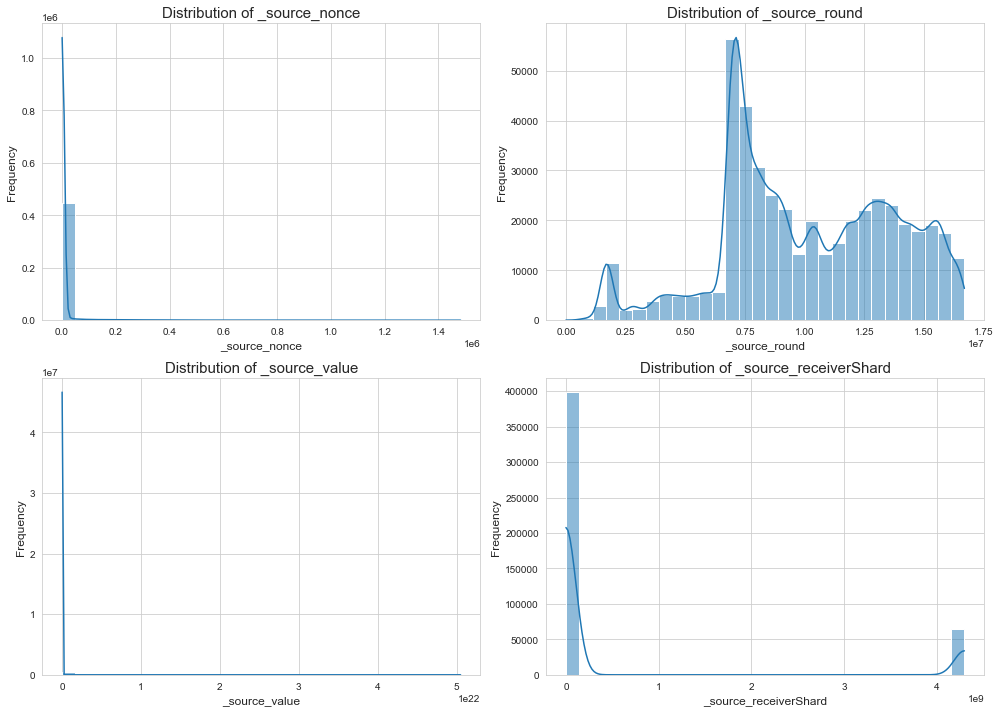

(                     _index   _type  \
 count                463510  463510   
 unique                    1       1   
 top     transactions-000001    _doc   
 freq                 463510  463510   
 mean                    NaN     NaN   
 
                                                       _id  \
 count                                              463510   
 unique                                             397396   
 top     d196f86f4aeb73964e695c7ea9e1bc232690c434a2647c...   
 freq                                                   43   
 mean                                                  NaN   
 
                                     _source_miniBlockHash  _source_nonce  \
 count                                              463510  463510.000000   
 unique                                             361169            NaN   
 top     1f45ae753c386e2125c7de7f58edac48b75671bf8effaa...            NaN   
 freq                                                   87            NaN   

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Basic Descriptive Statistics
desc_stats = df_cleaned.describe(include='all')

# Visualize distribution of a few numerical variables
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
sample_numerical_cols = numerical_cols[:4]  # Selecting a few for visualization

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, col in enumerate(sample_numerical_cols):
    sns.histplot(data=df_cleaned, x=col, bins=30, ax=axs[i], kde=True)
    axs[i].set_title(f'Distribution of {col}', fontsize=15)
    axs[i].set_xlabel(col, fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

(desc_stats.head(), sample_numerical_cols.tolist())


In [23]:
df_cleaned.dtypes.value_counts()

object     44
float64    14
int64      10
dtype: int64

In [24]:
df_cleaned.describe()

_source_nonce  _source_round  _source_value  _source_receiverShard  \
count   4.635100e+05   4.635100e+05   4.635100e+05           4.635100e+05   
mean    1.712950e+04   1.010698e+07   1.817043e+18           6.012269e+08   
std     1.054851e+05   3.630790e+06   8.848362e+19           1.490228e+09   
min     0.000000e+00   0.000000e+00   0.000000e+00           0.000000e+00   
25%     9.400000e+01   7.310581e+06   0.000000e+00           1.000000e+00   
50%     3.490000e+02   9.706630e+06   0.000000e+00           1.000000e+00   
75%     1.336000e+03   1.320194e+07   0.000000e+00           2.000000e+00   
max     1.482065e+06   1.669241e+07   5.049115e+22           4.294967e+09   

       _source_senderShard  _source_gasPrice  _source_gasLimit  \
count         4.635100e+05      4.635100e+05      4.635100e+05   
mean          4.179048e+06      1.050128e+09      2.920390e+07   
std           1.339083e+08      9.024728e+09      3.923418e+07   
min           0.000000e+00      0.000000e+00      0.000000e+00   
25%           0.000000e+00      1.000000e+09      6.000000e+06   
50%           1.000000e+00      1.000000e+09      1.800000e+07   
75%           1.000000e+00      1.000000e+09      4.500000e+07   
max           4.294967e+09      2.000000e+12      1.500000e+09   

       _source_gasUsed   _source_fee  _source_initialPaidFee  ...  \
count     4.635100e+05  4.630680e+05            4.630680e+05  ...   
mean      1.848854e+07  4.956910e+14            7.461786e+14  ...   
std       2.862958e+07  1.263461e+15            6.551479e+15  ...   
min       0.000000e+00  0.000000e+00            0.000000e+00  ...   
25%       2.213320e+06  1.355000e+14            1.947450e+14  ...   
50%       9.553667e+06  3.667835e+14            4.397700e+14  ...   
75%       2.488210e+07  6.635153e+14            8.618550e+14  ...   
max       1.500000e+09  1.359961e+17            2.500000e+17  ...   

       _source_feeNum      decimals  transactions       accounts  \
count   108808.000000  76125.000000  7.612500e+04   76125.000000   
mean         0.000626     16.699192  2.788027e+04     432.500269   
std          0.000819      3.778600  1.907789e+05    2664.177441   
min          0.000000      0.000000  1.000000e+00       1.000000   
25%          0.000228     18.000000  1.030000e+02      17.000000   
50%          0.000444     18.000000  8.590000e+02      84.000000   
75%          0.001074     18.000000  2.897000e+03     184.000000   
max          0.062108     18.000000  6.298307e+06  116568.000000   

             supply  circulatingSupply        sort_1  \
count  7.612500e+04       7.612500e+04  4.635100e+05   
mean   1.051066e+14       1.051066e+14  1.656759e+12   
std    1.025089e+16       1.025089e+16  2.178474e+10   
min    0.000000e+00       0.000000e+00  1.596118e+12   
25%    0.000000e+00       0.000000e+00  1.639981e+12   
50%    2.970000e+02       2.970000e+02  1.654357e+12   
75%    2.181800e+04       2.181800e+04  1.675329e+12   
max    1.000000e+18       1.000000e+18  1.696272e+12   

       _source_receiversShardIDs_1  _source_receiversShardIDs_2  \
count                140615.000000                 39285.000000   
mean                      1.022352                     0.989614   
std                       0.337183                     0.142505   
min                       0.000000                     0.000000   
25%                       1.000000                     1.000000   
50%                       1.000000                     1.000000   
75%                       1.000000                     1.000000   
max                       2.000000                     2.000000   

       _source_esdtValuesNum_1  
count             7.239400e+04  
mean              3.332106e+08  
std               1.251404e+10  
min               0.000000e+00  
25%               2.000000e-01  
50%               1.149916e+01  
75%               5.117937e+02  
max               7.128773e+11  

[8 rows x 24 columns]

In [25]:
df_cleaned.describe(include='O')

_index   _type  \
count                463510  463510   
unique                    1       1   
top     transactions-000001    _doc   
freq                 463510  463510   

                                                      _id  \
count                                              463510   
unique                                             397396   
top     d196f86f4aeb73964e695c7ea9e1bc232690c434a2647c...   
freq                                                   43   

                                    _source_miniBlockHash  \
count                                              463510   
unique                                             361169   
top     1f45ae753c386e2125c7de7f58edac48b75671bf8effaa...   
freq                                                   87   

                                         _source_receiver  \
count                                              463510   
unique                                               9642   
top     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
freq                                                62823   

                                           _source_sender  \
count                                              463510   
unique                                               8045   
top     erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0etxmxucds5...   
freq                                                13469   

                    _source_data  \
count                     417603   
unique                    221733   
top     cmVEZWxlZ2F0ZVJld2FyZHM=   
freq                       33909   

                                        _source_signature _source_status  \
count                                              463068         463510   
unique                                             396938              3   
top     b21b855a1dee31260d82533390da63cdc37e9a295e3488...        success   
freq                                                   43         450039   

       _source_operation  ...  \
count             463510  ...   
unique                14  ...   
top             transfer  ...   
freq              190083  ...   

                                              description  status  \
count                                               57684   57684   
unique                                                 85       1   
top     Liquidity Provider (LP) Token obtained by addi...  active   
freq                                                 1461   57684   

                                                   pngUrl  \
count                                               57684   
unique                                                 85   
top     https://media.elrond.com/tokens/asset/AEROWEGL...   
freq                                                 1461   

                                                   svgUrl  \
count                                               57684   
unique                                                 85   
top     https://media.elrond.com/tokens/asset/AEROWEGL...   
freq                                                 1461   

                                      _source_receivers_1  \
count                                              140615   
unique                                               2393   
top     erd1qqqqqqqqqqqqqpgqrc4pg2xarca9z34njcxeur622q...   
freq                                                53895   

                                      _source_receivers_2 _source_tokens_1  \
count                                               39285           271689   
unique                                                253            75291   
top     erd1qqqqqqqqqqqqqpgqrc4pg2xarca9z34njcxeur622q...     WEGLD-bd4d79   
freq                                                22294            43785   

       _source_tokens_2 _source_esdtValues_1 _source_esdtValues_2  
count             39285               271689                39285  
unique            29583               115967                37366  
top          M

In [26]:
pd.set_option('display.max_rows', 120)
print(df_cleaned.notna().sum().sort_values(ascending=False))
print('------------------------------------------')
print(df_cleaned.notna().sum().sort_values(ascending=False)/df.shape[0])

_index                         463510
_source_gasPrice               463510
sort_1                         463510
_type                          463510
identifiant                    463510
_source_searchOrder            463510
_source_status                 463510
_source_timestamp              463510
_source_gasUsed                463510
_source_gasLimit               463510
_source_operation              463510
_source_senderShard            463510
_source_receiverShard          463510
_source_sender                 463510
_source_receiver               463510
_source_value                  463510
_source_round                  463510
_id                            463510
_source_nonce                  463510
_source_miniBlockHash          463510
_source_fee                    463068
_source_initialPaidFee         463068
_source_signature              463068
_source_version                463051
_source_data                   417603
_source_hasScResults           397705
_source_func

<function matplotlib.pyplot.show(close=None, block=None)>

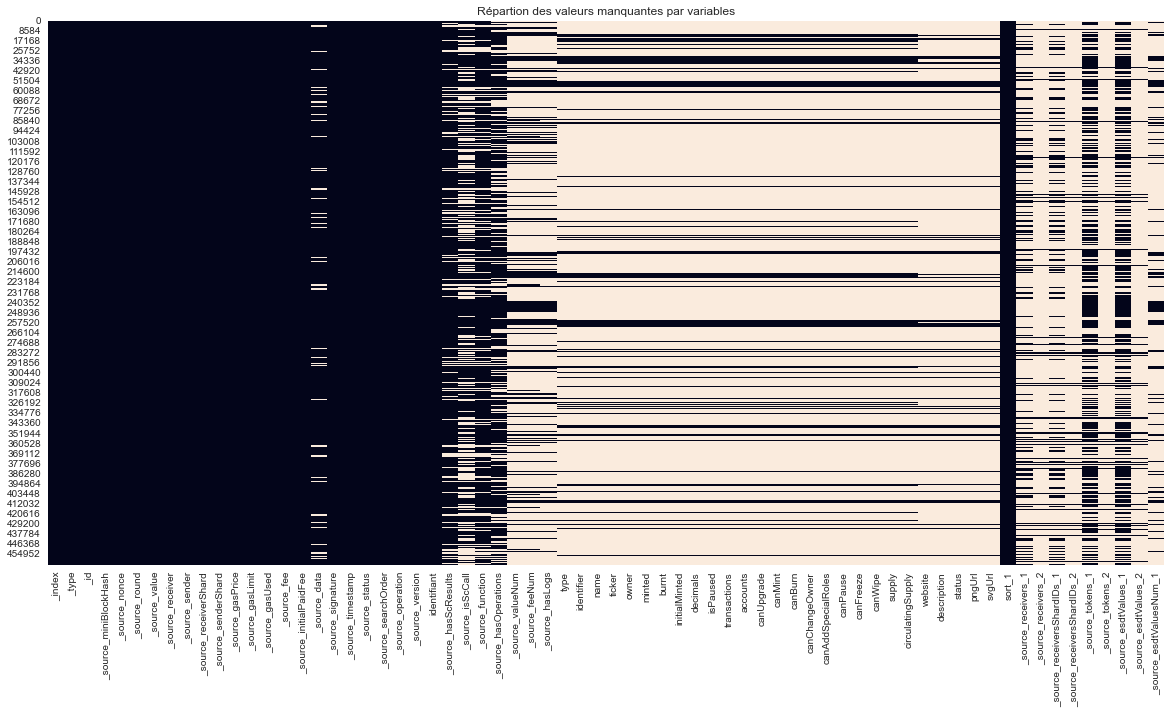

In [27]:
plt.figure(figsize=(20,10))
plt.title('Répartion des valeurs manquantes par variables')
sns.heatmap(df_cleaned.isnull()/df_cleaned.shape[0], cbar=False)
plt.show

## ID

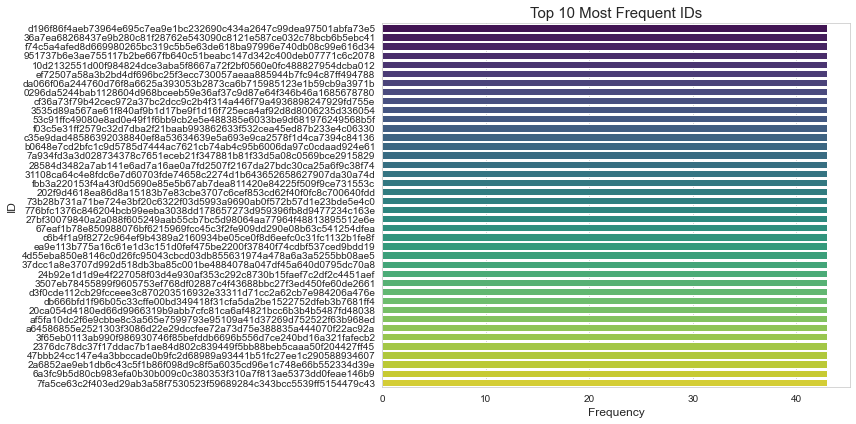

d196f86f4aeb73964e695c7ea9e1bc232690c434a2647c99dea97501abfa73e5    43
36a7ea68268437e9b280c81f28762e543090c8121e587ce032c78bcb6b5ebc41    43
f74c5a4afed8d669980265bc319c5b5e63de618ba97996e740db08c99e616d34    43
951737b6e3ae755117b2be667fb640c51beabc147d342c400deb07771c6c2078    43
10d2132551d00f984824dce3aba5f8667a72f2bf0560e0fc488827954dcba012    43
ef72507a58a3b2bd4df696bc25f3ecc730057aeaa885944b7fc94c87ff494788    43
da066f06a244760d76f8a6625a393053b2873ca6b715985123e1b59cb9a3971b    43
0296da5244bab1128604d968bceeb59e36af37c9d87e64f346b46a1685678780    43
cf36a73f79b42cec972a37bc2dcc9c2b4f314a446f79a4936898247929fd755e    43
3535d89a567ae61f840af9b1d17be9f1d16f725eca4af92d8d8006235d336054    43
53c91ffc49080e8ad0e49f1f6bb9cb2e5e488385e6033be9d681976249568b5f    43
f03c5e31ff2579c32d7dba2f21baab993862633f532cea45ed87b233e4c06330    43
c35e9dad48586392038840ef8a53634639e5a693e9ca2578f1d4ca7394c84136    43
b0648e7cd2bfc1c9d5785d7444ac7621cb74ab4c95b6006da97c0cdaad924e61    43
7a934f

In [23]:
# Get the top 10 most frequent '_id' values
top_id_values = df_cleaned['_id'].value_counts().head(40)

# Visualize the top 10 most frequent '_id' values
plt.figure(figsize=(12, 6))
sns.barplot(x=top_id_values.values, y=top_id_values.index, palette="viridis")
plt.title('Top 10 Most Frequent IDs', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.tight_layout()
plt.show()

# Displaying the top 10 in text as well
top_id_values




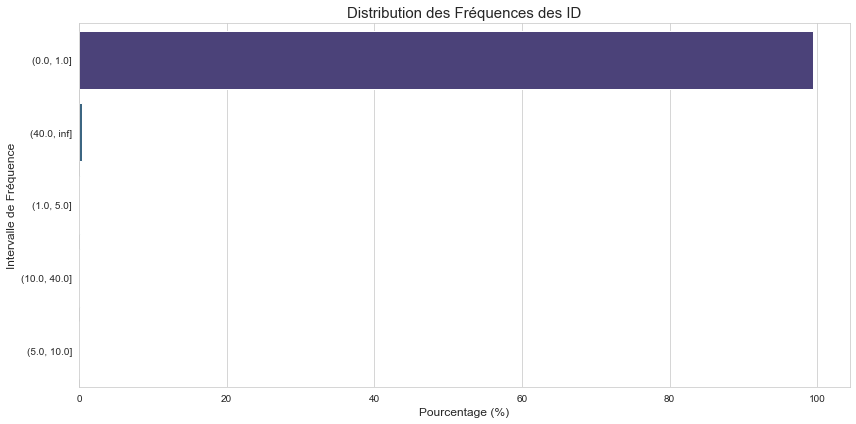

(0.0, 1.0]      99.421232
(40.0, inf]      0.367643
(1.0, 5.0]       0.128587
(10.0, 40.0]     0.072472
(5.0, 10.0]      0.010066
Name: _id, dtype: float64


In [29]:
# Calculer la fréquence des '_id'
id_counts = df_cleaned['_id'].value_counts()

# Définir les seuils
bins = [0, 1, 5, 10, 40, float('inf')]

# Catégoriser les fréquences
id_freq_cat = pd.cut(id_counts, bins=bins)

# Calculer les pourcentages
id_freq_perc = id_freq_cat.value_counts(normalize=True) * 100

# Visualiser les résultats
plt.figure(figsize=(12, 6))
sns.barplot(x=id_freq_perc.values, y=id_freq_perc.index.astype(str), palette="viridis")
plt.title('Distribution des Fréquences des ID', fontsize=15)
plt.xlabel('Pourcentage (%)', fontsize=12)
plt.ylabel('Intervalle de Fréquence', fontsize=12)
plt.tight_layout()
plt.show()

# Afficher les résultats en texte
print(id_freq_perc)


In [35]:
id_counts = df_cleaned['_id'].value_counts()

# Obtenez les '_id' qui ont une fréquence de plus de 1
frequent_ids = id_counts[id_counts > 40].index

# Créez un nouveau DataFrame avec seulement les '_id' ayant une fréquence de plus de 1
df_filtered_id = df_cleaned[df_cleaned['_id'].isin(frequent_ids)]
df_filtered_id

_index _type  \
334     transactions-000001  _doc   
335     transactions-000001  _doc   
336     transactions-000001  _doc   
337     transactions-000001  _doc   
338     transactions-000001  _doc   
...                     ...   ...   
461109  transactions-000001  _doc   
461110  transactions-000001  _doc   
461111  transactions-000001  _doc   
461112  transactions-000001  _doc   
461113  transactions-000001  _doc   

                                                      _id  \
334     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
335     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
336     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
337     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
338     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
...                                                   ...   
461109  3d4993e20ff07ab8a1a81e9a0048b805132b494040a1d0...   
461110  3d4993e20ff07ab8a1a81e9a0048b805132b494040a1d0...   
461111  3d4993e20ff07ab8a1a81e9a0048b805132b494040a1d0...   
461112  3d4993e20ff07ab8a1a81e9a0048b805132b494040a1d0...   
461113  3d4993e20ff07ab8a1a81e9a0048b805132b494040a1d0...   

                                    _source_miniBlockHash  _source_nonce  \
334     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...            102   
335     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...            102   
336     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...            102   
337     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...            102   
338     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...            102   
...                                                   ...            ...   
461109  d4d3c2f2231861c32c182d357161f254106b824ec3a04e...            340   
461110  d4d3c2f2231861c32c182d357161f254106b824ec3a04e...            340   
461111  d4d3c2f2231861c32c182d357161f254106b824ec3a04e...            340   
461112  d4d3c2f2231861c32c182d357161f254106b824ec3a04e...            340   
461113  d4d3c2f2231861c32c182d357161f254106b824ec3a04e...            340   

        _source_round  _source_value  \
334          13490702            0.0   
335          13490702            0.0   
336          13490702            0.0   
337          13490702            0.0   
338          13490702            0.0   
...               ...            ...   
461109       11390515            0.0   
461110       11390515            0.0   
461111       11390515            0.0   
461112       11390515            0.0   
461113       11390515            0.0   

                                         _source_receiver  \
334     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
335     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
336     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
337     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
338     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
...                                                   ...   
461109  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
461110  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
461111  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
461112  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
461113  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   

                                           _source_sender  \
334     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
335     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
336     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
337     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
338     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
...                                                   ...   
461109  erd1l6vhfmrkcqzfvtl7dmfzu8juj3s2a8lehyqfch97ud...   
461110  erd1l6vhfmrkcqzfvtl7dmfzu8juj3s2a8lehyqfch97ud...   
461111  erd1l6vhfmrkcqzfvtl7dmfzu8juj3s2a8lehyqfch97ud...   
461112  erd1l6vhfmrkcqzfvtl7dmfzu8juj3s2a8lehyqfch97ud...   
461113  erd1l6vhfmrkcqzfvtl7dmfzu8juj3s2a8leh

In [37]:
# Utilisez la méthode duplicated() pour marquer les lignes dupliquées
duplicates_id = df_filtered_id.duplicated()
duplicates_id

334       False
335       False
336       False
337       False
338       False
          ...  
461109    False
461110    False
461111    False
461112    False
461113    False
Length: 62823, dtype: bool

In [42]:
df_filtered_id.duplicated().sum()

0

# Identifiant

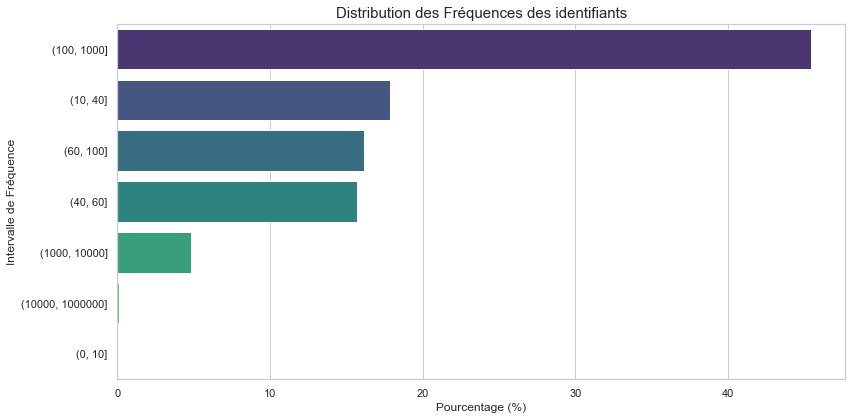

(100, 1000]         45.387905
(10, 40]            17.837508
(60, 100]           16.127062
(40, 60]            15.699450
(1000, 10000]        4.825901
(10000, 1000000]     0.122175
(0, 10]              0.000000
Name: identifiant, dtype: float64
0.12217470983506415


In [119]:
# Calculer la fréquence des '_id'
id_counts = df_cleaned['identifiant'].value_counts()

# Définir les seuils
bins = [0,10, 40, 60,100,1000,10000,1000000]

# Catégoriser les fréquences
id_freq_cat = pd.cut(id_counts, bins=bins)

# Calculer les pourcentages
id_freq_perc = id_freq_cat.value_counts(normalize=True) * 100

desired_interval_perc = id_freq_perc.loc[pd.Interval(10000, 1000000, closed='right')]


# Visualiser les résultats
plt.figure(figsize=(12, 6))
sns.barplot(x=id_freq_perc.values, y=id_freq_perc.index.astype(str), palette="viridis")
plt.title('Distribution des Fréquences des identifiants', fontsize=15)
plt.xlabel('Pourcentage (%)', fontsize=12)
plt.ylabel('Intervalle de Fréquence', fontsize=12)
plt.tight_layout()
plt.show()

# Afficher les résultats en texte
print(id_freq_perc)



In [121]:
id_counts = df_cleaned['identifiant'].value_counts()

# Filtrer les identifiants dont la fréquence se situe entre 10000 et 1000000
filtered_ids = id_counts[(id_counts > 10000) & (id_counts <= 1000000)].index

# Filtrer le DataFrame original pour ne conserver que les lignes avec les identifiants filtrés
filtered_df_identfiant_sup = df_cleaned[df_cleaned['identifiant'].isin(filtered_ids)]

In [122]:
filtered_df_identfiant_sup

_index _type  \
9533    transactions-000001  _doc   
9534    transactions-000001  _doc   
9535    transactions-000001  _doc   
9536    transactions-000001  _doc   
9537    transactions-000001  _doc   
...                     ...   ...   
251307  transactions-000001  _doc   
251308  transactions-000001  _doc   
251309  transactions-000001  _doc   
251310  transactions-000001  _doc   
251311  transactions-000001  _doc   

                                                      _id  \
9533    d86273777661d0a36fc030e936a349b2e5adf119009abf...   
9534    f67bcc1a804cdff6e286e2e455edc0103e9f89195ef480...   
9535    a80da3d4d9f6baaeb68d3a7a2ee7d55729ffb9aa9d56ad...   
9536    730b30f02e6c722fdf1f46fa8cb303da6d34d12fd19ad8...   
9537    b9d4e07be0a0e16d249df8c28c8fd39ee819b7dc25c81c...   
...                                                   ...   
251307  713b35ff106d324f2e0a5b1261e99a05135f0964c3e74c...   
251308  c5ffe49598877a3f3b00d729093197c2fc290d552c9652...   
251309  41de4ce09b5ccf2658201a217f642ccea2627a6bfe934b...   
251310  e891c7b4a5ca462e7685c247aa293577c660333591445c...   
251311  01df9b6a3730ad792e48b585a0512b9eacecf745b6691c...   

                                    _source_miniBlockHash  _source_nonce  \
9533    7c4eba0ce251f96274d42f617f7618bc9fcbd348d8df97...           3847   
9534    eca626db5bbe5b08a808d7f4034f0ee554a754a9979821...          10676   
9535    003646d86697a5edf26355794ed9a6c70ed73cc1a1ccb6...          10675   
9536    b43762b8cbfb50d8490458e4605af3b2fbbef3f504b641...          52763   
9537    81ce7000981391aea1ab14533a85d1c4386787edbec1b2...          10674   
...                                                   ...            ...   
251307  73dd3eacb585aa33a807d8e7eba82d37e197d6c3251c70...              1   
251308  d61f61d3e6d973998279a9126289324e797c8ed24ec90e...             25   
251309  19a6b7e122c14f3a8d90339e34082ac0e1566bc1254c1f...             14   
251310  2be03b8277505a6edac411490ed53537f464e1eafa6a90...              0   
251311  3a26d0dc27c05c9988401dc3e13bcda742a6eb55a21578...              4   

        _source_round  _source_value  \
9533         16691484   0.000000e+00   
9534         16690841   0.000000e+00   
9535         16690773   0.000000e+00   
9536         16689998   0.000000e+00   
9537         16681623   0.000000e+00   
...               ...            ...   
251307       12319189   0.000000e+00   
251308       12317362   0.000000e+00   
251309       12317156   0.000000e+00   
251310       12317071   1.800000e+18   
251311       12316080   2.100000e+18   

                                         _source_receiver  \
9533    erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0etxmxucds5...   
9534    erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0etxmxucds5...   
9535    erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
9536    erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0etxmxucds5...   
9537    erd1qqqqqqqqqqqqqpgql9z9vm8d599ya2r9seklpkcas6...   
...                                                   ...   
251307  erd1qqqqqqqqqqqqqpgqp32ecg03fyxgt2pf2fsxyg4knv...   
251308  erd16y3ljdle6822cl8jl73d5en2grlhhxxdk5zprpj8g6...   
251309  erd16y3ljdle6822cl8jl73d5en2grlhhxxdk5zprpj8g6...   
251310  erd1qqqqqqqqqqqqqpgqhe8t5jewej70zupmh44jurgn29...   
251311  erd16y3ljdle6822cl8jl73d5en2grlhhxxdk5zprpj8g6...   

                                           _source_sender  \
9533    erd17dgu7feqdd5v8nfuy8lr0t70m6srwuk46c6mtczph7...   
9534    erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0etxmxucds5...   
9535    erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0etxmxucds5...   
9536    erd14n8l0jyzlhma305c5q8xu568g86lxn7af7yu8543uv...   
9537    erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0etxmxucds5...   
...                                                   ...   
251307  erd16y3ljdle6822cl8jl73d5en2grlhhxxdk5zprpj8g6...   
251308  erd1t69ds6xz6jmv76vwvw0jcg5k2cer7qfzf7ryq87y5t...   
251309  erd1t69ds6xz6jmv76vwvw0jcg5k2cer7qfzf7ryq87y5t...   
251310  erd16y3ljdle6822cl8jl73d5en2grlhhxxdk5zprpj8g6...   
251311  erd1t69ds6xz6jmv76vwvw0jcg5k2cer7qfzf

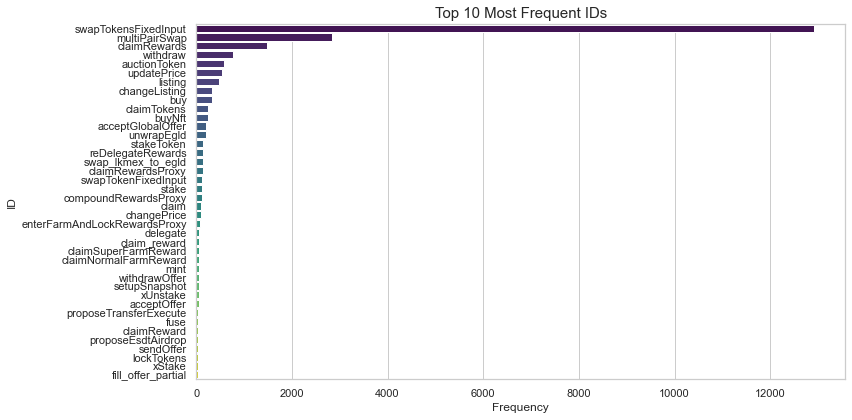

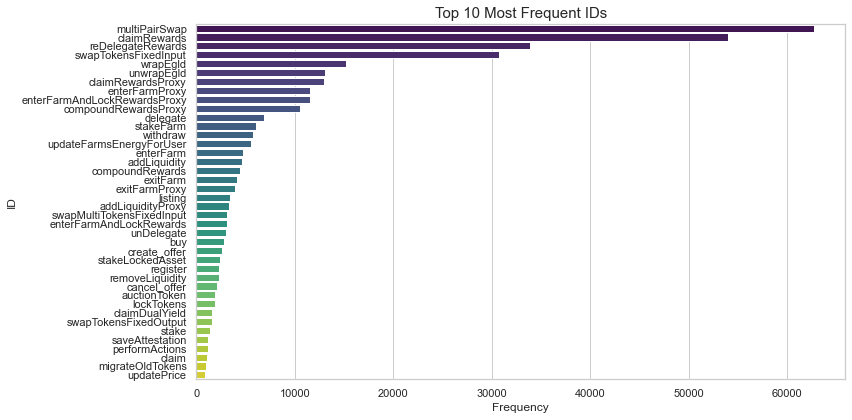

swapTokensFixedInput            12924
multiPairSwap                    2838
claimRewards                     1479
withdraw                          763
auctionToken                      583
updatePrice                       533
listing                           478
changeListing                     340
buy                               334
claimTokens                       256
buyNft                            242
acceptGlobalOffer                 212
unwrapEgld                        210
stakeToken                        152
reDelegateRewards                 144
swap_lkmex_to_egld                141
claimRewardsProxy                 137
swapTokenFixedInput               116
stake                             113
compoundRewardsProxy              113
claim                              99
changePrice                        98
enterFarmAndLockRewardsProxy       80
delegate                           68
claim_reward                       62
claimSuperFarmReward               57
claimNormalF

multiPairSwap                   62737
claimRewards                    53969
reDelegateRewards               33909
swapTokensFixedInput            30725
wrapEgld                        15230
unwrapEgld                      13057
claimRewardsProxy               12937
enterFarmProxy                  11567
enterFarmAndLockRewardsProxy    11515
compoundRewardsProxy            10562
delegate                         6930
stakeFarm                        6098
withdraw                         5733
updateFarmsEnergyForUser         5603
enterFarm                        4760
addLiquidity                     4610
compoundRewards                  4457
exitFarm                         4150
exitFarmProxy                    3906
listing                          3417
addLiquidityProxy                3315
swapMultiTokensFixedInput        3120
enterFarmAndLockRewards          3087
unDelegate                       2984
buy                              2861
create_offer                     2651
stakeLockedA

In [124]:
# Get the top 10 most frequent '_id' values
top_id_values = filtered_df_identfiant_sup['_source_function'].value_counts().head(40)
top_id_values2 = df_cleaned['_source_function'].value_counts().head(40)
# Visualize the top 10 most frequent '_id' values

plt.figure(figsize=(12, 6))
sns.barplot(x=top_id_values.values, y=top_id_values.index, palette="viridis")
plt.title('Top 10 Most Frequent IDs', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_id_values2.values, y=top_id_values2.index, palette="viridis")
plt.title('Top 10 Most Frequent IDs', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.tight_layout()
plt.show()




# Displaying the top 10 in text as well
display(top_id_values,top_id_values2)

## Source mini Blockhash

The miniBlockHash represents the hash of the miniblock in which the transaction was included.

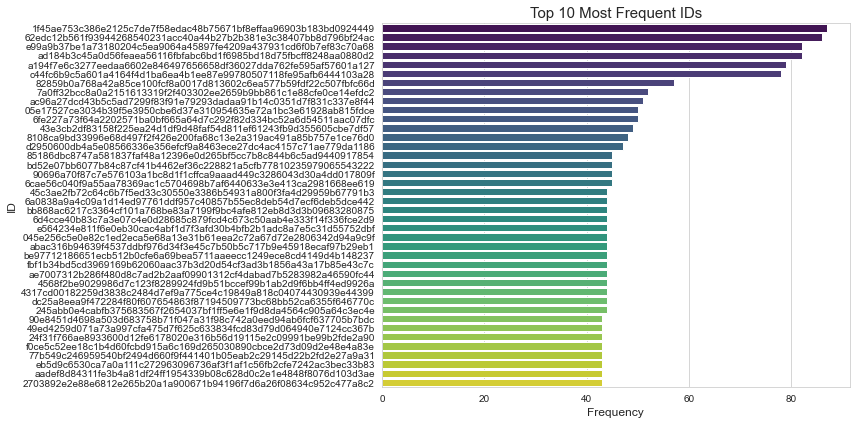

1f45ae753c386e2125c7de7f58edac48b75671bf8effaa96903b183bd0924449    87
62edc12b561f93944268540231acc40a44b27b2b381e3c38407bb8d796bf24ac    86
e99a9b37be1a73180204c5ea9064a45897fe4209a437931cd6f0b7ef83c70a68    82
ad184b3c45a0d56feaea56116fbfabc6bd1f6985bd18d75fbcff8248aa0880d2    82
a194f7e6c3277eedaa6602e846497656658df36027dda762fe595af57601a127    79
c44fc6b9c5a601a4164f4d1ba6ea4b1ee87e99780507118fe95afb6444103a28    78
82859b0a768a42a85ce100fcf8a0017d813602c6ea577b59fdf22c507fbfc66d    57
7a0ff32bcc8a0a2151613319f2f403302ee2659b9bb861c1e88cfe0ce14efdc2    52
ac96a27dcd43b5c5ad7299f83f91e79293dadaa91b14c0351d7f831c337e8f44    51
05e17527ce3034b39f5e3950cbe6d37e310954635e72a1bc3e61928ab815fdce    50
6fe227a73f64a2202571ba0bf665a64d7c292f82d334bc52a6d54511aac07dfc    50
43e3cb2df83158f225ea24d1df9d48faf54d811ef61243fb9d355605cbe7df57    49
8108ca9bd33996e68d497f2f426e200fa68c13e2a319ac491a85b757e1ce76d0    48
d2950600db4a5e08566336e356efcf9a8463ece27dc4ac4157c71ae779da1186    47
85186d

In [43]:
# Get the top 10 most frequent '_id' values
top_id_values = df_cleaned['_source_miniBlockHash'].value_counts().head(40)

# Visualize the top 10 most frequent '_id' values
plt.figure(figsize=(12, 6))
sns.barplot(x=top_id_values.values, y=top_id_values.index, palette="viridis")
plt.title('Top 10 Most Frequent IDs', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.tight_layout()
plt.show()

# Displaying the top 10 in text as well
top_id_values



## _source_nonce

The nonce field represents the transaction sequence number of the sender address.

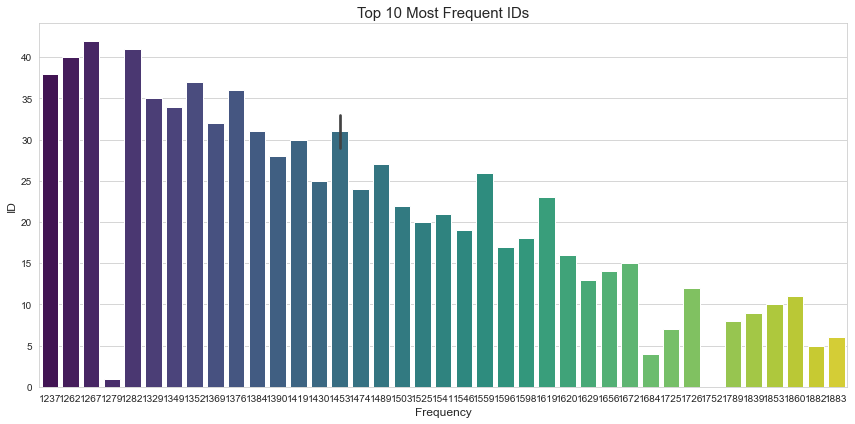

6     1883
5     1882
11    1860
10    1853
9     1839
8     1789
0     1752
12    1726
7     1725
4     1684
15    1672
14    1656
13    1629
16    1620
23    1619
18    1598
17    1596
26    1559
19    1546
21    1541
20    1525
22    1503
27    1489
24    1474
33    1453
29    1453
25    1430
30    1419
28    1390
31    1384
36    1376
32    1369
37    1352
34    1349
35    1329
41    1282
1     1279
42    1267
40    1262
38    1237
Name: _source_nonce, dtype: int64

In [45]:
# Get the top 10 most frequent '_id' values
top_id_values = df_cleaned['_source_nonce'].value_counts().head(40)

# Visualize the top 10 most frequent '_id' values
plt.figure(figsize=(12, 6))
sns.barplot(x=top_id_values.values, y=top_id_values.index, palette="viridis")
plt.title('Top 10 Most Frequent IDs', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.tight_layout()
plt.show()

# Displaying the top 10 in text as well
top_id_values



<AxesSubplot:xlabel='_source_round'>

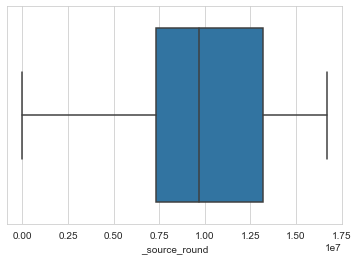

In [49]:
sns.boxplot(x=df_cleaned['_source_round'])

## _source_value

The value field represents the amount of EGLD to be sent from the sender to the receiver.

<AxesSubplot:xlabel='_source_value'>

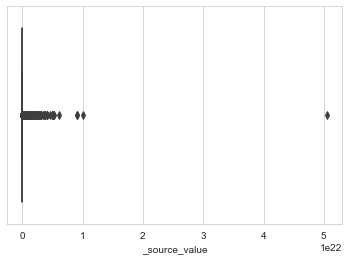

In [50]:
sns.boxplot(x=df_cleaned['_source_value'])

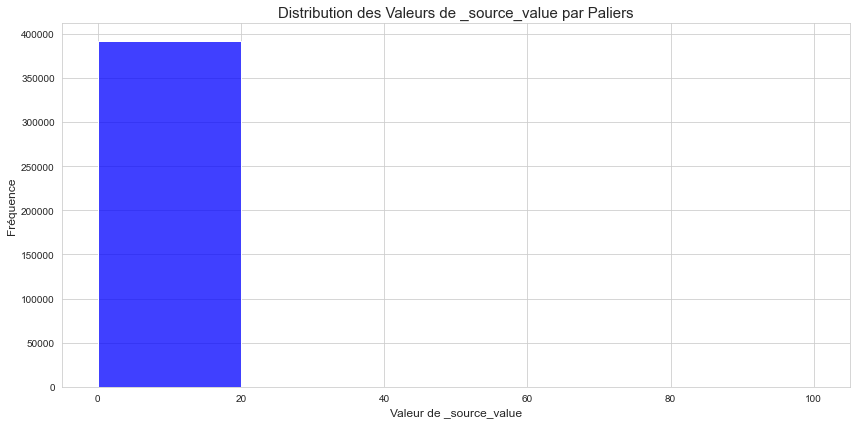

In [51]:
# Paramètres du graphique
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['_source_value'], bins=[0, 20, 40, 60, 80, 100], kde=False, color='blue')

# Titres et labels
plt.title('Distribution des Valeurs de _source_value par Paliers', fontsize=15)
plt.xlabel('Valeur de _source_value', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)

# Afficher le graphique
plt.tight_layout()
plt.show()


In [55]:
upper_lim=df_cleaned['_source_value'].quantile(.99999)
df_outliers_value=df_cleaned[df_cleaned['_source_value']>upper_lim]
df_outliers_value

_index _type  \
40953   transactions-000001  _doc   
144585  transactions-000001  _doc   
144587  transactions-000001  _doc   
413129  transactions-000001  _doc   
413130  transactions-000001  _doc   

                                                      _id  \
40953   e12614f2f719df638b1b42a301a5fd60bb42a6a2bae0c0...   
144585  afe4c482fbcf31415c2b02ffbb5461bc568e5ab6857c28...   
144587  71df5facb6b1cfbec2aaa36cd7d4bfd7f1fa6f6a4c66cd...   
413129  c7ef152a1be798e4759cef79ab0dd9c9f4ba460ddd53cc...   
413130  24d1af98b4e2d3c20c68ed98ec880c1832b2f67b1944de...   

                                    _source_miniBlockHash  _source_nonce  \
40953   5b02106dacc0dbde829af54af0904641141ff027e9162d...           1091   
144585  945d4f2810d8146d6243f5959501b86be5e011fc07eda7...              1   
144587  f5cc5e20d9c16640ef890ede244932a7a98a2652087a45...            364   
413129  86edc9462a12df3b48e3ae936c9eb3d21cad49d536af5d...              2   
413130  52ddd4ee07220b71a51e22f521c19764452ef69e0f0d3c...         682205   

        _source_round  _source_value  \
40953               0   5.049115e+22   
144585       10774792   6.000000e+21   
144587       10320565   1.000000e+22   
413129        6953883   9.000000e+21   
413130        6953781   9.000000e+21   

                                         _source_receiver  \
40953   erd1t3vhg4znwv3urs9ru32md4590ss2kq0k6xrrfpl2r8...   
144585  erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
144587  erd1q0hdn9z82k8d0nk27kuzfzt3qfsp595kcdcer0clqt...   
413129  erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
413130  erd1xz6pmw6hjg38s7v006fa0atrgtpqe9cs0tee5hl7zl...   

                                           _source_sender  \
40953   erd17rc0pu8s7rc0pu8s7rc0pu8s7rc0pu8s7rc0pu8s7r...   
144585  erd1q0hdn9z82k8d0nk27kuzfzt3qfsp595kcdcer0clqt...   
144587  erd195fe57d7fm5h33585sc7wl8trqhrmy85z3dg6f6mqd...   
413129  erd1xz6pmw6hjg38s7v006fa0atrgtpqe9cs0tee5hl7zl...   
413130  erd16x7le8dpkjsafgwjx0e5kw94evsqw039rwp42m2j9e...   

        _source_receiverShard  ...         sort_1  _source_receivers_1  \
40953              4294967295  ...  1596117600000                  NaN   
144585             4294967295  ...  1660766352000                  NaN   
144587                      0  ...  1658040990000                  NaN   
413129             4294967295  ...  1637840898000                  NaN   
413130                      0  ...  1637840286000                  NaN   

        _source_receivers_2  _source_receiversShardIDs_1  \
40953                   NaN                          NaN   
144585                  NaN                          NaN   
144587                  NaN                          NaN   
413129                  NaN                          NaN   
413130                  NaN                          NaN   

        _source_receiversShardIDs_2  _source_tokens_1 _source_tokens_2  \
40953                           NaN               NaN              NaN   
144585                          NaN               NaN              NaN   
144587                          NaN               NaN              NaN   
413129                          NaN               NaN              NaN   
413130                          NaN               NaN              NaN   

       _source_esdtValues_1  _source_esdtValues_2 _source_esdtValuesNum_1  
40953                   NaN                   NaN                     NaN  
144585                  NaN                   NaN                     NaN  
144587                  NaN                   NaN                     NaN  
413129                  NaN                   NaN                     NaN  
413130                  NaN                   NaN                     NaN  

[5 rows x 68 columns]

<AxesSubplot:xlabel='_source_value'>

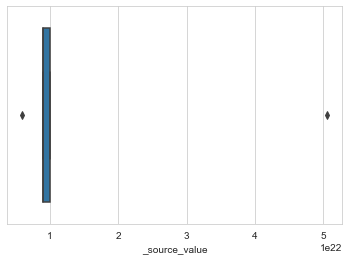

In [56]:
sns.boxplot(x=df_outliers_value['_source_value'])

In [57]:
correlation_matrix = df_cleaned.corrwith(df_cleaned['_source_value']).dropna().sort_values(ascending=False)

# Display the correlations
correlation_matrix


_source_value                  1.000000
_source_valueNum               1.000000
_source_senderShard            0.043583
_source_version                0.031036
_source_initialPaidFee         0.027657
_source_fee                    0.018444
_source_searchOrder            0.013587
_source_nonce                  0.007593
_source_receiverShard          0.007179
_source_gasPrice               0.000946
circulatingSupply             -0.000185
supply                        -0.000185
accounts                      -0.000239
transactions                  -0.002375
_source_receiversShardIDs_1   -0.004872
_source_gasLimit              -0.006577
_source_gasUsed               -0.010125
sort_1                        -0.014364
_source_timestamp             -0.014364
_source_round                 -0.014364
_source_feeNum                -0.026361
decimals                      -0.027618
dtype: float64

## _source_receiver

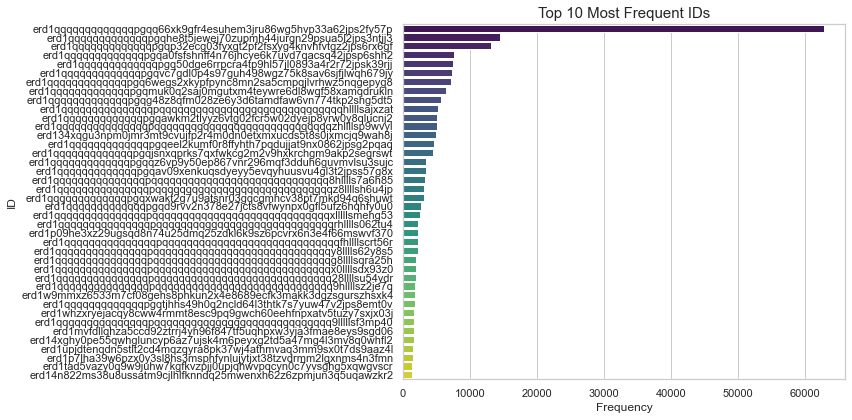

erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5hvp33a62jps2fy57p    62823
erd1qqqqqqqqqqqqqpgqhe8t5jewej70zupmh44jurgn29psua5l2jps3ntjj3    14540
erd1qqqqqqqqqqqqqpgqp32ecg03fyxgt2pf2fsxyg4knvhfvtgz2jps6rx6gf    13174
erd1qqqqqqqqqqqqqpgqa0fsfshnff4n76jhcye6k7uvd7qacsq42jpsp6shh2     7587
erd1qqqqqqqqqqqqqpgq50dge6rrpcra4tp9hl57jl0893a4r2r72jpsk39rjj     7530
erd1qqqqqqqqqqqqqpgqvc7gdl0p4s97guh498wgz75k8sav6sjfjlwqh679jy     7328
erd1qqqqqqqqqqqqqpgq6wegs2xkypfpync8mn2sa5cmpqjlvrhwz5nqgepyg8     7130
erd1qqqqqqqqqqqqqpgqmuk0q2saj0mgutxm4teywre6dl8wqf58xamqdrukln     6420
erd1qqqqqqqqqqqqqpgqg48z8qfm028ze6y3d6tamdfaw6vn774tkp2shg5dt5     5603
erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqhllllsajxzat     5164
erd1qqqqqqqqqqqqqpgqawkm2tlyyz6vtg02fcr5w02dyejp8yrw0y8qlucnj2     5042
erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqqqqqzhllllsp9wvyl     5041
erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0etxmxucds5t8s0jxmcjq9wah8j     4917
erd1qqqqqqqqqqqqqpgqeel2kumf0r8ffyhth7pqdujjat9nx0862jpsg2pqaq  

In [60]:
# Get the top 10 most frequent '_id' values
top_id_values = df_cleaned['_source_receiver'].value_counts().head(40)

# Visualize the top 10 most frequent '_id' values
plt.figure(figsize=(12, 6))
sns.barplot(x=top_id_values.values, y=top_id_values.index, palette="viridis")
plt.title('Top 10 Most Frequent IDs', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.tight_layout()
plt.show()

# Displaying the top 10 in text as well
top_id_values



In [65]:
df_cleaned[df_cleaned['_source_receiver'] == 'erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5hvp33a62jps2fy57p']


_index _type  \
334     transactions-000001  _doc   
335     transactions-000001  _doc   
336     transactions-000001  _doc   
337     transactions-000001  _doc   
338     transactions-000001  _doc   
...                     ...   ...   
461109  transactions-000001  _doc   
461110  transactions-000001  _doc   
461111  transactions-000001  _doc   
461112  transactions-000001  _doc   
461113  transactions-000001  _doc   

                                                      _id  \
334     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
335     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
336     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
337     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
338     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
...                                                   ...   
461109  3d4993e20ff07ab8a1a81e9a0048b805132b494040a1d0...   
461110  3d4993e20ff07ab8a1a81e9a0048b805132b494040a1d0...   
461111  3d4993e20ff07ab8a1a81e9a0048b805132b494040a1d0...   
461112  3d4993e20ff07ab8a1a81e9a0048b805132b494040a1d0...   
461113  3d4993e20ff07ab8a1a81e9a0048b805132b494040a1d0...   

                                    _source_miniBlockHash  _source_nonce  \
334     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...            102   
335     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...            102   
336     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...            102   
337     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...            102   
338     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...            102   
...                                                   ...            ...   
461109  d4d3c2f2231861c32c182d357161f254106b824ec3a04e...            340   
461110  d4d3c2f2231861c32c182d357161f254106b824ec3a04e...            340   
461111  d4d3c2f2231861c32c182d357161f254106b824ec3a04e...            340   
461112  d4d3c2f2231861c32c182d357161f254106b824ec3a04e...            340   
461113  d4d3c2f2231861c32c182d357161f254106b824ec3a04e...            340   

        _source_round  _source_value  \
334          13490702            0.0   
335          13490702            0.0   
336          13490702            0.0   
337          13490702            0.0   
338          13490702            0.0   
...               ...            ...   
461109       11390515            0.0   
461110       11390515            0.0   
461111       11390515            0.0   
461112       11390515            0.0   
461113       11390515            0.0   

                                         _source_receiver  \
334     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
335     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
336     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
337     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
338     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
...                                                   ...   
461109  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
461110  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
461111  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
461112  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
461113  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   

                                           _source_sender  \
334     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
335     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
336     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
337     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
338     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
...                                                   ...   
461109  erd1l6vhfmrkcqzfvtl7dmfzu8juj3s2a8lehyqfch97ud...   
461110  erd1l6vhfmrkcqzfvtl7dmfzu8juj3s2a8lehyqfch97ud...   
461111  erd1l6vhfmrkcqzfvtl7dmfzu8juj3s2a8lehyqfch97ud...   
461112  erd1l6vhfmrkcqzfvtl7dmfzu8juj3s2a8lehyqfch97ud...   
461113  erd1l6vhfmrkcqzfvtl7dmfzu8juj3s2a8leh

In [67]:
df_cleaned[df_cleaned['_source_receiver'] == 'erd1qqqqqqqqqqqqqpgqhe8t5jewej70zupmh44jurgn29psua5l2jps3ntjj3']

_index _type  \
253     transactions-000001  _doc   
264     transactions-000001  _doc   
271     transactions-000001  _doc   
273     transactions-000001  _doc   
292     transactions-000001  _doc   
...                     ...   ...   
463279  transactions-000001  _doc   
463284  transactions-000001  _doc   
463286  transactions-000001  _doc   
463290  transactions-000001  _doc   
463293  transactions-000001  _doc   

                                                      _id  \
253     06d6a223f476f9983224273ba2a67066fb87f7f2e0b03e...   
264     deaa5fbdc34b1198abcd910636384b3e03f99ab4bbd620...   
271     f0011f6fa9a6144372bd6d087986000054de5b9edcfd3e...   
273     1880914284591149167bb7cbf5f5b383dcfac66a0bd5f8...   
292     19cb2e035e6bba7cb6acd230d28d186b8e2f90066a0040...   
...                                                   ...   
463279  7fa68b17eb41eb7ee019418c74d04e89a59233168bf9a9...   
463284  5fb17c76c06d9de112c3844ce336dfeb8bf3fecddc9a1e...   
463286  38ce147e2123a843c5e9aee26935b07ffb6455d70952c0...   
463290  a27696ce1b5e7b693c0a8b8193d6d991cce64913b00b24...   
463293  6d06ed206142f96fbe658c51694a38a8c7d8bb108409d6...   

                                    _source_miniBlockHash  _source_nonce  \
253     57f085ce359625cf2f8e8c1aeaea870474525732a7891f...             25   
264     6b591dc3430fcf4c2d62a558c23be04c6d4f93bc82db0c...             12   
271     5a91ef9b5568536029b2e41a1aa34ac2cba43d6029b0a3...              5   
273     9cd3ba4c77edcd18593c390dd201691ae117f2d185a82b...              3   
292     556ff78dd47bc2407a89bcdb8106e2ed072ffa3194e080...            142   
...                                                   ...            ...   
463279  c54c34d6e4dbc2ef4a29806feae48abc24c4bedea67e48...             21   
463284  3cc39e14f6ca051715ead647b126ed6138a1532933f0c8...             15   
463286  39ceb9b7114cde4744eda76a80e2c7d3e9900fe27c288a...             13   
463290  ec7d2ea8e86502d00e6049b9c8b3db7eb537f3548c2f02...             10   
463293  fb85216a51298b1aa901550cf1095fe2b27af9003eb243...              8   

        _source_round  _source_value  \
253           8883334   2.727596e+18   
264           7572640   5.000000e+18   
271           7259543   0.000000e+00   
273           7258855   1.152003e+19   
292          15345807   0.000000e+00   
...               ...            ...   
463279        6887919   0.000000e+00   
463284        6879761   7.000000e+17   
463286        6879723   7.000000e+17   
463290        6878528   5.930143e+17   
463293        6878349   6.000000e+17   

                                         _source_receiver  \
253     erd1qqqqqqqqqqqqqpgqhe8t5jewej70zupmh44jurgn29...   
264     erd1qqqqqqqqqqqqqpgqhe8t5jewej70zupmh44jurgn29...   
271     erd1qqqqqqqqqqqqqpgqhe8t5jewej70zupmh44jurgn29...   
273     erd1qqqqqqqqqqqqqpgqhe8t5jewej70zupmh44jurgn29...   
292     erd1qqqqqqqqqqqqqpgqhe8t5jewej70zupmh44jurgn29...   
...                                                   ...   
463279  erd1qqqqqqqqqqqqqpgqhe8t5jewej70zupmh44jurgn29...   
463284  erd1qqqqqqqqqqqqqpgqhe8t5jewej70zupmh44jurgn29...   
463286  erd1qqqqqqqqqqqqqpgqhe8t5jewej70zupmh44jurgn29...   
463290  erd1qqqqqqqqqqqqqpgqhe8t5jewej70zupmh44jurgn29...   
463293  erd1qqqqqqqqqqqqqpgqhe8t5jewej70zupmh44jurgn29...   

                                           _source_sender  \
253     erd15sx2ps09k5agxhkzaeenwkj3jpttt43pgmsjjx3aeu...   
264     erd15sx2ps09k5agxhkzaeenwkj3jpttt43pgmsjjx3aeu...   
271     erd15sx2ps09k5agxhkzaeenwkj3jpttt43pgmsjjx3aeu...   
273     erd15sx2ps09k5agxhkzaeenwkj3jpttt43pgmsjjx3aeu...   
292     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
...                                                   ...   
463279  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42y7753heqs...   
463284  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42y7753heqs...   
463286  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42y7753heqs...   
463290  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42y7753heqs...   
463293  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42

## Source_sender

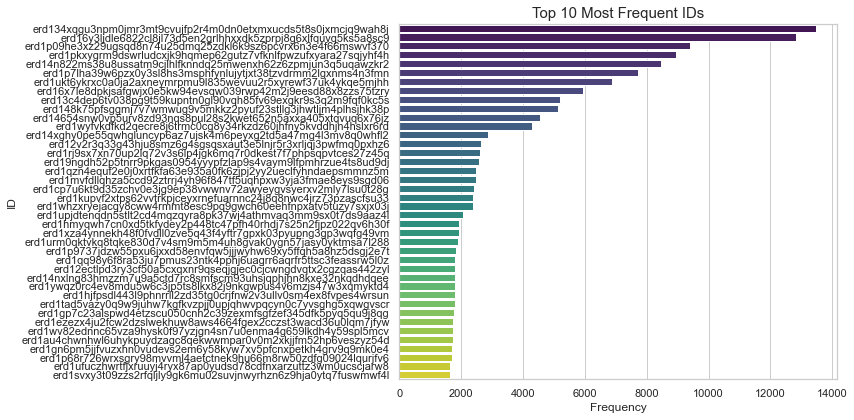

erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0etxmxucds5t8s0jxmcjq9wah8j    13469
erd16y3ljdle6822cl8jl73d5en2grlhhxxdk5zprpj8g6xlfquvq5ks5a8sc9    12839
erd1p09he3xz29ugsqd8n74u25dmq25zdkl6k9sz6pcvrx6n3e4f66mswvf370     9412
erd1pkxygrm9dswrludcxjk9hqmep62gutz7vfknlfpwzufxyara27sqjyhf4h     8946
erd14n822ms38u8ussatm9cjlhlfknndq25mwenxh62z6zpmjun3q5uqawzkr2     8478
erd1p7lha39w6pzx0y3sl8hs3msphfynlujytjxt38tzvdrmm2lgxnms4n3fmn     7712
erd1ukt6ykrxc0a0ja2axneymrpmu9l835wevuu2r5xyrewf37uk4ykqe5mjhh     6894
erd16x7le8dpkjsafgwjx0e5kw94evsqw039rwp42m2j9eesd88x8zzs75tzry     5932
erd13c4dep6tv038pg9t59kupntn0gl90vqh85fv69exgkr9s3q2m9fqf0kc5s     5213
erd148k75pfsggmj7v7wmwug9v5mkkz2pyuf23stllg3jhwtljm4plhsjhk38p     5136
erd14654snw0vp5urv8zd93nqs8pul28s2kwet652n5axxa405xtqvuq6x76jz     4541
erd1wyfvkdfkd2qecre8j6trmc0cg8y34rkzdz60jhfny5kvddhjn4hslxr6rd     4307
erd14xghy0pe55qwhgluncyp6az7ujsk4m6peyxg2td5a47mg4l3mv8q0whfl2     2885
erd12v2r3q33g43hju8smz6g4sgsqsxaut3e5lnjr5r3xrljqj3pwfmq0pxhz6  

In [68]:
# Get the top 10 most frequent '_id' values
top_id_values = df_cleaned['_source_sender'].value_counts().head(40)

# Visualize the top 10 most frequent '_id' values
plt.figure(figsize=(12, 6))
sns.barplot(x=top_id_values.values, y=top_id_values.index, palette="viridis")
plt.title('Top 10 Most Frequent IDs', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.tight_layout()
plt.show()

# Displaying the top 10 in text as well
top_id_values



In [69]:
df_cleaned[df_cleaned['_source_sender'] == 'erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0etxmxucds5t8s0jxmcjq9wah8j']

_index _type  \
9534    transactions-000001  _doc   
9535    transactions-000001  _doc   
9537    transactions-000001  _doc   
9538    transactions-000001  _doc   
9539    transactions-000001  _doc   
...                     ...   ...   
26321   transactions-000001  _doc   
26323   transactions-000001  _doc   
195664  transactions-000001  _doc   
229423  transactions-000001  _doc   
278883  transactions-000001  _doc   

                                                      _id  \
9534    f67bcc1a804cdff6e286e2e455edc0103e9f89195ef480...   
9535    a80da3d4d9f6baaeb68d3a7a2ee7d55729ffb9aa9d56ad...   
9537    b9d4e07be0a0e16d249df8c28c8fd39ee819b7dc25c81c...   
9538    6d1565c749c9c0a1b342d517e91a183f4c3454f93fdb67...   
9539    1fd1449bb30f4936093fd44475c6daa5f546f5ca771bc6...   
...                                                   ...   
26321   baa81f69ccce18f4e10c5ea4121d3b502c420eeb44644e...   
26323   b0fcbc3a11dc6d7e770d80397f258a6b631dfecd5021d3...   
195664  9d3a2aba0384647c6585e2a0ccd7082d564ef54999b876...   
229423  38687156036d4d6ffcff2851613ac3ed0a9af606d30960...   
278883  78d607484d4be3d30c9a2a1cc2d65904d1e55d80484518...   

                                    _source_miniBlockHash  _source_nonce  \
9534    eca626db5bbe5b08a808d7f4034f0ee554a754a9979821...          10676   
9535    003646d86697a5edf26355794ed9a6c70ed73cc1a1ccb6...          10675   
9537    81ce7000981391aea1ab14533a85d1c4386787edbec1b2...          10674   
9538    dde25dc2c379a5169ea5cd9a6be4b9d5c071d8605ef0ac...          10673   
9539    71d71c76006b100584b38bff49f9bb59898dff0f31e7df...          10672   
...                                                   ...            ...   
26321   c0fc0d9edff18ec18566e6dfe7ee41b98e45f27b586983...              5   
26323   3bbe4497ad7d44b8fc497aa9bbec04870a6d4d7584a41b...              4   
195664  3d2a0b88b5bbad52d46e03100ad75c1c8c037aaeac31d0...            613   
229423  c2e8bb87fd04140060eff5cb0e944aee0f76b93a28366e...             74   
278883  3b9097419c5070348624e96b05f75fc012da39d03bd078...            142   

        _source_round  _source_value  \
9534         16690841   0.000000e+00   
9535         16690773   0.000000e+00   
9537         16681623   0.000000e+00   
9538         16681599   0.000000e+00   
9539         16681574   0.000000e+00   
...               ...            ...   
26321         4337821   1.780000e+15   
26323         4336947   1.048642e+18   
195664        6441230   0.000000e+00   
229423        4587714   3.000000e+14   
278883        4640658   3.000000e+14   

                                         _source_receiver  \
9534    erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0etxmxucds5...   
9535    erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
9537    erd1qqqqqqqqqqqqqpgql9z9vm8d599ya2r9seklpkcas6...   
9538    erd1qqqqqqqqqqqqqpgqazvfcw74uplnj5d5g7p04mjfrg...   
9539    erd1qqqqqqqqqqqqqpgqazvfcw74uplnj5d5g7p04mjfrg...   
...                                                   ...   
26321   erd16jfqrp304tcue3kgdwulzug7xkgcxsulkx0ykrn4p8...   
26323   erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
195664  erd1ms4lkzsq9gd88he94qsc5qt4a3thdq0a7wxu069zsk...   
229423  erd1klauah6k4tc8q6dh39tkv86f7au0vad5624wk7hfek...   
278883  erd1qzn4equf2e0j0xrtfkfa63e935a0fk6zjpj2yy2uec...   

                                           _source_sender  \
9534    erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0etxmxucds5...   
9535    erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0etxmxucds5...   
9537    erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0etxmxucds5...   
9538    erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0etxmxucds5...   
9539    erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0etxmxucds5...   
...                                                   ...   
26321   erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0etxmxucds5...   
26323   erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0etxmxucds5...   
195664  erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0etxmxucds5...   
229423  erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0etxmxucds5...   
278883  erd134xqgu3npm0jmr3mt9cvujfp2r4m0dn0e

In [70]:
df_cleaned[df_cleaned['_source_sender'] == 'erd16y3ljdle6822cl8jl73d5en2grlhhxxdk5zprpj8g6xlfquvq5ks5a8sc9']

_index _type  \
238466  transactions-000001  _doc   
238467  transactions-000001  _doc   
238468  transactions-000001  _doc   
238469  transactions-000001  _doc   
238470  transactions-000001  _doc   
...                     ...   ...   
251304  transactions-000001  _doc   
251305  transactions-000001  _doc   
251306  transactions-000001  _doc   
251307  transactions-000001  _doc   
251310  transactions-000001  _doc   

                                                      _id  \
238466  1fe826ccc6c85c1eb9c5dd3d540ab359ac9e304c092bda...   
238467  513afc086ff3e7444606201dc07531c033b25c3495c99c...   
238468  f236c69e2e8740edc2b711e3772153a96e9aa3eb22f76c...   
238469  e92748fa2760eb5d9b2acf800229b19a0937bc2629e44f...   
238470  56c4d16accf2c79b2a8b31de8c4bba03ba7aa26b7508a9...   
...                                                   ...   
251304  67a975c780691427bb7dd97c28ba0ab1d60deb628326f9...   
251305  b67cb8995ef23d15407af9930e7149a2193f85b83bdcbf...   
251306  08006202c0020f657be5fd7c7a9f130c33b97357824052...   
251307  713b35ff106d324f2e0a5b1261e99a05135f0964c3e74c...   
251310  e891c7b4a5ca462e7685c247aa293577c660333591445c...   

                                    _source_miniBlockHash  _source_nonce  \
238466  d4a17e2acfaedbbf9817ee4d54eefc11dd922234e41223...          12838   
238467  9aac9240490a802ddd7eaef6c7e9bb1afccfb52b15ce41...          12837   
238468  326f9b042037549e9a6c7d2f49bd07d8f104595c2593a5...          12836   
238469  44a772d94f60f2b305e57f749e9fcbc7971c7ab1910690...          12835   
238470  a074f052de040b38aadd08829215c2fbcc62727324d82f...          12834   
...                                                   ...            ...   
251304  454ac8beb4a6e6c79d46338fe3ef4c0944cfa557ab9749...              4   
251305  50574a51aff52765026c6d10136001607cecd169a368c6...              3   
251306  920775851ba5dac324d20dd51988376d82f3965f29e1d1...              2   
251307  73dd3eacb585aa33a807d8e7eba82d37e197d6c3251c70...              1   
251310  2be03b8277505a6edac411490ed53537f464e1eafa6a90...              0   

        _source_round  _source_value  \
238466       16614180   0.000000e+00   
238467       16614179   0.000000e+00   
238468       16577108   0.000000e+00   
238469       16577055   0.000000e+00   
238470       16576967   0.000000e+00   
...               ...            ...   
251304       12355185   0.000000e+00   
251305       12328252   0.000000e+00   
251306       12321092   0.000000e+00   
251307       12319189   0.000000e+00   
251310       12317071   1.800000e+18   

                                         _source_receiver  \
238466  erd1t69ds6xz6jmv76vwvw0jcg5k2cer7qfzf7ryq87y5t...   
238467  erd1t69ds6xz6jmv76vwvw0jcg5k2cer7qfzf7ryq87y5t...   
238468  erd1qqqqqqqqqqqqqpgqp32ecg03fyxgt2pf2fsxyg4knv...   
238469  erd1qqqqqqqqqqqqqpgqp32ecg03fyxgt2pf2fsxyg4knv...   
238470  erd1qqqqqqqqqqqqqpgqp32ecg03fyxgt2pf2fsxyg4knv...   
...                                                   ...   
251304  erd1qqqqqqqqqqqqqpgqp32ecg03fyxgt2pf2fsxyg4knv...   
251305  erd1qqqqqqqqqqqqqpgqp32ecg03fyxgt2pf2fsxyg4knv...   
251306  erd1qqqqqqqqqqqqqpgqp32ecg03fyxgt2pf2fsxyg4knv...   
251307  erd1qqqqqqqqqqqqqpgqp32ecg03fyxgt2pf2fsxyg4knv...   
251310  erd1qqqqqqqqqqqqqpgqhe8t5jewej70zupmh44jurgn29...   

                                           _source_sender  \
238466  erd16y3ljdle6822cl8jl73d5en2grlhhxxdk5zprpj8g6...   
238467  erd16y3ljdle6822cl8jl73d5en2grlhhxxdk5zprpj8g6...   
238468  erd16y3ljdle6822cl8jl73d5en2grlhhxxdk5zprpj8g6...   
238469  erd16y3ljdle6822cl8jl73d5en2grlhhxxdk5zprpj8g6...   
238470  erd16y3ljdle6822cl8jl73d5en2grlhhxxdk5zprpj8g6...   
...                                                   ...   
251304  erd16y3ljdle6822cl8jl73d5en2grlhhxxdk5zprpj8g6...   
251305  erd16y3ljdle6822cl8jl73d5en2grlhhxxdk5zprpj8g6...   
251306  erd16y3ljdle6822cl8jl73d5en2grlhhxxdk5zprpj8g6...   
251307  erd16y3ljdle6822cl8jl73d5en2grlhhxxdk5zprpj8g6...   
251310  erd16y3ljdle6822cl8jl73d5en2grlhhxxdk

## Receiver/Sender Shard

1             0.544950
2             0.164022
0             0.151043
4294967295    0.139984
Name: _source_receiverShard, dtype: float64

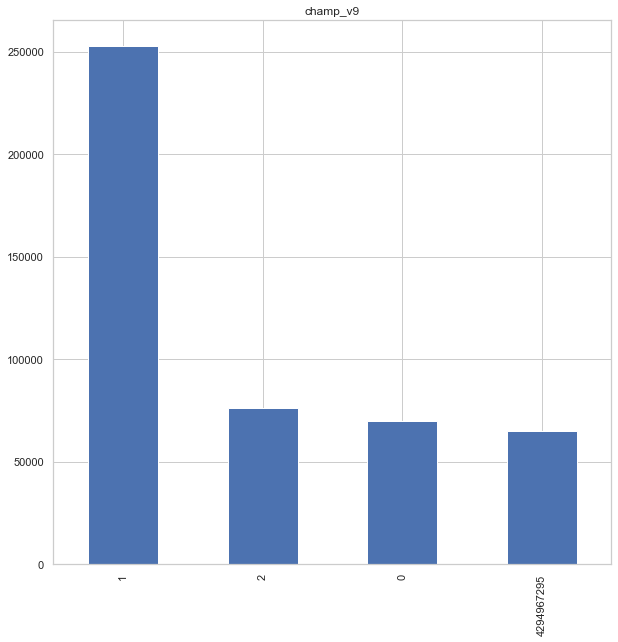

In [72]:
plt.figure()
df_cleaned['_source_receiverShard'].value_counts()[:34].plot(kind='bar',figsize=(10,10),title='champ_v9')
plt.show
df_cleaned['_source_receiverShard'].value_counts(normalize=True)


1             0.513320
0             0.288453
2             0.197254
4294967295    0.000973
Name: _source_senderShard, dtype: float64

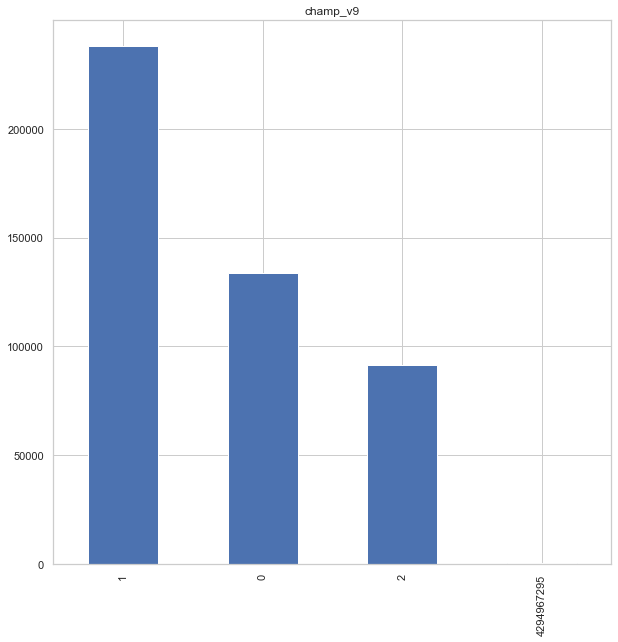

In [76]:
plt.figure()
df_cleaned['_source_senderShard'].value_counts()[:34].plot(kind='bar',figsize=(10,10),title='champ_v9')
plt.show
df_cleaned['_source_senderShard'].value_counts(normalize=True)

In [75]:
display(df_cleaned[df_cleaned['_source_receiverShard'] == 0],df_cleaned[df_cleaned['_source_receiverShard'] == 1],df_cleaned[df_cleaned['_source_receiverShard'] == 2],df_cleaned[df_cleaned['_source_receiverShard'] == 4294967295])

_index _type  \
0       transactions-000001  _doc   
101     transactions-000001  _doc   
137     transactions-000001  _doc   
140     transactions-000001  _doc   
141     transactions-000001  _doc   
...                     ...   ...   
463505  transactions-000001  _doc   
463506  transactions-000001  _doc   
463507  transactions-000001  _doc   
463508  transactions-000001  _doc   
463509  transactions-000001  _doc   

                                                      _id  \
0       4f6ca1b621597b2e9b305847b711f51f273093a99d9463...   
101     306e72cfb5439480012f07441e98c073d03629f1467771...   
137     0e77253056d64bebce941133b3e35e0529a5d6e084b5e0...   
140     fd833f505733fb96b84b00738f6d07ad57cd66c702dc4c...   
141     96a5389f4c89a460b7c89e655f3817f47c09c0e2ccba9e...   
...                                                   ...   
463505  c8f174e5c398d97b30bf35f89d82e5072f9c33f5efa448...   
463506  93792fa866035f001601d58181f1d07102c32421685729...   
463507  5e7aa333bc346fd90ec7f456b9a901380550714fe5f73e...   
463508  cd914833e81060c70368d8febbd9bb9b0856556b19133f...   
463509  71ac0b397d40602afe7f82c370178aa6fb15aef4719f98...   

                                    _source_miniBlockHash  _source_nonce  \
0       bba779df6b540456f830816311b5de2ad2800e6c4646c4...            141   
101     e4405293b7d594e952884da7317b3db9d8f1cd0be01d85...           1588   
137     8d47eacdf8c6bdd6107e61f6f29d0c9c41b2de996f70c1...          64902   
140     feb54435b1124440c139f7a55a6d770f88c384a6e71de3...         470484   
141     52768f5c678284ae6f455897357bb0f6003a192e22f203...         600263   
...                                                   ...            ...   
463505  3979326d169679d75b0633342ed810d91ae94d1af15297...              3   
463506  9dec052669c4064e4dea48cbd6b77eead33c0085042cfb...         704217   
463507  33f6a3f518ef7ebebd6cf5514a9c9055129e3f6ae6dbd9...         652657   
463508  5830e279a59b766b3a5e35832566cf50e9651937dc6d50...         652655   
463509  5830e279a59b766b3a5e35832566cf50e9651937dc6d50...         652654   

        _source_round  _source_value  \
0             7617683   9.900361e+17   
101           6744665   1.000000e+13   
137           6083687   4.578790e+18   
140           6075868   1.132324e+18   
141           6075751   0.000000e+00   
...               ...            ...   
463505        6973582   1.150000e+17   
463506        6973411   2.387600e+17   
463507        6959094   0.000000e+00   
463508        6959092   0.000000e+00   
463509        6959092   0.000000e+00   

                                         _source_receiver  \
0       erd1ld3alcg5utt5fxxdvjgpzg3ep46twc7ys9pw2vuapj...   
101     erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
137     erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
140     erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
141     erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
...                                                   ...   
463505  erd1qqqqqqqqqqqqqpgqvc7gdl0p4s97guh498wgz75k8s...   
463506  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463507  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463508  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463509  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   

                                           _source_sender  \
0       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
101     erd1p5ynwyjzat5qpnu4dhxspvthlpxc28xu38ghfgl3k2...   
137     erd1qr9av6ar4ymr05xj93jzdxyezdrp6r4hz6u0scz4dt...   
140     erd16x7le8dpkjsafgwjx0e5kw94evsqw039rwp42m2j9e...   
141     erd1lgtrza8q2p8zzrdger0lpsh6z9mxrscxa68mxxnjg3...   
...                                                   ...   
463505  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463506  erd16x7le8dpkjsafgwjx0e5kw94evsqw039rwp42m2j9e...   
463507  erd1lgtrza8q2p8zzrdger0lpsh6z9mxrscxa68mxxnjg3...   
463508  erd1lgtrza8q2p8zzrdger0lpsh6z9mxrscxa68mxxnjg3...   
463509  erd1lgtrza8q2p8zzrdger0lpsh6z9mxrscxa

_index _type  \
83      transactions-000001  _doc   
154     transactions-000001  _doc   
243     transactions-000001  _doc   
245     transactions-000001  _doc   
246     transactions-000001  _doc   
...                     ...   ...   
463485  transactions-000001  _doc   
463493  transactions-000001  _doc   
463501  transactions-000001  _doc   
463502  transactions-000001  _doc   
463504  transactions-000001  _doc   

                                                      _id  \
83      69006ae777ef473c63c34b7134f8b4e5a4c6b8831afd13...   
154     4309743e214975b21eb3a75136110aff756c87a744c33b...   
243     73c278c95ace40ac615a43c08a62d37d7f85f8ab63fec5...   
245     01510841a83dfe5735de4d7bb3270a66f34699386b2785...   
246     0bf5f5bc7de9d8ae0c795566ac0083b6e1b8ea53550062...   
...                                                   ...   
463485  c02a366f82dc5ee32db8eed576b0ed14b603ef5a0fb7b2...   
463493  92e2778856316f1c7eef3b7c0ba810dab984761c5f1f31...   
463501  8c34db50ab6b976b62b1e16aac9f60649bb42f4bfb3bc9...   
463502  aa88497eb0db1e3cf500a03d9e9540f97d6e7fc8039e4e...   
463504  a2a1ab9efcbcc8796c34a83ec908e4a9277b8425cd88aa...   

                                    _source_miniBlockHash  _source_nonce  \
83      9af21f5d557341d52ca4e961294c6b414c481382cab8bc...             58   
154     b609972d9062f28d8e190c58c01683194854ac87425048...              7   
243     1dc3231ca9e19076a50483d10c3aaed24fc4e32bf40afc...             39   
245     2250ded7bd7208f13b68f9a6aa4d65b1baa01a0c4d64e4...             36   
246     62474f4785fa31ca112bf1f71730da742a452592a2b521...             35   
...                                                   ...            ...   
463485  617d4779d39639f39e109985f4e20525117809d26d4ba8...             22   
463493  bf8bedaabd467fca2f1dc0f018e01ab0cec4ff42c72938...             14   
463501  6a1668674a40ba8cd363a2a7685b8b6b03e2cadfd2e1f3...              7   
463502  762ef1e75b3f50fb733809e5c04bae35a599cc565f627c...              6   
463504  0370688d3bfe693eae2f0ce4cfa93bfc5309f422ac77d6...              4   

        _source_round  _source_value  \
83            6924757   7.700000e+17   
154           6897161   0.000000e+00   
243          13306402   0.000000e+00   
245          10884216   0.000000e+00   
246           9170519   0.000000e+00   
...               ...            ...   
463485        6984130   0.000000e+00   
463493        6974019   0.000000e+00   
463501        6973612   0.000000e+00   
463502        6973593   0.000000e+00   
463504        6973586   0.000000e+00   

                                         _source_receiver  \
83      erd1p3uz927hq5lmqyh4kleuqfjgqj3tc8zypdsfzvwwyf...   
154     erd1qqqqqqqqqqqqqpgqa0fsfshnff4n76jhcye6k7uvd7...   
243     erd1qqqqqqqqqqqqqpgqjsnxqprks7qxfwkcg2m2v9hxkr...   
245     erd15sx2ps09k5agxhkzaeenwkj3jpttt43pgmsjjx3aeu...   
246     erd15sx2ps09k5agxhkzaeenwkj3jpttt43pgmsjjx3aeu...   
...                                                   ...   
463485  erd1qqqqqqqqqqqqqpgqa0fsfshnff4n76jhcye6k7uvd7...   
463493  erd1qqqqqqqqqqqqqpgqa0fsfshnff4n76jhcye6k7uvd7...   
463501  erd1qqqqqqqqqqqqqpgqa0fsfshnff4n76jhcye6k7uvd7...   
463502  erd1qqqqqqqqqqqqqpgqa0fsfshnff4n76jhcye6k7uvd7...   
463504  erd1qqqqqqqqqqqqqpgqa0fsfshnff4n76jhcye6k7uvd7...   

                                           _source_sender  \
83      erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
154     erd1qk8tujl0ec64a7v83r4qmej4zz3xn62q8rdcpex4ht...   
243     erd15sx2ps09k5agxhkzaeenwkj3jpttt43pgmsjjx3aeu...   
245     erd15sx2ps09k5agxhkzaeenwkj3jpttt43pgmsjjx3aeu...   
246     erd15sx2ps09k5agxhkzaeenwkj3jpttt43pgmsjjx3aeu...   
...                                                   ...   
463485  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463493  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463501  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463502  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463504  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t

_index _type  \
215     transactions-000001  _doc   
233     transactions-000001  _doc   
236     transactions-000001  _doc   
237     transactions-000001  _doc   
238     transactions-000001  _doc   
...                     ...   ...   
462693  transactions-000001  _doc   
462727  transactions-000001  _doc   
462730  transactions-000001  _doc   
463177  transactions-000001  _doc   
463185  transactions-000001  _doc   

                                                      _id  \
215     7eda26d5090d5f4ca8665bef054cff0ceea5e64c9e2058...   
233     7ab58aa7e761f8d12527655026440717b59f20a78a3c83...   
236     913e221e465e8b2dfeb87ac5c3c6373c25e9c2cf17bdbc...   
237     c4e14f687c5db7267c92f4c2b327dae04b780c2a95cf4c...   
238     6ddde408375ddcb491a2333281b0d4c3394a807dc95d9b...   
...                                                   ...   
462693  d129405e321ab1e66d08b673e6c39fe4561413b148d07d...   
462727  bec47175ee066c28087cc1260faefeed814485b4a5eb57...   
462730  56ee0b042e20949974b7a36529d8566c8ff610b79aefa1...   
463177  cd893f00620e7ede24110f64d95bbc22b1fa5da98b7383...   
463185  74e8a466821fde8cbd574f5579f163bb232cf7e03b2c43...   

                                    _source_miniBlockHash  _source_nonce  \
215     df578045b87e8348f805cb11a398cb452ebe4116fd59fa...         166625   
233     49873ce62c4aa8d5e9a0edb19185e33671383a300726fb...         138856   
236     f55f44319c24d5769f468356fc349f288b8355c954a045...            134   
237     c699097366087c501e885ef33b2161dfc1e469fecd13b2...         681562   
238     1fc5f0ffd40a714b2d9b974954486ca352539e8826bd9b...         135279   
...                                                   ...            ...   
462693  e0debf67f9cb2e6a1690b7cdbd045ecb1d3aff9718468b...            538   
462727  2f2a4d58591546e0220dbed1a881cbae39e3d6dfdc8d82...            513   
462730  e756a2fa10a54ac7458064e7744d6232b44eb2c7867007...            510   
463177  9535c004d16bc48eeae6dd60d1f29b0fb984efb51ceb04...            119   
463185  e13328b0eea0f2c49978a29dde10eaac3541a8b3c23a01...            111   

        _source_round  _source_value  \
215           9207467   6.990000e+18   
233           8021228   1.990000e+18   
236           7893444   5.000000e+16   
237           7888149   0.000000e+00   
238           7887613   9.900000e+17   
...               ...            ...   
462693        8033236   0.000000e+00   
462727        7966212   1.950000e+18   
462730        7965618   1.950000e+18   
463177        6970734   0.000000e+00   
463185        6956151   4.700000e+17   

                                         _source_receiver  \
215     erd1ej4r3vjs9p5es85jz553ulx92txm8mft7jup3tqeqf...   
233     erd1ej4r3vjs9p5es85jz553ulx92txm8mft7jup3tqeqf...   
236     erd1ej4r3vjs9p5es85jz553ulx92txm8mft7jup3tqeqf...   
237     erd1ej4r3vjs9p5es85jz553ulx92txm8mft7jup3tqeqf...   
238     erd1ej4r3vjs9p5es85jz553ulx92txm8mft7jup3tqeqf...   
...                                                   ...   
462693  erd1qqqqqqqqqqqqqpgqfhshg8vg5amj066dxtuluncf9c...   
462727  erd1qqqqqqqqqqqqqpgq4hjpc5zkfr4v052jcmhh2s4has...   
462730  erd1qqqqqqqqqqqqqpgq4hjpc5zkfr4v052jcmhh2s4has...   
463177  erd1qqqqqqqqqqqqqpgqgzz0zuyxlq3lqts8qha3xt4aj5...   
463185  erd1qqqqqqqqqqqqqpgqgzz0zuyxlq3lqts8qha3xt4aj5...   

                                           _source_sender  \
215     erd1qr9av6ar4ymr05xj93jzdxyezdrp6r4hz6u0scz4dt...   
233     erd1qr9av6ar4ymr05xj93jzdxyezdrp6r4hz6u0scz4dt...   
236     erd1lcqnf7w535lftl8a47zpuqtylt563vapdyh0sa5wgc...   
237     erd1xvmata3rkwmp4h4jxr5ngzzq2zm0p2ev6672xvj3mp...   
238     erd1qr9av6ar4ymr05xj93jzdxyezdrp6r4hz6u0scz4dt...   
...                                                   ...   
462693  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42y7753heqs...   
462727  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42y7753heqs...   
462730  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42y7753heqs...   
463177  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42y7753heqs...   
463185  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42

_index _type  \
1       transactions-000001  _doc   
2       transactions-000001  _doc   
3       transactions-000001  _doc   
4       transactions-000001  _doc   
5       transactions-000001  _doc   
...                     ...   ...   
463295  transactions-000001  _doc   
463296  transactions-000001  _doc   
463297  transactions-000001  _doc   
463298  transactions-000001  _doc   
463299  transactions-000001  _doc   

                                                      _id  \
1       5f900b8226d9b738531f44b96268fcaf39affa3ea00fcf...   
2       a37770d53c06d40421e78908285520e6604df81f0f55d0...   
3       ec418ea4492c5b0e2d742f30eefd15a4ea590c2a2fe273...   
4       ae2f3b7a7669f2c268fdd8ecf5ece5f4a33b02df5d54ab...   
5       ec215dc68c2edc920e0bd01601cd80c800522d5140da6a...   
...                                                   ...   
463295  7cfa6a2f1a87df37e263e6779a13a56be8019c55190969...   
463296  d3f19c2085621d4b825ad66ca6a31ce4b4a98b433074a2...   
463297  b537ac6c9eb5f83284089c9e2fd238f9364cf419be509a...   
463298  9161302ab2cc8f548197ca1779d1cea1b9ce762d2226e3...   
463299  b600c2553d34de6b6175cc1ec26d6417cc7f6d315d4325...   

                                    _source_miniBlockHash  _source_nonce  \
1       d7e84bb38a27f3010a021e6301281b103c732284605230...            140   
2       8fcbee30ed6fec92ded5c64e95ccc1d5cb3ce9d9ea364b...            139   
3       9f919e1ccadd40821a445c74dd27e7458d89be72bf94d2...            138   
4       e3e593e3ba0f695dca4cadad838769652534ac3d3ba75b...            137   
5       56526689b67606b9a82b1c70a32fe09785bd888274ca63...            136   
...                                                   ...            ...   
463295  e7b8d03cdc235dbf1c8862c502cfb82625f0f8a7aaf5a4...              7   
463296  56f9b8f978255c4e2852258e59b35e393376d096204f9e...              6   
463297  08acd13c2747958b43a9362a8a32280f2862d4b0545623...              5   
463298  5b25c893a20161d34c35f3a10c4fdae7d570917e9b8b13...              4   
463299  1a41a0cc2333d902541fdf0857d191f03b5923c4355a52...              3   

        _source_round  _source_value  \
1             7617653   0.000000e+00   
2             7617651   0.000000e+00   
3             7563967   0.000000e+00   
4             7561873   0.000000e+00   
5             7552182   0.000000e+00   
...               ...            ...   
463295        6850009   0.000000e+00   
463296        6850003   0.000000e+00   
463297        6770024   0.000000e+00   
463298        6698396   0.000000e+00   
463299        6655999   1.087171e+18   

                                         _source_receiver  \
1       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
2       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
3       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
4       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
5       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
...                                                   ...   
463295  erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
463296  erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
463297  erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
463298  erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
463299  erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   

                                           _source_sender  \
1       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
2       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
3       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
4       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
5       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
...                                                   ...   
463295  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42y7753heqs...   
463296  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42y7753heqs...   
463297  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42y7753heqs...   
463298  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42y7753heqs...   
463299  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42

In [79]:
df_Shard_0=df_cleaned[df_cleaned['_source_receiverShard'] == 0]
df_Shard_1=df_cleaned[df_cleaned['_source_receiverShard'] == 1]
df_Shard_2=df_cleaned[df_cleaned['_source_receiverShard'] == 2]
df_Shard_4294967295=df_cleaned[df_cleaned['_source_receiverShard'] == 4294967295]

## _source_function

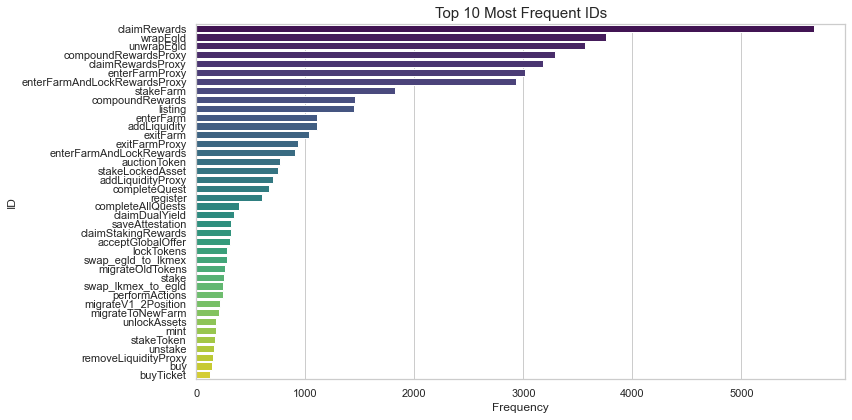

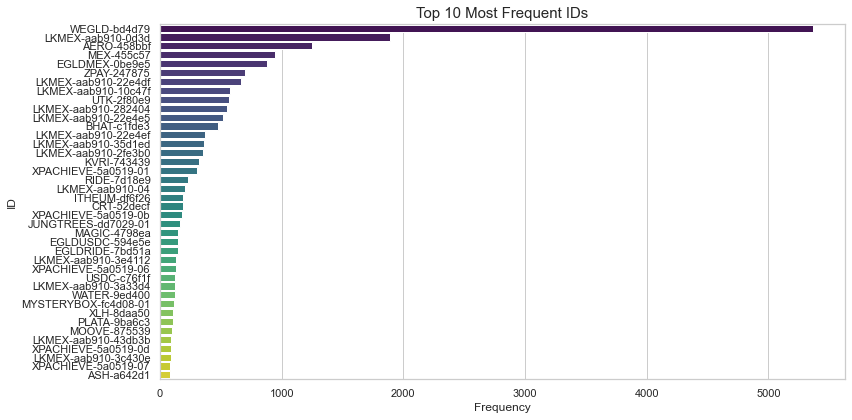

claimRewards                    5669
wrapEgld                        3758
unwrapEgld                      3570
compoundRewardsProxy            3288
claimRewardsProxy               3181
enterFarmProxy                  3018
enterFarmAndLockRewardsProxy    2934
stakeFarm                       1827
compoundRewards                 1457
listing                         1443
enterFarm                       1110
addLiquidity                    1104
exitFarm                        1034
exitFarmProxy                    936
enterFarmAndLockRewards          909
auctionToken                     773
stakeLockedAsset                 752
addLiquidityProxy                701
completeQuest                    672
register                         604
completeAllQuests                388
claimDualYield                   343
saveAttestation                  317
claimStakingRewards              316
acceptGlobalOffer                307
lockTokens                       286
swap_egld_to_lkmex               284
m

WEGLD-bd4d79            5363
LKMEX-aab910-0d3d       1890
AERO-458bbf             1253
MEX-455c57               942
EGLDMEX-0be9e5           878
ZPAY-247875              695
LKMEX-aab910-22e4df      667
LKMEX-aab910-10c47f      579
UTK-2f80e9               567
LKMEX-aab910-282404      548
LKMEX-aab910-22e4e5      517
BHAT-c1fde3              479
LKMEX-aab910-22e4ef      371
LKMEX-aab910-35d1ed      360
LKMEX-aab910-2fe3b0      353
KVRI-743439              322
XPACHIEVE-5a0519-01      308
RIDE-7d18e9              229
LKMEX-aab910-04          208
ITHEUM-df6f26            193
CRT-52decf               187
XPACHIEVE-5a0519-0b      179
JUNGTREES-dd7029-01      163
MAGIC-4798ea             152
EGLDUSDC-594e5e          150
EGLDRIDE-7bd51a          145
LKMEX-aab910-3e4112      135
XPACHIEVE-5a0519-06      128
USDC-c76f1f              127
LKMEX-aab910-3a33d4      124
WATER-9ed400             122
MYSTERYBOX-fc4d08-01     114
XLH-8daa50               110
PLATA-9ba6c3             106
MOOVE-875539  

In [85]:
# Get the top 10 most frequent '_id' values
top_id_values = df_Shard_0['_source_function'].value_counts().head(40)
top_id_values2 = df_Shard_0['_source_tokens_1'].value_counts().head(40)
# Visualize the top 10 most frequent '_id' values

plt.figure(figsize=(12, 6))
sns.barplot(x=top_id_values.values, y=top_id_values.index, palette="viridis")
plt.title('Top 10 Most Frequent IDs', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_id_values2.values, y=top_id_values2.index, palette="viridis")
plt.title('Top 10 Most Frequent IDs', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.tight_layout()
plt.show()




# Displaying the top 10 in text as well
display(top_id_values,top_id_values2)

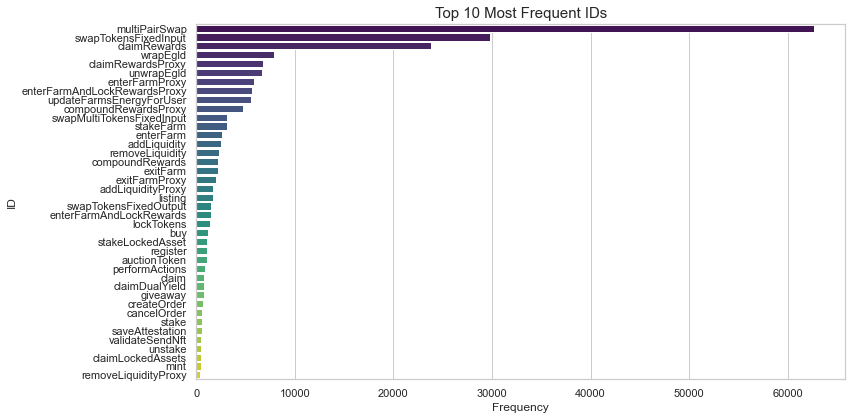

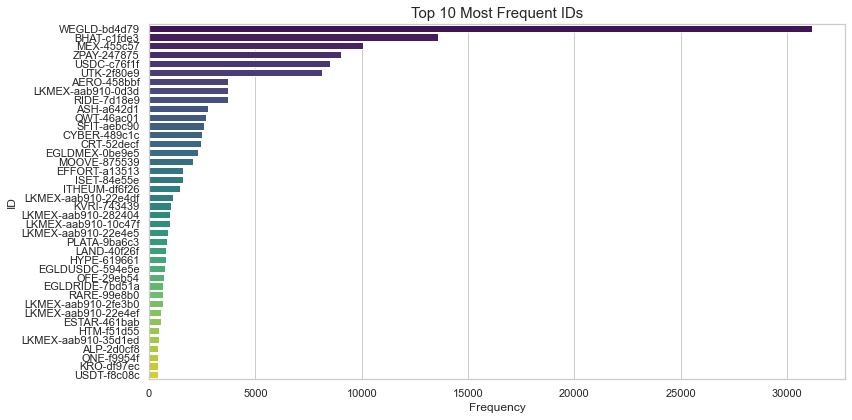

multiPairSwap                   62694
swapTokensFixedInput            29847
claimRewards                    23816
wrapEgld                         7865
claimRewardsProxy                6746
unwrapEgld                       6676
enterFarmProxy                   5884
enterFarmAndLockRewardsProxy     5684
updateFarmsEnergyForUser         5603
compoundRewardsProxy             4793
swapMultiTokensFixedInput        3120
stakeFarm                        3115
enterFarm                        2621
addLiquidity                     2524
removeLiquidity                  2311
compoundRewards                  2222
exitFarm                         2219
exitFarmProxy                    2040
addLiquidityProxy                1753
listing                          1736
swapTokensFixedOutput            1538
enterFarmAndLockRewards          1466
lockTokens                       1355
buy                              1212
stakeLockedAsset                 1106
register                         1072
auctionToken

WEGLD-bd4d79           31169
BHAT-c1fde3            13564
MEX-455c57             10044
ZPAY-247875             9013
USDC-c76f1f             8531
UTK-2f80e9              8142
AERO-458bbf             3734
LKMEX-aab910-0d3d       3722
RIDE-7d18e9             3700
ASH-a642d1              2761
QWT-46ac01              2678
SFIT-aebc90             2596
CYBER-489c1c            2495
CRT-52decf              2437
EGLDMEX-0be9e5          2317
MOOVE-875539            2060
EFFORT-a13513           1605
ISET-84e55e             1593
ITHEUM-df6f26           1478
LKMEX-aab910-22e4df     1107
KVRI-743439             1057
LKMEX-aab910-282404      979
LKMEX-aab910-10c47f      972
LKMEX-aab910-22e4e5      884
PLATA-9ba6c3             854
LAND-40f26f              805
HYPE-619661              787
EGLDUSDC-594e5e          760
OFE-29eb54               723
EGLDRIDE-7bd51a          677
RARE-99e8b0              667
LKMEX-aab910-2fe3b0      645
LKMEX-aab910-22e4ef      579
ESTAR-461bab             564
HTM-f51d55    

In [88]:
# Get the top 10 most frequent '_id' values
top_id_values = df_Shard_1['_source_function'].value_counts().head(40)
top_id_values2 = df_Shard_1['_source_tokens_1'].value_counts().head(40)
# Visualize the top 10 most frequent '_id' values

plt.figure(figsize=(12, 6))
sns.barplot(x=top_id_values.values, y=top_id_values.index, palette="viridis")
plt.title('Top 10 Most Frequent IDs', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_id_values2.values, y=top_id_values2.index, palette="viridis")
plt.title('Top 10 Most Frequent IDs', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.tight_layout()
plt.show()




# Displaying the top 10 in text as well
display(top_id_values,top_id_values2)

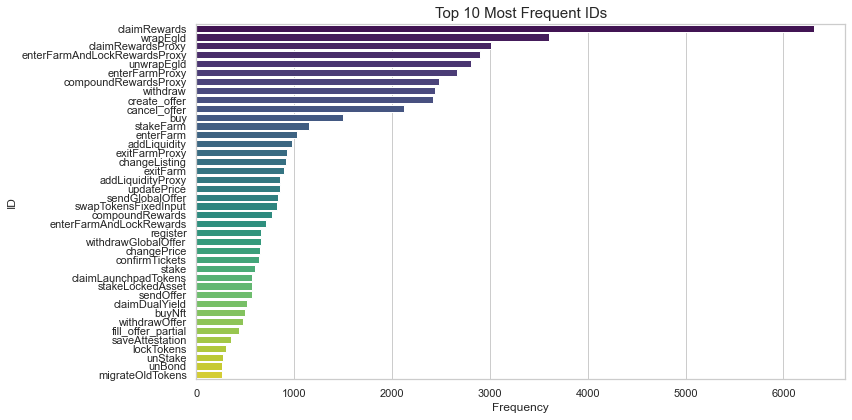

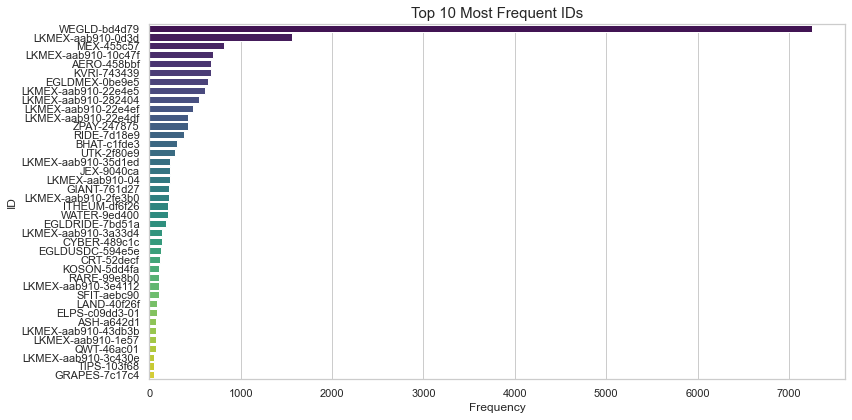

claimRewards                    6316
wrapEgld                        3607
claimRewardsProxy               3010
enterFarmAndLockRewardsProxy    2897
unwrapEgld                      2811
enterFarmProxy                  2665
compoundRewardsProxy            2481
withdraw                        2435
create_offer                    2422
cancel_offer                    2124
buy                             1500
stakeFarm                       1156
enterFarm                       1029
addLiquidity                     982
exitFarmProxy                    930
changeListing                    914
exitFarm                         897
addLiquidityProxy                861
updatePrice                      858
sendGlobalOffer                  834
swapTokensFixedInput             827
compoundRewards                  778
enterFarmAndLockRewards          712
register                         663
withdrawGlobalOffer              658
changePrice                      656
confirmTickets                   637
s

WEGLD-bd4d79           7253
LKMEX-aab910-0d3d      1563
MEX-455c57              817
LKMEX-aab910-10c47f     697
AERO-458bbf             679
KVRI-743439             677
EGLDMEX-0be9e5          644
LKMEX-aab910-22e4e5     613
LKMEX-aab910-282404     548
LKMEX-aab910-22e4ef     476
LKMEX-aab910-22e4df     428
ZPAY-247875             426
RIDE-7d18e9             376
BHAT-c1fde3             302
UTK-2f80e9              281
LKMEX-aab910-35d1ed     231
JEX-9040ca              226
LKMEX-aab910-04         223
GIANT-761d27            220
LKMEX-aab910-2fe3b0     212
ITHEUM-df6f26           205
WATER-9ed400            202
EGLDRIDE-7bd51a         189
LKMEX-aab910-3a33d4     145
CYBER-489c1c            141
EGLDUSDC-594e5e         126
CRT-52decf              114
KOSON-5dd4fa            111
RARE-99e8b0             107
LKMEX-aab910-3e4112     103
SFIT-aebc90             102
LAND-40f26f              84
ELPS-c09dd3-01           81
ASH-a642d1               77
LKMEX-aab910-43db3b      77
LKMEX-aab910-1e57   

In [89]:
# Get the top 10 most frequent '_id' values
top_id_values = df_Shard_2['_source_function'].value_counts().head(40)
top_id_values2 = df_Shard_2['_source_tokens_1'].value_counts().head(40)
# Visualize the top 10 most frequent '_id' values

plt.figure(figsize=(12, 6))
sns.barplot(x=top_id_values.values, y=top_id_values.index, palette="viridis")
plt.title('Top 10 Most Frequent IDs', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_id_values2.values, y=top_id_values2.index, palette="viridis")
plt.title('Top 10 Most Frequent IDs', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.tight_layout()
plt.show()




# Displaying the top 10 in text as well
display(top_id_values,top_id_values2)

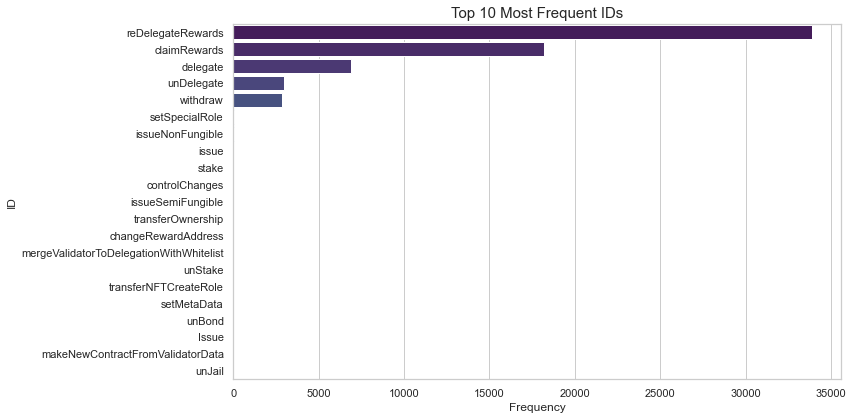

reDelegateRewards                          33909
claimRewards                               18168
delegate                                    6884
unDelegate                                  2982
withdraw                                    2822
setSpecialRole                                35
issueNonFungible                              23
issue                                          9
stake                                          9
controlChanges                                 6
issueSemiFungible                              5
transferOwnership                              4
changeRewardAddress                            3
mergeValidatorToDelegationWithWhitelist        3
unStake                                        2
transferNFTCreateRole                          2
setMetaData                                    2
unBond                                         2
Issue                                          1
makeNewContractFromValidatorData               1
unJail              

Series([], Name: _source_tokens_1, dtype: int64)

In [91]:
# Get the top 10 most frequent '_id' values
top_id_values = df_Shard_4294967295['_source_function'].value_counts().head(40)
# Visualize the top 10 most frequent '_id' values

plt.figure(figsize=(12, 6))
sns.barplot(x=top_id_values.values, y=top_id_values.index, palette="viridis")
plt.title('Top 10 Most Frequent IDs', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.tight_layout()
plt.show()





# Displaying the top 10 in text as well
display(top_id_values,top_id_values2)

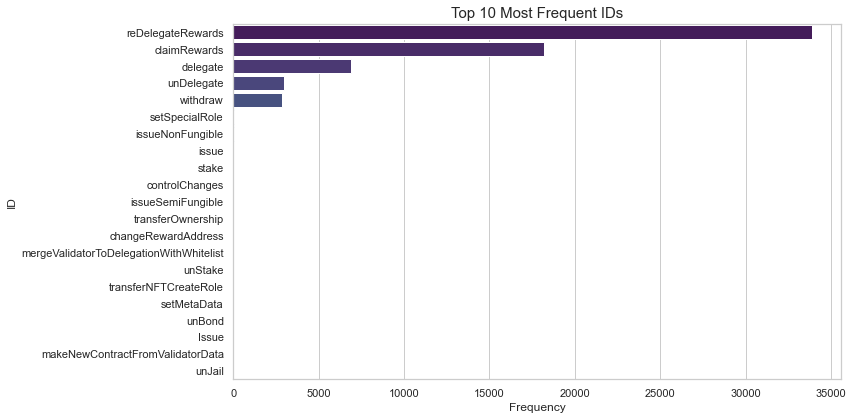

reDelegateRewards                          33909
claimRewards                               18168
delegate                                    6884
unDelegate                                  2982
withdraw                                    2822
setSpecialRole                                35
issueNonFungible                              23
issue                                          9
stake                                          9
controlChanges                                 6
issueSemiFungible                              5
transferOwnership                              4
changeRewardAddress                            3
mergeValidatorToDelegationWithWhitelist        3
unStake                                        2
transferNFTCreateRole                          2
setMetaData                                    2
unBond                                         2
Issue                                          1
makeNewContractFromValidatorData               1
unJail              

In [83]:
# Get the top 10 most frequent '_id' values
top_id_values = df_Shard_4294967295['_source_function'].value_counts().head(40)

# Visualize the top 10 most frequent '_id' values
plt.figure(figsize=(12, 6))
sns.barplot(x=top_id_values.values, y=top_id_values.index, palette="viridis")
plt.title('Top 10 Most Frequent IDs', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.tight_layout()
plt.show()

# Displaying the top 10 in text as well
top_id_values

## canBurn,canMint,accounts,name,owner,minted,burnt,initialMinted,decimals,isPaused,transactions,canPause,canUpgrade,canChangeOwner,canAddSpecialRoles,type,canFreeze,canWipe,supply,circulatingSupply,identifier,ticker

In [93]:
#liste_SameValue=[canBurn,canMint,accounts,name,owner,minted,burnt,initialMinted,decimals,isPaused,transactions,canPause,canUpgrade,canChangeOwner,canAddSpecialRoles,type,canFreeze,canWipe,supply,circulatingSupply,identifier,ticker]                       

In [96]:
filtered_df_SameValue = df_cleaned[df_cleaned['canMint'].notna()]
filtered_df_SameValue_null = df_cleaned[df_cleaned['canMint'].isnull()]
display(filtered_df_SameValue,filtered_df_SameValue_null)

_index _type  \
334     transactions-000001  _doc   
335     transactions-000001  _doc   
336     transactions-000001  _doc   
337     transactions-000001  _doc   
338     transactions-000001  _doc   
...                     ...   ...   
461614  transactions-000001  _doc   
461912  transactions-000001  _doc   
462216  transactions-000001  _doc   
462314  transactions-000001  _doc   
462639  transactions-000001  _doc   

                                                      _id  \
334     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
335     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
336     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
337     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
338     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
...                                                   ...   
461614  53bc81fa3d16d54848f6a17dac59eeffddb602281a79b3...   
461912  7adf3e0db8dc9dfe4c95ad1f24129f896c7a6e53acfec6...   
462216  215b86384c3ed5f4cfb7f2fbfedbeb860698269ce07183...   
462314  c99de1911583886b9ec000eac03de9dcc547598af35160...   
462639  4f24b28aa7bfa28aa74306f0cad995276d72e6fcf88c8b...   

                                    _source_miniBlockHash  _source_nonce  \
334     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...            102   
335     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...            102   
336     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...            102   
337     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...            102   
338     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...            102   
...                                                   ...            ...   
461614  a524cc22a1a746d358544c5090ad7661837e41bbe5511b...              8   
461912  c8e32473dce9a8622eb9df66ee56cde8c0e1bb63bd1272...            564   
462216  614a0eb1de957e8251986483480d060a0da846c75df3dc...          18609   
462314  6f201dc794bf354ce8f698f60d26bc8ce2e8a02c590e42...          13433   
462639  d2016d6feb879519aa120e2521d02e3504a6da0b949856...          10111   

        _source_round  _source_value  \
334          13490702   0.000000e+00   
335          13490702   0.000000e+00   
336          13490702   0.000000e+00   
337          13490702   0.000000e+00   
338          13490702   0.000000e+00   
...               ...            ...   
461614        8099419   1.200000e+18   
461912       11779210   0.000000e+00   
462216        9645034   0.000000e+00   
462314        9221590   0.000000e+00   
462639        8143236   0.000000e+00   

                                         _source_receiver  \
334     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
335     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
336     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
337     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
338     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
...                                                   ...   
461614  erd1qqqqqqqqqqqqqpgqw6tq7agu652eh8zv8hcnrwds5h...   
461912  erd1ucs7m9pha5rnzdlu6ck36ywvq528lpmrzagc4u4q0x...   
462216  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462314  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462639  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   

                                           _source_sender  \
334     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
335     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
336     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
337     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
338     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
...                                                   ...   
461614  erd12p6uzr050hx7vn9vheyc8jtlu8qg5ppheyweyw9tuf...   
461912  erd1ucs7m9pha5rnzdlu6ck36ywvq528lpmrzagc4u4q0x...   
462216  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462314  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462639  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3

_index _type  \
0       transactions-000001  _doc   
1       transactions-000001  _doc   
2       transactions-000001  _doc   
3       transactions-000001  _doc   
4       transactions-000001  _doc   
...                     ...   ...   
463505  transactions-000001  _doc   
463506  transactions-000001  _doc   
463507  transactions-000001  _doc   
463508  transactions-000001  _doc   
463509  transactions-000001  _doc   

                                                      _id  \
0       4f6ca1b621597b2e9b305847b711f51f273093a99d9463...   
1       5f900b8226d9b738531f44b96268fcaf39affa3ea00fcf...   
2       a37770d53c06d40421e78908285520e6604df81f0f55d0...   
3       ec418ea4492c5b0e2d742f30eefd15a4ea590c2a2fe273...   
4       ae2f3b7a7669f2c268fdd8ecf5ece5f4a33b02df5d54ab...   
...                                                   ...   
463505  c8f174e5c398d97b30bf35f89d82e5072f9c33f5efa448...   
463506  93792fa866035f001601d58181f1d07102c32421685729...   
463507  5e7aa333bc346fd90ec7f456b9a901380550714fe5f73e...   
463508  cd914833e81060c70368d8febbd9bb9b0856556b19133f...   
463509  71ac0b397d40602afe7f82c370178aa6fb15aef4719f98...   

                                    _source_miniBlockHash  _source_nonce  \
0       bba779df6b540456f830816311b5de2ad2800e6c4646c4...            141   
1       d7e84bb38a27f3010a021e6301281b103c732284605230...            140   
2       8fcbee30ed6fec92ded5c64e95ccc1d5cb3ce9d9ea364b...            139   
3       9f919e1ccadd40821a445c74dd27e7458d89be72bf94d2...            138   
4       e3e593e3ba0f695dca4cadad838769652534ac3d3ba75b...            137   
...                                                   ...            ...   
463505  3979326d169679d75b0633342ed810d91ae94d1af15297...              3   
463506  9dec052669c4064e4dea48cbd6b77eead33c0085042cfb...         704217   
463507  33f6a3f518ef7ebebd6cf5514a9c9055129e3f6ae6dbd9...         652657   
463508  5830e279a59b766b3a5e35832566cf50e9651937dc6d50...         652655   
463509  5830e279a59b766b3a5e35832566cf50e9651937dc6d50...         652654   

        _source_round  _source_value  \
0             7617683   9.900361e+17   
1             7617653   0.000000e+00   
2             7617651   0.000000e+00   
3             7563967   0.000000e+00   
4             7561873   0.000000e+00   
...               ...            ...   
463505        6973582   1.150000e+17   
463506        6973411   2.387600e+17   
463507        6959094   0.000000e+00   
463508        6959092   0.000000e+00   
463509        6959092   0.000000e+00   

                                         _source_receiver  \
0       erd1ld3alcg5utt5fxxdvjgpzg3ep46twc7ys9pw2vuapj...   
1       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
2       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
3       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
4       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
...                                                   ...   
463505  erd1qqqqqqqqqqqqqpgqvc7gdl0p4s97guh498wgz75k8s...   
463506  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463507  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463508  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463509  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   

                                           _source_sender  \
0       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
1       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
2       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
3       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
4       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
...                                                   ...   
463505  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463506  erd16x7le8dpkjsafgwjx0e5kw94evsqw039rwp42m2j9e...   
463507  erd1lgtrza8q2p8zzrdger0lpsh6z9mxrscxa68mxxnjg3...   
463508  erd1lgtrza8q2p8zzrdger0lpsh6z9mxrscxa68mxxnjg3...   
463509  erd1lgtrza8q2p8zzrdger0lpsh6z9mxrscxa

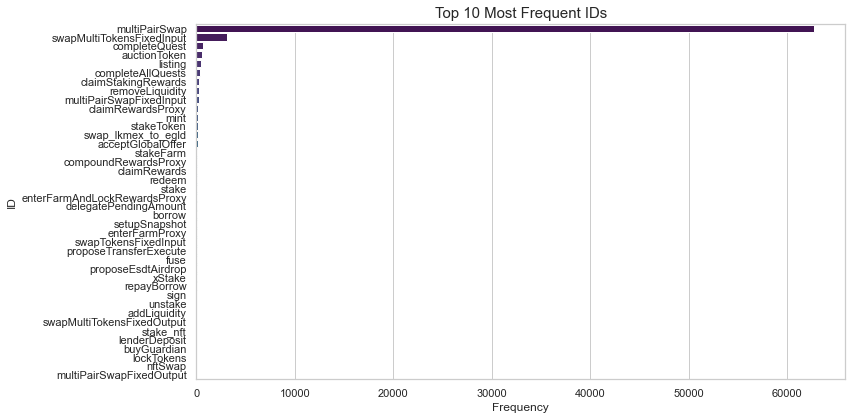

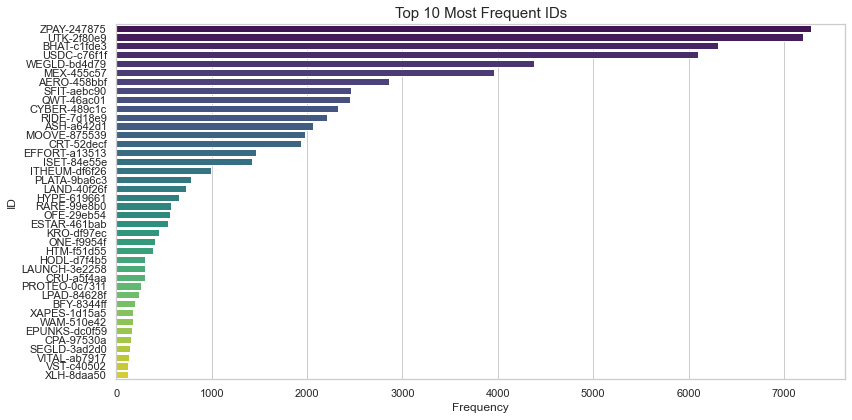

multiPairSwap                   62737
swapMultiTokensFixedInput        3120
completeQuest                     672
auctionToken                      583
listing                           478
completeAllQuests                 388
claimStakingRewards               316
removeLiquidity                   288
multiPairSwapFixedInput           260
claimRewardsProxy                 218
mint                              210
stakeToken                        152
swap_lkmex_to_egld                141
acceptGlobalOffer                 134
stakeFarm                         128
compoundRewardsProxy              123
claimRewards                      121
redeem                            114
stake                             102
enterFarmAndLockRewardsProxy       90
delegatePendingAmount              68
borrow                             60
setupSnapshot                      54
enterFarmProxy                     45
swapTokensFixedInput               43
proposeTransferExecute             43
fuse        

ZPAY-247875      7279
UTK-2f80e9       7197
BHAT-c1fde3      6310
USDC-c76f1f      6101
WEGLD-bd4d79     4377
MEX-455c57       3955
AERO-458bbf      2859
SFIT-aebc90      2461
QWT-46ac01       2454
CYBER-489c1c     2323
RIDE-7d18e9      2206
ASH-a642d1       2057
MOOVE-875539     1979
CRT-52decf       1938
EFFORT-a13513    1465
ISET-84e55e      1421
ITHEUM-df6f26     994
PLATA-9ba6c3      787
LAND-40f26f       731
HYPE-619661       652
RARE-99e8b0       574
OFE-29eb54        559
ESTAR-461bab      542
KRO-df97ec        444
ONE-f9954f        410
HTM-f51d55        388
HODL-d7f4b5       303
LAUNCH-3e2258     301
CRU-a5f4aa        301
PROTEO-0c7311     258
LPAD-84628f       234
BFY-8344ff        192
XAPES-1d15a5      175
WAM-510e42        172
EPUNKS-dc0f59     166
CPA-97530a        154
SEGLD-3ad2d0      148
VITAL-ab7917      129
VST-c40502        120
XLH-8daa50        119
Name: _source_tokens_1, dtype: int64

In [97]:
# Get the top 10 most frequent '_id' values
top_id_values = filtered_df_SameValue['_source_function'].value_counts().head(40)
top_id_values2 = filtered_df_SameValue['_source_tokens_1'].value_counts().head(40)
# Visualize the top 10 most frequent '_id' values

plt.figure(figsize=(12, 6))
sns.barplot(x=top_id_values.values, y=top_id_values.index, palette="viridis")
plt.title('Top 10 Most Frequent IDs', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_id_values2.values, y=top_id_values2.index, palette="viridis")
plt.title('Top 10 Most Frequent IDs', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.tight_layout()
plt.show()




# Displaying the top 10 in text as well
display(top_id_values,top_id_values2)

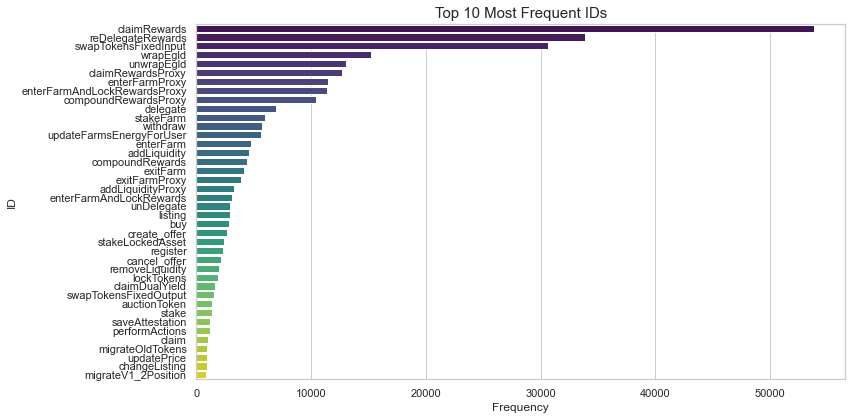

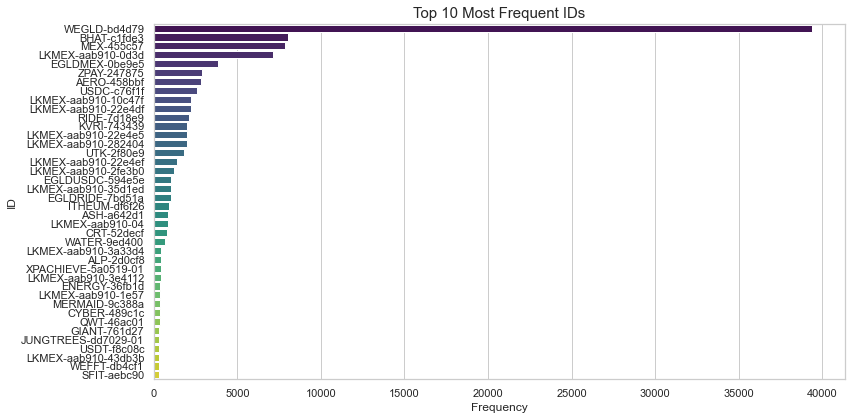

claimRewards                    53848
reDelegateRewards               33909
swapTokensFixedInput            30682
wrapEgld                        15230
unwrapEgld                      13057
claimRewardsProxy               12719
enterFarmProxy                  11522
enterFarmAndLockRewardsProxy    11425
compoundRewardsProxy            10439
delegate                         6915
stakeFarm                        5970
withdraw                         5730
updateFarmsEnergyForUser         5603
enterFarm                        4743
addLiquidity                     4585
compoundRewards                  4454
exitFarm                         4140
exitFarmProxy                    3888
addLiquidityProxy                3309
enterFarmAndLockRewards          3080
unDelegate                       2982
listing                          2939
buy                              2861
create_offer                     2651
stakeLockedAsset                 2428
register                         2335
cancel_offer

WEGLD-bd4d79           39408
BHAT-c1fde3             8035
MEX-455c57              7848
LKMEX-aab910-0d3d       7116
EGLDMEX-0be9e5          3825
ZPAY-247875             2855
AERO-458bbf             2807
USDC-c76f1f             2597
LKMEX-aab910-10c47f     2243
LKMEX-aab910-22e4df     2195
RIDE-7d18e9             2099
KVRI-743439             2011
LKMEX-aab910-22e4e5     2005
LKMEX-aab910-282404     1985
UTK-2f80e9              1793
LKMEX-aab910-22e4ef     1415
LKMEX-aab910-2fe3b0     1194
EGLDUSDC-594e5e         1036
LKMEX-aab910-35d1ed     1018
EGLDRIDE-7bd51a         1011
ITHEUM-df6f26            882
ASH-a642d1               861
LKMEX-aab910-04          833
CRT-52decf               800
WATER-9ed400             695
LKMEX-aab910-3a33d4      454
ALP-2d0cf8               449
XPACHIEVE-5a0519-01      446
LKMEX-aab910-3e4112      413
ENERGY-36fb1d            375
LKMEX-aab910-1e57        365
MERMAID-9c388a           359
CYBER-489c1c             358
QWT-46ac01               348
GIANT-761d27  

In [98]:
# Get the top 10 most frequent '_id' values
top_id_values = filtered_df_SameValue_null['_source_function'].value_counts().head(40)
top_id_values2 = filtered_df_SameValue_null['_source_tokens_1'].value_counts().head(40)
# Visualize the top 10 most frequent '_id' values

plt.figure(figsize=(12, 6))
sns.barplot(x=top_id_values.values, y=top_id_values.index, palette="viridis")
plt.title('Top 10 Most Frequent IDs', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_id_values2.values, y=top_id_values2.index, palette="viridis")
plt.title('Top 10 Most Frequent IDs', fontsize=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.tight_layout()
plt.show()




# Displaying the top 10 in text as well
display(top_id_values,top_id_values2)

#### Expliquer par multiPairSwap

## _source_status

success    0.970937
fail       0.027404
invalid    0.001659
Name: _source_status, dtype: float64

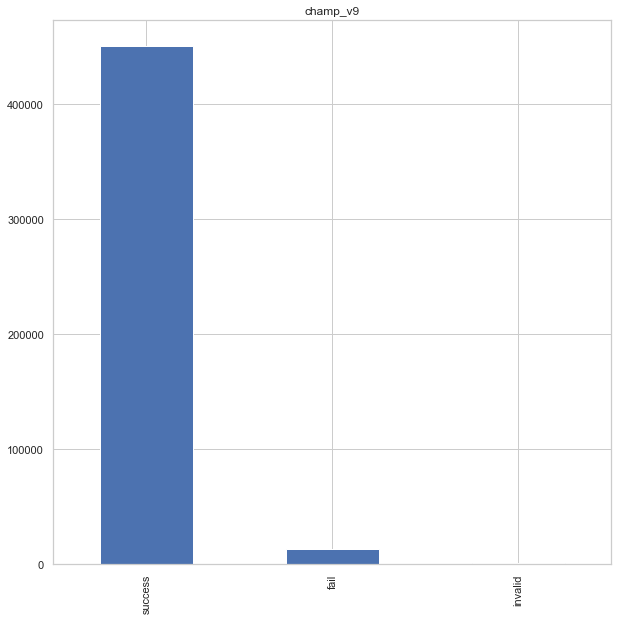

In [99]:
plt.figure()
df_cleaned['_source_status'].value_counts()[:34].plot(kind='bar',figsize=(10,10),title='champ_v9')
plt.show
df_cleaned['_source_status'].value_counts(normalize=True)

Faut il virer les invalide et fail ? 

In [101]:
df_cleaned[df_cleaned['_source_status'] == 'fail']

_index _type  \
19      transactions-000001  _doc   
59      transactions-000001  _doc   
98      transactions-000001  _doc   
99      transactions-000001  _doc   
127     transactions-000001  _doc   
...                     ...   ...   
463295  transactions-000001  _doc   
463429  transactions-000001  _doc   
463461  transactions-000001  _doc   
463463  transactions-000001  _doc   
463464  transactions-000001  _doc   

                                                      _id  \
19      868afb6fb075e58b8222dd9f8cddbf1d7557ae032e0b90...   
59      f59358e1e54c292df30446c5d7b770f9bf4a1f7df1fc48...   
98      766ec13f8a3d1f59cad03eaec531ed68653818dda97ae2...   
99      bbafe9d7d6682f9ef95b6ba832053a8886ca32f54f234f...   
127     1a0de70ee83e3d761590bb29ba196e4d555a0126913d69...   
...                                                   ...   
463295  7cfa6a2f1a87df37e263e6779a13a56be8019c55190969...   
463429  770133293dfc5864366c0cf3a3a254a1fd38a395180808...   
463461  add6507d56e17ae04b45d38cc291d8407082bb3a105447...   
463463  f3fdb629e315dc84ff218c585b000acac99947c4eac6ab...   
463464  387a651b10d4e31289f4595d2ea0b0145bbb9ba394bf73...   

                                    _source_miniBlockHash  _source_nonce  \
19      ea4c3ea231e1f1f98db842a1ed4568d5a74e9c52b5520e...            122   
59      697c70a1fbf88fffc021a3058679886143104efcaf1a86...             82   
98      30288f71086cf2690b38da848149eb9fece28e89172170...             43   
99      3f9f2c6dffe809ed40d34f438d576d5a681dc44164fef5...             42   
127     a946a316e4ae022c312c6decec5002384ae4c13ad8d2d1...             15   
...                                                   ...            ...   
463295  e7b8d03cdc235dbf1c8862c502cfb82625f0f8a7aaf5a4...              7   
463429  fc220d25a3c2dc6829fe6888b40f415e53e9f4f834d324...             76   
463461  e719029e659b4d65b34aa15151f73026d445a322597a49...             45   
463463  6e1bbe389aeddb1d2bdbde0e0fffd0dfd7400c9efbcdc9...             43   
463464  bb04d11656a226e4e41bf8e960059e36c1015a1639ce21...             42   

        _source_round  _source_value  \
19            7435579   0.000000e+00   
59            7087914   0.000000e+00   
98            6824482   2.000000e+18   
99            6824472   2.000000e+18   
127           6268146   0.000000e+00   
...               ...            ...   
463295        6850009   0.000000e+00   
463429        7262901   0.000000e+00   
463461        7075206   0.000000e+00   
463463        7075153   0.000000e+00   
463464        7074875   0.000000e+00   

                                         _source_receiver  \
19      erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
59      erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
98      erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
99      erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
127     erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
...                                                   ...   
463295  erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
463429  erd1qqqqqqqqqqqqqpgqav09xenkuqsdyeyy5evqyhuusv...   
463461  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463463  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463464  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   

                                           _source_sender  \
19      erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
59      erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
98      erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
99      erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
127     erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
...                                                   ...   
463295  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42y7753heqs...   
463429  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463461  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463463  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463464  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t

In [102]:
df_cleaned[df_cleaned['_source_status'] == 'invalid']

_index _type  \
157     transactions-000001  _doc   
436     transactions-000001  _doc   
1938    transactions-000001  _doc   
1960    transactions-000001  _doc   
1963    transactions-000001  _doc   
...                     ...   ...   
460638  transactions-000001  _doc   
460715  transactions-000001  _doc   
461458  transactions-000001  _doc   
461614  transactions-000001  _doc   
462882  transactions-000001  _doc   

                                                      _id  \
157     f062357dec10caad1b1fcf31be62928e48349fe180fb06...   
436     e6d0823e1759a3a5138a9f6552244d9e3468e114218c4b...   
1938    b8674b625e68d8e37eb448ca8fb2324bcbd15f92a14548...   
1960    9d2bf1b649627e743bc972154068d829bf6c52db2d4267...   
1963    76ee5069093561dc2173b54da90c2f1615833a17ba1cc3...   
...                                                   ...   
460638  1397f56913635c4ae672fa06c208c62ac2cfc449c0af19...   
460715  06ccc425656d7d085622fc265fddc4ece003ffc4e66422...   
461458  a7ac4fa9b0ad606e08e6c3254b4f88733ebab7ddd69691...   
461614  53bc81fa3d16d54848f6a17dac59eeffddb602281a79b3...   
462882  b37f67bbf6f5784b6f2e664af65cb4511ef682d3818b9a...   

                                    _source_miniBlockHash  _source_nonce  \
157     7640f4077c172a44cde0db233b0b7746a8d8f5695d9567...              4   
436     176ac00e7215478017115ef1b652c43899512b271f6f39...             17   
1938    2a06b00563da59739f8447b982ea5cfc7bbd7c3c416be5...            491   
1960    e9997d6331713533cf83472d5690d23e8e0be7fc3628e3...            468   
1963    b012877df43c405960fb4bc0276e0233e0af43499d2c07...            466   
...                                                   ...            ...   
460638  291089ba38009783f66f5c9bcd51095cecd01e809d8c6a...            285   
460715  a12ebdd9bc145c7e40d3a661b029794fc01b79bffd0ac5...            212   
461458  5830f37bfa2c424a0d64445136ee7bc6cf8dea66d9e4ba...           3571   
461614  a524cc22a1a746d358544c5090ad7661837e41bbe5511b...              8   
462882  af827721518b6a20a0a32e8a374ac6a360ad36727f6457...            397   

        _source_round  _source_value  \
157           6897117   1.500000e+17   
436          11826441   2.719523e+18   
1938          9513443   5.618246e+19   
1960          9459121   3.292105e+19   
1963          9459109   3.292166e+19   
...               ...            ...   
460638        7445112   5.300000e+17   
460715        6942407   1.177000e+17   
461458        4752928   1.000000e+20   
461614        8099419   1.200000e+18   
462882        7612792   3.000000e+17   

                                         _source_receiver  \
157     erd1qqqqqqqqqqqqqpgqvc7gdl0p4s97guh498wgz75k8s...   
436     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
1938    erd1qqqqqqqqqqqqqpgqhe8t5jewej70zupmh44jurgn29...   
1960    erd1qqqqqqqqqqqqqpgqhe8t5jewej70zupmh44jurgn29...   
1963    erd1qqqqqqqqqqqqqpgqhe8t5jewej70zupmh44jurgn29...   
...                                                   ...   
460638  erd1qqqqqqqqqqqqqpgq23al928wv42z234tfm2nyulax5...   
460715  erd1qqqqqqqqqqqqqpgqhe8t5jewej70zupmh44jurgn29...   
461458  erd1l6vhfmrkcqzfvtl7dmfzu8juj3s2a8lehyqfch97ud...   
461614  erd1qqqqqqqqqqqqqpgqw6tq7agu652eh8zv8hcnrwds5h...   
462882  erd1qqqqqqqqqqqqqpgqhp58f7czqx8mln097ur7x0z9vu...   

                                           _source_sender  \
157     erd1qk8tujl0ec64a7v83r4qmej4zz3xn62q8rdcpex4ht...   
436     erd19dfypjt5v4tc42unxmk2g4kc985294rlcw5mxwvrgw...   
1938    erd1dge3aj9z9wpyx4xe4ww5zgqng80jasm5wav6drhr2n...   
1960    erd1dge3aj9z9wpyx4xe4ww5zgqng80jasm5wav6drhr2n...   
1963    erd1dge3aj9z9wpyx4xe4ww5zgqng80jasm5wav6drhr2n...   
...                                                   ...   
460638  erd1ywwjs029ljjmkypm2sx7tl7an37w8mlvta4rtr4q3s...   
460715  erd1ywwjs029ljjmkypm2sx7tl7an37w8mlvta4rtr4q3s...   
461458  erd1nnh7p5ah6z6tlw0hhuvmljh9wvhf6xh4uq8f2tkv86...   
461614  erd12p6uzr050hx7vn9vheyc8jtlu8qg5ppheyweyw9tuf...   
462882  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42

## _source_operation

transfer                0.410095
ESDTTransfer            0.289713
ESDTNFTTransfer         0.177746
MultiESDTNFTTransfer    0.118399
SaveKeyValue            0.002576
reward                  0.000954
ESDTNFTCreate           0.000244
SetGuardian             0.000114
ESDTNFTBurn             0.000071
GuardAccount            0.000035
ChangeOwnerAddress      0.000026
scDeploy                0.000019
UnGuardAccount          0.000006
ESDTLocalBurn           0.000002
Name: _source_operation, dtype: float64

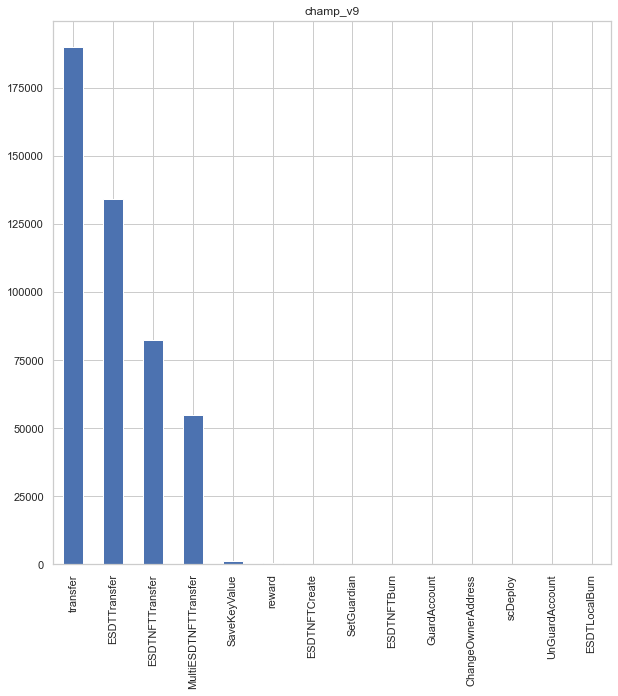

In [126]:
plt.figure()
df_cleaned['_source_operation'].value_counts()[:34].plot(kind='bar',figsize=(10,10),title='champ_v9')
plt.show
df_cleaned['_source_operation'].value_counts(normalize=True)

## Correlation matrice

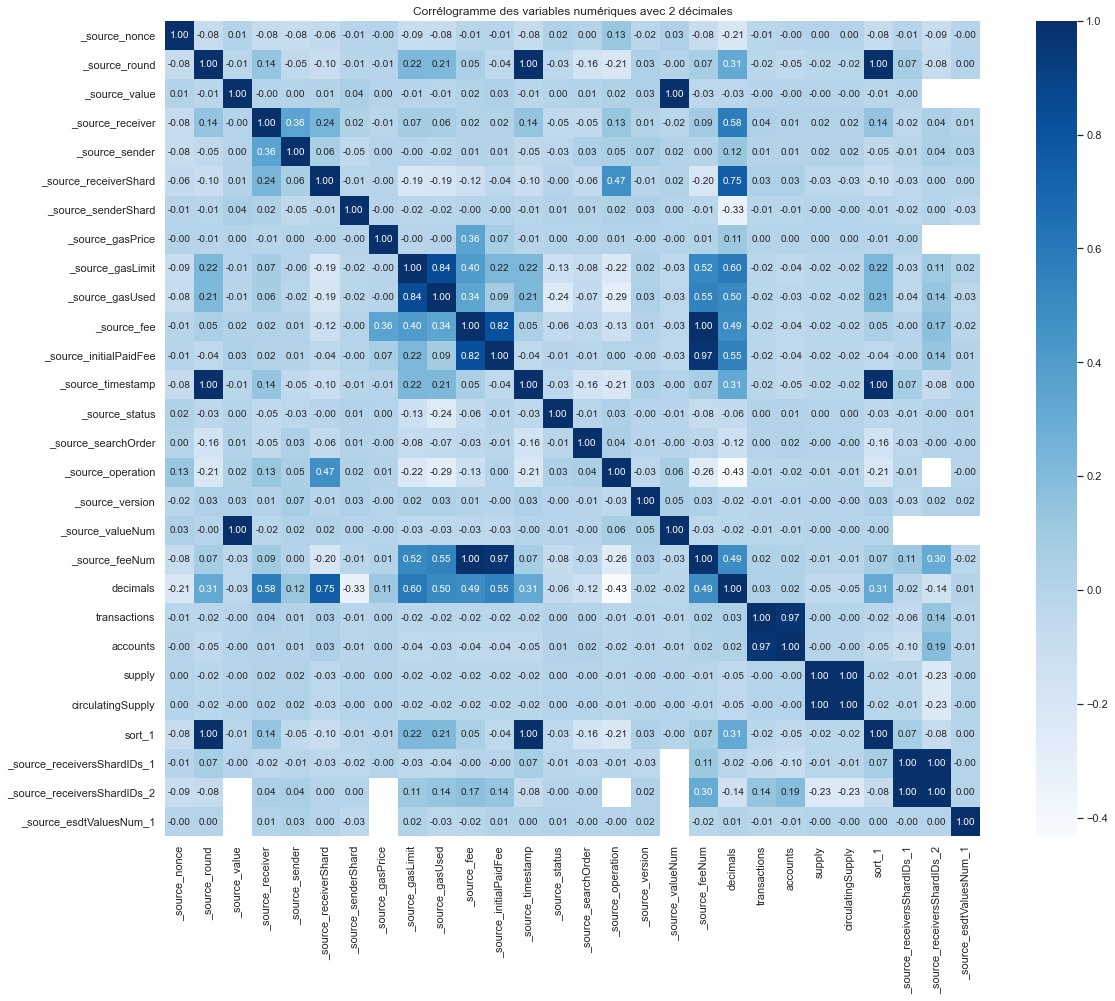

In [134]:
from sklearn.preprocessing import LabelEncoder


# Make a copy of the dataframe for correlation analysis
cor = df_cleaned.copy()

# Select some categorical columns for label encoding
cols = ['_source_receiver', '_source_sender', '_source_operation', '_source_status']

# Initialize label encoders
labels = {}

# Loop for label encoding
for name in cols:
    label_encode = LabelEncoder()
    labels[name] = label_encode
    cor[name] = label_encode.fit_transform(df[name].astype(str))

# Separate data into categorical and numerical for potential future use
cat_data = cor.select_dtypes(include=['object'])
num_data = cor.select_dtypes(exclude=['object'])

# Calculate correlation matrix
correlation = num_data.corr()  

# Set aesthetic properties
sns.set(font_scale=1, style='whitegrid')
plt.figure(figsize=(20,15))

# Create a heatmap with 2 decimal places in annotations
sns.heatmap(correlation, cbar=True, square=True, annot=True, fmt=".2f", annot_kws={'size': 10}, cmap='Blues')

# Title for the plot
plt.title('Corrélogramme des variables numériques avec 2 décimales')
plt.show()

# Sauvegarde

In [128]:
pourcentage = 0.1
df_reduit_only = df_cleaned.sample(frac=pourcentage, random_state=42)
nom_fichier_csv3 = 'csv_TKYC_after_analyse.csv'

# Utilisez la méthode to_csv() pour sauvegarder le DataFrame au format CSV
df_reduit_only.to_csv(nom_fichier_csv3, index=False)

# Pre process

## Separate quali/quanti

In [28]:
# Identifier les colonnes quantitatives et qualitatives
quantitative_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
qualitative_columns = df_cleaned.select_dtypes(include=['object']).columns

# Créer deux DataFrames distincts
df_cleaned_quantitative = df_cleaned[quantitative_columns]
df_cleaned_qualitative = df_cleaned[qualitative_columns]

display(df_cleaned_quantitative, df_cleaned_qualitative)


_source_nonce  _source_round  _source_value  _source_receiverShard  \
0                 141        7617683   9.900361e+17                      0   
1                 140        7617653   0.000000e+00             4294967295   
2                 139        7617651   0.000000e+00             4294967295   
3                 138        7563967   0.000000e+00             4294967295   
4                 137        7561873   0.000000e+00             4294967295   
...               ...            ...            ...                    ...   
463505              3        6973582   1.150000e+17                      0   
463506         704217        6973411   2.387600e+17                      0   
463507         652657        6959094   0.000000e+00                      0   
463508         652655        6959092   0.000000e+00                      0   
463509         652654        6959092   0.000000e+00                      0   

        _source_senderShard  _source_gasPrice  _source_gasLimit  \
0                         0        1000000000             50000   
1                         0        1000000000          12000000   
2                         0        1000000000          12000000   
3                         0        1000000000          12000000   
4                         0        1000000000          12000000   
...                     ...               ...               ...   
463505                    0        1000000000           4000000   
463506                    1        1000000000             50000   
463507                    0        1000000000           4672019   
463508                    0        1000000000           5233550   
463509                    0        1000000000           4148000   

        _source_gasUsed   _source_fee  _source_initialPaidFee  ...  \
0                 50000  5.000000e+13            5.000000e+13  ...   
1               6075500  1.355000e+14            1.947450e+14  ...   
2               6075500  1.355000e+14            1.947450e+14  ...   
3               6075500  1.355000e+14            1.947450e+14  ...   
4               6075500  1.355000e+14            1.947450e+14  ...   
...                 ...           ...                     ...  ...   
463505          2111255  8.249255e+13            1.013800e+14  ...   
463506            50000  5.000000e+13            5.000000e+13  ...   
463507          4672019  1.637650e+15            1.637650e+15  ...   
463508          5233550  1.358146e+15            1.358146e+15  ...   
463509          4148000  2.190770e+15            2.190770e+15  ...   

        _source_feeNum  decimals  transactions  accounts  supply  \
0                  NaN       NaN           NaN       NaN     NaN   
1                  NaN       NaN           NaN       NaN     NaN   
2                  NaN       NaN           NaN       NaN     NaN   
3                  NaN       NaN           NaN       NaN     NaN   
4                  NaN       NaN           NaN       NaN     NaN   
...                ...       ...           ...       ...     ...   
463505             NaN       NaN           NaN       NaN     NaN   
463506             NaN       NaN           NaN       NaN     NaN   
463507             NaN       NaN           NaN       NaN     NaN   
463508             NaN       NaN           NaN       NaN     NaN   
463509             NaN       NaN           NaN       NaN     NaN   

        circulatingSupply         sort_1  _source_receiversShardIDs_1  \
0                     NaN  1641823698000                          NaN   
1                     NaN  1641823518000                          NaN   
2                     NaN  1641823506000                          NaN   
3                     NaN  1641501402000                          NaN   
4                     NaN  1641488838000                          NaN   
...                   ...            ...                          ...   
463505                NaN  1637959092000                          NaN   
463506                Na

_index _type  \
0       transactions-000001  _doc   
1       transactions-000001  _doc   
2       transactions-000001  _doc   
3       transactions-000001  _doc   
4       transactions-000001  _doc   
...                     ...   ...   
463505  transactions-000001  _doc   
463506  transactions-000001  _doc   
463507  transactions-000001  _doc   
463508  transactions-000001  _doc   
463509  transactions-000001  _doc   

                                                      _id  \
0       4f6ca1b621597b2e9b305847b711f51f273093a99d9463...   
1       5f900b8226d9b738531f44b96268fcaf39affa3ea00fcf...   
2       a37770d53c06d40421e78908285520e6604df81f0f55d0...   
3       ec418ea4492c5b0e2d742f30eefd15a4ea590c2a2fe273...   
4       ae2f3b7a7669f2c268fdd8ecf5ece5f4a33b02df5d54ab...   
...                                                   ...   
463505  c8f174e5c398d97b30bf35f89d82e5072f9c33f5efa448...   
463506  93792fa866035f001601d58181f1d07102c32421685729...   
463507  5e7aa333bc346fd90ec7f456b9a901380550714fe5f73e...   
463508  cd914833e81060c70368d8febbd9bb9b0856556b19133f...   
463509  71ac0b397d40602afe7f82c370178aa6fb15aef4719f98...   

                                    _source_miniBlockHash  \
0       bba779df6b540456f830816311b5de2ad2800e6c4646c4...   
1       d7e84bb38a27f3010a021e6301281b103c732284605230...   
2       8fcbee30ed6fec92ded5c64e95ccc1d5cb3ce9d9ea364b...   
3       9f919e1ccadd40821a445c74dd27e7458d89be72bf94d2...   
4       e3e593e3ba0f695dca4cadad838769652534ac3d3ba75b...   
...                                                   ...   
463505  3979326d169679d75b0633342ed810d91ae94d1af15297...   
463506  9dec052669c4064e4dea48cbd6b77eead33c0085042cfb...   
463507  33f6a3f518ef7ebebd6cf5514a9c9055129e3f6ae6dbd9...   
463508  5830e279a59b766b3a5e35832566cf50e9651937dc6d50...   
463509  5830e279a59b766b3a5e35832566cf50e9651937dc6d50...   

                                         _source_receiver  \
0       erd1ld3alcg5utt5fxxdvjgpzg3ep46twc7ys9pw2vuapj...   
1       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
2       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
3       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
4       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
...                                                   ...   
463505  erd1qqqqqqqqqqqqqpgqvc7gdl0p4s97guh498wgz75k8s...   
463506  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463507  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463508  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463509  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   

                                           _source_sender  \
0       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
1       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
2       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
3       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
4       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
...                                                   ...   
463505  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463506  erd16x7le8dpkjsafgwjx0e5kw94evsqw039rwp42m2j9e...   
463507  erd1lgtrza8q2p8zzrdger0lpsh6z9mxrscxa68mxxnjg3...   
463508  erd1lgtrza8q2p8zzrdger0lpsh6z9mxrscxa68mxxnjg3...   
463509  erd1lgtrza8q2p8zzrdger0lpsh6z9mxrscxa68mxxnjg3...   

                                             _source_data  \
0                                                     NaN   
1                                cmVEZWxlZ2F0ZVJld2FyZHM=   
2                                cmVEZWxlZ2F0ZVJld2FyZHM=   
3                                cmVEZWxlZ2F0ZVJld2FyZHM=   
4                                cmVEZWxlZ2F0ZVJld2FyZHM=   
...                                                   ...   
463505                                       d3JhcEVnbGQ=   
463506                                                NaN   
463507  cmVsYXllZFR4QDdiMjI2ZTZmNmU2MzY1MjIzYTMyMmMyMj...   
463508  cmVsYXllZFR4QDdiMjI2ZTZmNm

In [142]:
# Identifier les colonnes quantitatives et qualitatives
quantitative_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
qualitative_columns = df_cleaned.select_dtypes(include=['object']).columns

# Créer deux DataFrames distincts
df_cleaned_quantitative = df_cleaned[quantitative_columns]
df_cleaned_qualitative = df_cleaned[qualitative_columns]

# Afficher les informations sur les deux nouveaux DataFrames
info_quantitative = df_cleaned_quantitative.info()
info_qualitative = df_cleaned_qualitative.info()

display(info_quantitative, info_qualitative)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463510 entries, 0 to 463509
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   _source_nonce                463510 non-null  int64  
 1   _source_round                463510 non-null  int64  
 2   _source_value                463510 non-null  float64
 3   _source_receiverShard        463510 non-null  int64  
 4   _source_senderShard          463510 non-null  int64  
 5   _source_gasPrice             463510 non-null  int64  
 6   _source_gasLimit             463510 non-null  int64  
 7   _source_gasUsed              463510 non-null  int64  
 8   _source_fee                  463068 non-null  float64
 9   _source_initialPaidFee       463068 non-null  float64
 10  _source_timestamp            463510 non-null  int64  
 11  _source_searchOrder          463510 non-null  int64  
 12  _source_version              463051 non-null  float64
 13 

None

None

## Valeur Quantitative 

In [101]:
pd.set_option('display.max_rows', 120)
print(df_cleaned_quantitative.notna().sum().sort_values(ascending=False)/df.shape[0])

_source_nonce                  1.000000
sort_1                         1.000000
_source_value                  1.000000
_source_receiverShard          1.000000
_source_senderShard            1.000000
_source_gasPrice               1.000000
_source_gasLimit               1.000000
_source_gasUsed                1.000000
_source_timestamp              1.000000
_source_searchOrder            1.000000
_source_round                  1.000000
_source_fee                    0.999046
_source_initialPaidFee         0.999046
_source_version                0.999010
_source_receiversShardIDs_1    0.303370
_source_feeNum                 0.234748
_source_valueNum               0.234748
decimals                       0.164236
transactions                   0.164236
accounts                       0.164236
supply                         0.164236
circulatingSupply              0.164236
_source_esdtValuesNum_1        0.156186
_source_receiversShardIDs_2    0.084755
dtype: float64


In [102]:
df_cleaned_quantitative[df_cleaned_quantitative['transactions'].notna()]

_source_nonce  _source_round  _source_value  _source_receiverShard  \
334               102       13490702            0.0                      1   
335               102       13490702            0.0                      1   
336               102       13490702            0.0                      1   
337               102       13490702            0.0                      1   
338               102       13490702            0.0                      1   
...               ...            ...            ...                    ...   
461912            564       11779210            0.0                      1   
462216          18609        9645034            0.0                      1   
462314          13433        9221590            0.0                      1   
462331            792        9160961            0.0                      1   
462639          10111        8143236            0.0                      1   

        _source_senderShard  _source_gasPrice  _source_gasLimit  \
334                       1        1000000000          70000000   
335                       1        1000000000          70000000   
336                       1        1000000000          70000000   
337                       1        1000000000          70000000   
338                       1        1000000000          70000000   
...                     ...               ...               ...   
461912                    1        1000000000           1000000   
462216                    1        1000000000          60000000   
462314                    1        1000000000          60000000   
462331                    1        1000000000          20000000   
462639                    1        1000000000          60000000   

        _source_gasUsed   _source_fee  _source_initialPaidFee  \
334            48841009  1.082905e+15            1.294495e+15   
335            48841009  1.082905e+15            1.294495e+15   
336            48841009  1.082905e+15            1.294495e+15   
337            48841009  1.082905e+15            1.294495e+15   
338            48841009  1.082905e+15            1.294495e+15   
...                 ...           ...                     ...   
461912           447250  2.217775e+14            2.273050e+14   
462216         60000000  8.202750e+14            8.202750e+14   
462314         60000000  8.202750e+14            8.202750e+14   
462331          6710388  2.250089e+14            3.579050e+14   
462639         60000000  8.202750e+14            8.202750e+14   

        _source_timestamp  _source_searchOrder  _source_version  \
334            1677061812                    5              1.0   
335            1677061812                    5              1.0   
336            1677061812                    5              1.0   
337            1677061812                    5              1.0   
338            1677061812                    5              1.0   
...                   ...                  ...              ...   
461912         1666792860                    6              1.0   
462216         1653987804                    3              1.0   
462314         1651447140                    1              1.0   
462331         1651083366                    4              1.0   
462639         1644977016                    5              1.0   

        _source_valueNum  _source_feeNum  decimals  transactions  accounts  \
334                  0.0        0.001083      18.0        5477.0     444.0   
335                  0.0        0.001083      18.0       13377.0     131.0   
336                  0.0        0.001083      18.0        2787.0     169.0   
337                  0.0        0.001083      18.0        1714.0      79.0   
338                  0.0        0.001083      18.0         308.0      58.0   
...                  ...             ...       ...           ...       ...   
461912               NaN             NaN       6.0          43.0    1127.0   
462216               NaN             NaN      18.0      

In [103]:
# Étape 1: Séparer les données basées sur la colonne 'transactions'
data_transactions_nonnull = df_cleaned_quantitative[df_cleaned_quantitative['transactions'].notna()].copy()
data_transactions_null = df_cleaned_quantitative[df_cleaned_quantitative['transactions'].isna()].copy()

# Étape 2: Gérer les valeurs manquantes
def handle_missing_values(df):
    # Trouver les colonnes avec moins de 10% de valeurs manquantes
    cols_with_missing_vals = df.columns[df.isnull().mean() > 0.1]
    # Supprimer ces colonnes
    df_cleaned = df.drop(columns=cols_with_missing_vals)
    # Remplacer les valeurs manquantes dans les colonnes restantes par 0
    df_cleaned = df_cleaned.fillna(0)
    return df_cleaned

# Appliquer la fonction de gestion des valeurs manquantes aux deux DataFrames
data_transactions_nonnull_cleaned = handle_missing_values(data_transactions_nonnull)
data_transactions_null_cleaned = handle_missing_values(data_transactions_null)

In [104]:
print(data_transactions_nonnull_cleaned.notna().sum().sort_values(ascending=False)/data_transactions_nonnull_cleaned.shape[0])

_source_nonce             1.0
_source_timestamp         1.0
circulatingSupply         1.0
supply                    1.0
accounts                  1.0
transactions              1.0
decimals                  1.0
_source_version           1.0
_source_searchOrder       1.0
_source_initialPaidFee    1.0
_source_round             1.0
_source_fee               1.0
_source_gasUsed           1.0
_source_gasLimit          1.0
_source_gasPrice          1.0
_source_senderShard       1.0
_source_receiverShard     1.0
_source_value             1.0
sort_1                    1.0
dtype: float64


In [105]:
print(data_transactions_null_cleaned.notna().sum().sort_values(ascending=False)/data_transactions_null_cleaned.shape[0])

_source_nonce             1.0
_source_round             1.0
_source_value             1.0
_source_receiverShard     1.0
_source_senderShard       1.0
_source_gasPrice          1.0
_source_gasLimit          1.0
_source_gasUsed           1.0
_source_fee               1.0
_source_initialPaidFee    1.0
_source_timestamp         1.0
_source_searchOrder       1.0
_source_version           1.0
sort_1                    1.0
dtype: float64


In [106]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(df):
    scaler = MinMaxScaler()
    df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_normalized

# Appliquer la normalisation aux deux DataFrames nettoyés
data_transactions_nonnull_normalized = normalize_data(data_transactions_nonnull_cleaned)
data_transactions_null_normalized = normalize_data(data_transactions_null_cleaned)

# Afficher les premières lignes des DataFrames normalisés
(data_transactions_nonnull_normalized.head(), data_transactions_null_normalized.head())

(   _source_nonce  _source_round  _source_value  _source_receiverShard  \
 0       0.000075        0.79594            0.0                    0.5   
 1       0.000075        0.79594            0.0                    0.5   
 2       0.000075        0.79594            0.0                    0.5   
 3       0.000075        0.79594            0.0                    0.5   
 4       0.000075        0.79594            0.0                    0.5   
 
    _source_senderShard  _source_gasPrice  _source_gasLimit  _source_gasUsed  \
 0         2.328306e-10               0.1          0.116667         0.081402   
 1         2.328306e-10               0.1          0.116667         0.081402   
 2         2.328306e-10               0.1          0.116667         0.081402   
 3         2.328306e-10               0.1          0.116667         0.081402   
 4         2.328306e-10               0.1          0.116667         0.081402   
 
    _source_fee  _source_initialPaidFee  _source_timestamp  \
 0     0.0

In [107]:
data_transactions_nonnull_normalized

_source_nonce  _source_round  _source_value  _source_receiverShard  \
0           0.000075       0.795940            0.0                    0.5   
1           0.000075       0.795940            0.0                    0.5   
2           0.000075       0.795940            0.0                    0.5   
3           0.000075       0.795940            0.0                    0.5   
4           0.000075       0.795940            0.0                    0.5   
...              ...            ...            ...                    ...   
76120       0.000417       0.686827            0.0                    0.5   
76121       0.013767       0.550766            0.0                    0.5   
76122       0.009938       0.523770            0.0                    0.5   
76123       0.000586       0.519905            0.0                    0.5   
76124       0.007480       0.455022            0.0                    0.5   

       _source_senderShard  _source_gasPrice  _source_gasLimit  \
0             2.328306e-10               0.1          0.116667   
1             2.328306e-10               0.1          0.116667   
2             2.328306e-10               0.1          0.116667   
3             2.328306e-10               0.1          0.116667   
4             2.328306e-10               0.1          0.116667   
...                    ...               ...               ...   
76120         2.328306e-10               0.1          0.001667   
76121         2.328306e-10               0.1          0.100000   
76122         2.328306e-10               0.1          0.100000   
76123         2.328306e-10               0.1          0.033333   
76124         2.328306e-10               0.1          0.100000   

       _source_gasUsed  _source_fee  _source_initialPaidFee  \
0             0.081402     0.096297                0.115112   
1             0.081402     0.096297                0.115112   
2             0.081402     0.096297                0.115112   
3             0.081402     0.096297                0.115112   
4             0.081402     0.096297                0.115112   
...                ...          ...                     ...   
76120         0.000745     0.019721                0.020213   
76121         0.100000     0.072942                0.072942   
76122         0.100000     0.072942                0.072942   
76123         0.011184     0.020009                0.031826   
76124         0.100000     0.072942                0.072942   

       _source_timestamp  _source_searchOrder  _source_version  decimals  \
0               0.795940             0.005910             0.25  1.000000   
1               0.795940             0.005910             0.25  1.000000   
2               0.795940             0.005910             0.25  1.000000   
3               0.795940             0.005910             0.25  1.000000   
4               0.795940             0.005910             0.25  1.000000   
...                  ...                  ...              ...       ...   
76120           0.686827             0.007092             0.25  0.333333   
76121           0.550766             0.003546             0.25  1.000000   
76122           0.523770             0.001182             0.25  1.000000   
76123           0.519905             0.004728             0.25  1.000000   
76124           0.455022             0.005910             0.25  1.000000   

       transactions  accounts        supply  circulatingSupply    sort_1  
0          0.000869  0.003800  2.970000e-16       2.970000e-16  0.795940  
1          0.002124  0.001115  5.304600e-14       5.304600e-14  0.795940  
2          0.000442  0.001441  1.130600e-14       1.130600e-14  0.795940  
3          0.000272  0.000669  7.120000e-16       7.120000e-16  0.795940  
4          0.000049  0.000489  0.000000e+00       0.000000e+00  0.795940  
...             ...       ...           ...                ...       ...  
76120      0.000007  0.009660  1.111100e-14       1.111100e-14  0.686827  
76121      0.001122

In [1]:
from sklearn.model_selection import train_test_split
def split_data(df):
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)
    return X_train, X_test

# Diviser les données en ensembles d'entraînement et de test
X_train_nonnull, X_test_nonnull = split_data(data_transactions_nonnull_normalized)
X_train_null, X_test_null = split_data(data_transactions_null_normalized)

# Afficher les tailles des ensembles de données
((X_train_nonnull.shape, X_test_nonnull.shape), (X_train_null.shape, X_test_null.shape))

NameError: name 'data_transactions_nonnull_normalized' is not defined

## Valeur qualitative

In [40]:
df_cleaned_qualitative

_index _type  \
0       transactions-000001  _doc   
1       transactions-000001  _doc   
2       transactions-000001  _doc   
3       transactions-000001  _doc   
4       transactions-000001  _doc   
...                     ...   ...   
463505  transactions-000001  _doc   
463506  transactions-000001  _doc   
463507  transactions-000001  _doc   
463508  transactions-000001  _doc   
463509  transactions-000001  _doc   

                                                      _id  \
0       4f6ca1b621597b2e9b305847b711f51f273093a99d9463...   
1       5f900b8226d9b738531f44b96268fcaf39affa3ea00fcf...   
2       a37770d53c06d40421e78908285520e6604df81f0f55d0...   
3       ec418ea4492c5b0e2d742f30eefd15a4ea590c2a2fe273...   
4       ae2f3b7a7669f2c268fdd8ecf5ece5f4a33b02df5d54ab...   
...                                                   ...   
463505  c8f174e5c398d97b30bf35f89d82e5072f9c33f5efa448...   
463506  93792fa866035f001601d58181f1d07102c32421685729...   
463507  5e7aa333bc346fd90ec7f456b9a901380550714fe5f73e...   
463508  cd914833e81060c70368d8febbd9bb9b0856556b19133f...   
463509  71ac0b397d40602afe7f82c370178aa6fb15aef4719f98...   

                                    _source_miniBlockHash  \
0       bba779df6b540456f830816311b5de2ad2800e6c4646c4...   
1       d7e84bb38a27f3010a021e6301281b103c732284605230...   
2       8fcbee30ed6fec92ded5c64e95ccc1d5cb3ce9d9ea364b...   
3       9f919e1ccadd40821a445c74dd27e7458d89be72bf94d2...   
4       e3e593e3ba0f695dca4cadad838769652534ac3d3ba75b...   
...                                                   ...   
463505  3979326d169679d75b0633342ed810d91ae94d1af15297...   
463506  9dec052669c4064e4dea48cbd6b77eead33c0085042cfb...   
463507  33f6a3f518ef7ebebd6cf5514a9c9055129e3f6ae6dbd9...   
463508  5830e279a59b766b3a5e35832566cf50e9651937dc6d50...   
463509  5830e279a59b766b3a5e35832566cf50e9651937dc6d50...   

                                         _source_receiver  \
0       erd1ld3alcg5utt5fxxdvjgpzg3ep46twc7ys9pw2vuapj...   
1       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
2       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
3       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
4       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
...                                                   ...   
463505  erd1qqqqqqqqqqqqqpgqvc7gdl0p4s97guh498wgz75k8s...   
463506  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463507  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463508  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463509  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   

                                           _source_sender  \
0       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
1       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
2       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
3       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
4       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
...                                                   ...   
463505  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463506  erd16x7le8dpkjsafgwjx0e5kw94evsqw039rwp42m2j9e...   
463507  erd1lgtrza8q2p8zzrdger0lpsh6z9mxrscxa68mxxnjg3...   
463508  erd1lgtrza8q2p8zzrdger0lpsh6z9mxrscxa68mxxnjg3...   
463509  erd1lgtrza8q2p8zzrdger0lpsh6z9mxrscxa68mxxnjg3...   

                                             _source_data  \
0                                                     NaN   
1                                cmVEZWxlZ2F0ZVJld2FyZHM=   
2                                cmVEZWxlZ2F0ZVJld2FyZHM=   
3                                cmVEZWxlZ2F0ZVJld2FyZHM=   
4                                cmVEZWxlZ2F0ZVJld2FyZHM=   
...                                                   ...   
463505                                       d3JhcEVnbGQ=   
463506                                                NaN   
463507  cmVsYXllZFR4QDdiMjI2ZTZmNmU2MzY1MjIzYTMyMmMyMj...   
463508  cmVsYXllZFR4QDdiMjI2ZTZmNm

In [32]:
df_cleaned_qualitative[df_cleaned_qualitative['_source_function'].notna()]

_index _type  \
1       transactions-000001  _doc   
2       transactions-000001  _doc   
3       transactions-000001  _doc   
4       transactions-000001  _doc   
5       transactions-000001  _doc   
...                     ...   ...   
463503  transactions-000001  _doc   
463504  transactions-000001  _doc   
463505  transactions-000001  _doc   
463507  transactions-000001  _doc   
463508  transactions-000001  _doc   

                                                      _id  \
1       5f900b8226d9b738531f44b96268fcaf39affa3ea00fcf...   
2       a37770d53c06d40421e78908285520e6604df81f0f55d0...   
3       ec418ea4492c5b0e2d742f30eefd15a4ea590c2a2fe273...   
4       ae2f3b7a7669f2c268fdd8ecf5ece5f4a33b02df5d54ab...   
5       ec215dc68c2edc920e0bd01601cd80c800522d5140da6a...   
...                                                   ...   
463503  993ca7bcb650e21acd30c6d8aa32e740d815ecec7cd94a...   
463504  a2a1ab9efcbcc8796c34a83ec908e4a9277b8425cd88aa...   
463505  c8f174e5c398d97b30bf35f89d82e5072f9c33f5efa448...   
463507  5e7aa333bc346fd90ec7f456b9a901380550714fe5f73e...   
463508  cd914833e81060c70368d8febbd9bb9b0856556b19133f...   

                                    _source_miniBlockHash  \
1       d7e84bb38a27f3010a021e6301281b103c732284605230...   
2       8fcbee30ed6fec92ded5c64e95ccc1d5cb3ce9d9ea364b...   
3       9f919e1ccadd40821a445c74dd27e7458d89be72bf94d2...   
4       e3e593e3ba0f695dca4cadad838769652534ac3d3ba75b...   
5       56526689b67606b9a82b1c70a32fe09785bd888274ca63...   
...                                                   ...   
463503  fd73e7c0e1a3ce47c90f82b8d2427259b255006899be90...   
463504  0370688d3bfe693eae2f0ce4cfa93bfc5309f422ac77d6...   
463505  3979326d169679d75b0633342ed810d91ae94d1af15297...   
463507  33f6a3f518ef7ebebd6cf5514a9c9055129e3f6ae6dbd9...   
463508  5830e279a59b766b3a5e35832566cf50e9651937dc6d50...   

                                         _source_receiver  \
1       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
2       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
3       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
4       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
5       erd1qqqqqqqqqqqqqqqpqqqqqqqqqqqqqqqqqqqqqqqqqq...   
...                                                   ...   
463503  erd1qqqqqqqqqqqqqpgqvc7gdl0p4s97guh498wgz75k8s...   
463504  erd1qqqqqqqqqqqqqpgqa0fsfshnff4n76jhcye6k7uvd7...   
463505  erd1qqqqqqqqqqqqqpgqvc7gdl0p4s97guh498wgz75k8s...   
463507  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463508  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   

                                           _source_sender  \
1       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
2       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
3       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
4       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
5       erd13zwu9xwr9p8qshd9ucyr8nyqqd8mtwf6pjpzrklmpt...   
...                                                   ...   
463503  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463504  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463505  erd10n6nc5lee8nlhn8qpd065yk3vfhd8jh4t7mvwc4h5p...   
463507  erd1lgtrza8q2p8zzrdger0lpsh6z9mxrscxa68mxxnjg3...   
463508  erd1lgtrza8q2p8zzrdger0lpsh6z9mxrscxa68mxxnjg3...   

                                             _source_data  \
1                                cmVEZWxlZ2F0ZVJld2FyZHM=   
2                                cmVEZWxlZ2F0ZVJld2FyZHM=   
3                                cmVEZWxlZ2F0ZVJld2FyZHM=   
4                                cmVEZWxlZ2F0ZVJld2FyZHM=   
5                                cmVEZWxlZ2F0ZVJld2FyZHM=   
...                                                   ...   
463503                                       d3JhcEVnbGQ=   
463504  RVNEVFRyYW5zZmVyQDU3NDU0NzRjNDQyZDYyNjQzNDY0Mz...   
463505                                       d3JhcEVnbGQ=   
463507  cmVsYXllZFR4QDdiMjI2ZTZmNm

In [41]:
df_cleanad_qualitative_nonnull=df_cleaned_qualitative[df_cleaned_qualitative['ticker'].notna()]
df_cleanad_qualitative_nonnull

_index _type  \
334     transactions-000001  _doc   
335     transactions-000001  _doc   
336     transactions-000001  _doc   
337     transactions-000001  _doc   
338     transactions-000001  _doc   
...                     ...   ...   
461912  transactions-000001  _doc   
462216  transactions-000001  _doc   
462314  transactions-000001  _doc   
462331  transactions-000001  _doc   
462639  transactions-000001  _doc   

                                                      _id  \
334     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
335     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
336     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
337     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
338     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
...                                                   ...   
461912  7adf3e0db8dc9dfe4c95ad1f24129f896c7a6e53acfec6...   
462216  215b86384c3ed5f4cfb7f2fbfedbeb860698269ce07183...   
462314  c99de1911583886b9ec000eac03de9dcc547598af35160...   
462331  1b6f00a1087bd3952d8d1b7e13c8344cc954b5bb61a79b...   
462639  4f24b28aa7bfa28aa74306f0cad995276d72e6fcf88c8b...   

                                    _source_miniBlockHash  \
334     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
335     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
336     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
337     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
338     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
...                                                   ...   
461912  c8e32473dce9a8622eb9df66ee56cde8c0e1bb63bd1272...   
462216  614a0eb1de957e8251986483480d060a0da846c75df3dc...   
462314  6f201dc794bf354ce8f698f60d26bc8ce2e8a02c590e42...   
462331  207387c54bfc3f92226dda4ca820ebbc3b07489f4662dc...   
462639  d2016d6feb879519aa120e2521d02e3504a6da0b949856...   

                                         _source_receiver  \
334     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
335     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
336     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
337     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
338     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
...                                                   ...   
461912  erd1ucs7m9pha5rnzdlu6ck36ywvq528lpmrzagc4u4q0x...   
462216  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462314  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462331  erd1qqqqqqqqqqqqqpgqjpt0qqgsrdhp2xqygpjtfrpwf7...   
462639  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   

                                           _source_sender  \
334     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
335     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
336     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
337     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
338     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
...                                                   ...   
461912  erd1ucs7m9pha5rnzdlu6ck36ywvq528lpmrzagc4u4q0x...   
462216  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462314  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462331  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42y7753heqs...   
462639  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   

                                             _source_data  \
334     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
335     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
336     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
337     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
338     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
...                                                   ...   
461912  RVNEVE5GVFRyYW5zZmVyQDVhNGY0NDQ5NDE0MzJkNjQzMD...   
462216  RVNEVE5GVFRyYW5zZmVyQDQxNDU1MjRkNDU1MzJkNjE2Mz...   
462314  RVNEVE5GVFRyYW5zZmVyQDQxNDU1MjRkNDU1MzJkNjE2Mz...   
462331  RVNEVFRyYW5zZmVyQDRkNDU1OD

In [42]:
print(df_cleanad_qualitative_nonnull.notna().sum().sort_values(ascending=False)/df_cleanad_qualitative_nonnull.shape[0])

_index                   1.000000
type                     1.000000
canWipe                  1.000000
canFreeze                1.000000
canPause                 1.000000
canAddSpecialRoles       1.000000
canChangeOwner           1.000000
canUpgrade               1.000000
isPaused                 1.000000
initialMinted            1.000000
_type                    1.000000
minted                   1.000000
owner                    1.000000
ticker                   1.000000
name                     1.000000
identifier               1.000000
burnt                    1.000000
_source_receiver         1.000000
_id                      1.000000
_source_miniBlockHash    1.000000
_source_sender           1.000000
identifiant              1.000000
_source_operation        1.000000
_source_status           1.000000
canBurn                  0.997819
canMint                  0.997819
_source_signature        0.994535
_source_data             0.988085
_source_hasOperations    0.942122
_source_hasScR

In [43]:
def preprocess_qualitative_data(df):
    # Trouver les colonnes avec moins de 90% de données présentes
    cols_with_too_much_missing_vals = df.columns[df.isnull().mean() > 0.25]
    # Supprimer ces colonnes
    df_cleaned = df.drop(columns=cols_with_too_much_missing_vals)
    # Remplacer les valeurs manquantes dans les colonnes restantes par "no data"
    df_cleaned = df_cleaned.fillna("no data")
    return df_cleaned

# Appliquer le prétraitement aux données qualitatives
data_qualitative_cleaned_nonnull = preprocess_qualitative_data(df_cleanad_qualitative_nonnull)

# Afficher les informations sur le DataFrame nettoyé
data_qualitative_cleaned_nonnull 

_index _type  \
334     transactions-000001  _doc   
335     transactions-000001  _doc   
336     transactions-000001  _doc   
337     transactions-000001  _doc   
338     transactions-000001  _doc   
...                     ...   ...   
461912  transactions-000001  _doc   
462216  transactions-000001  _doc   
462314  transactions-000001  _doc   
462331  transactions-000001  _doc   
462639  transactions-000001  _doc   

                                                      _id  \
334     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
335     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
336     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
337     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
338     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
...                                                   ...   
461912  7adf3e0db8dc9dfe4c95ad1f24129f896c7a6e53acfec6...   
462216  215b86384c3ed5f4cfb7f2fbfedbeb860698269ce07183...   
462314  c99de1911583886b9ec000eac03de9dcc547598af35160...   
462331  1b6f00a1087bd3952d8d1b7e13c8344cc954b5bb61a79b...   
462639  4f24b28aa7bfa28aa74306f0cad995276d72e6fcf88c8b...   

                                    _source_miniBlockHash  \
334     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
335     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
336     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
337     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
338     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
...                                                   ...   
461912  c8e32473dce9a8622eb9df66ee56cde8c0e1bb63bd1272...   
462216  614a0eb1de957e8251986483480d060a0da846c75df3dc...   
462314  6f201dc794bf354ce8f698f60d26bc8ce2e8a02c590e42...   
462331  207387c54bfc3f92226dda4ca820ebbc3b07489f4662dc...   
462639  d2016d6feb879519aa120e2521d02e3504a6da0b949856...   

                                         _source_receiver  \
334     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
335     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
336     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
337     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
338     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
...                                                   ...   
461912  erd1ucs7m9pha5rnzdlu6ck36ywvq528lpmrzagc4u4q0x...   
462216  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462314  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462331  erd1qqqqqqqqqqqqqpgqjpt0qqgsrdhp2xqygpjtfrpwf7...   
462639  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   

                                           _source_sender  \
334     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
335     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
336     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
337     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
338     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
...                                                   ...   
461912  erd1ucs7m9pha5rnzdlu6ck36ywvq528lpmrzagc4u4q0x...   
462216  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462314  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462331  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42y7753heqs...   
462639  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   

                                             _source_data  \
334     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
335     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
336     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
337     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
338     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
...                                                   ...   
461912  RVNEVE5GVFRyYW5zZmVyQDVhNGY0NDQ5NDE0MzJkNjQzMD...   
462216  RVNEVE5GVFRyYW5zZmVyQDQxNDU1MjRkNDU1MzJkNjE2Mz...   
462314  RVNEVE5GVFRyYW5zZmVyQDQxNDU1MjRkNDU1MzJkNjE2Mz...   
462331  RVNEVFRyYW5zZmVyQDRkNDU1OD

In [44]:
data_qualitative_cleaned_nonnull=data_qualitative_cleaned_nonnull.drop(columns='_source_esdtValues_1')
data_qualitative_cleaned_nonnull.head()

_index _type  \
334  transactions-000001  _doc   
335  transactions-000001  _doc   
336  transactions-000001  _doc   
337  transactions-000001  _doc   
338  transactions-000001  _doc   

                                                   _id  \
334  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
335  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
336  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
337  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
338  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   

                                 _source_miniBlockHash  \
334  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
335  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
336  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
337  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
338  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   

                                      _source_receiver  \
334  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
335  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
336  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
337  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
338  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   

                                        _source_sender  \
334  erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
335  erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
336  erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
337  erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
338  erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   

                                          _source_data  \
334  RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
335  RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
336  RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
337  RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
338  RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   

                                     _source_signature _source_status  \
334  39cfd6f36a1a53b0fa97cf94b78c2336caa071a84732ac...        success   
335  39cfd6f36a1a53b0fa97cf94b78c2336caa071a84732ac...        success   
336  39cfd6f36a1a53b0fa97cf94b78c2336caa071a84732ac...        success   
337  39cfd6f36a1a53b0fa97cf94b78c2336caa071a84732ac...        success   
338  39cfd6f36a1a53b0fa97cf94b78c2336caa071a84732ac...        success   

    _source_operation                                        identifiant  \
334      ESDTTransfer  erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
335      ESDTTransfer  erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
336      ESDTTransfer  erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
337      ESDTTransfer  erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
338      ESDTTransfer  erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   

    _source_hasScResults _source_isScCall _source_function  \
334                 True             True    multiPairSwap   
335                 True             True    multiPairSwap   
336                 True             True    multiPairSwap   
337                 True             True    multiPairSwap   
338                 True             True    multiPairSwap   

    _source_hasOperations          type         identifier          name  \
334                  True  FungibleESDT   AEROWEGLD-81cc37   AEROWEGLDLP   
335                  True  FungibleESDT    ASHWEGLD-38545c    ASHWEGLDLP   
336                  True  FungibleESDT   BHATWEGLD-f45935   BHATWEGLDLP   
337                  True  FungibleESDT    BSKWEGLD-7cd373    BSKWEGLDLP   
338                  True  FungibleESDT  CHECKREGLD-73c669  CHECKREGLDLP   

         ticker                                              owner  \
334   AEROWEGLD  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
335    ASHWEGLD  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
336   BHATWEGLD  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
337    BSKWEGLD  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5

In [46]:
data_qualitative_cleaned_nonnull

_index _type  \
334     transactions-000001  _doc   
335     transactions-000001  _doc   
336     transactions-000001  _doc   
337     transactions-000001  _doc   
338     transactions-000001  _doc   
...                     ...   ...   
461912  transactions-000001  _doc   
462216  transactions-000001  _doc   
462314  transactions-000001  _doc   
462331  transactions-000001  _doc   
462639  transactions-000001  _doc   

                                                      _id  \
334     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
335     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
336     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
337     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
338     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
...                                                   ...   
461912  7adf3e0db8dc9dfe4c95ad1f24129f896c7a6e53acfec6...   
462216  215b86384c3ed5f4cfb7f2fbfedbeb860698269ce07183...   
462314  c99de1911583886b9ec000eac03de9dcc547598af35160...   
462331  1b6f00a1087bd3952d8d1b7e13c8344cc954b5bb61a79b...   
462639  4f24b28aa7bfa28aa74306f0cad995276d72e6fcf88c8b...   

                                    _source_miniBlockHash  \
334     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
335     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
336     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
337     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
338     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
...                                                   ...   
461912  c8e32473dce9a8622eb9df66ee56cde8c0e1bb63bd1272...   
462216  614a0eb1de957e8251986483480d060a0da846c75df3dc...   
462314  6f201dc794bf354ce8f698f60d26bc8ce2e8a02c590e42...   
462331  207387c54bfc3f92226dda4ca820ebbc3b07489f4662dc...   
462639  d2016d6feb879519aa120e2521d02e3504a6da0b949856...   

                                         _source_receiver  \
334     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
335     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
336     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
337     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
338     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
...                                                   ...   
461912  erd1ucs7m9pha5rnzdlu6ck36ywvq528lpmrzagc4u4q0x...   
462216  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462314  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462331  erd1qqqqqqqqqqqqqpgqjpt0qqgsrdhp2xqygpjtfrpwf7...   
462639  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   

                                           _source_sender  \
334     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
335     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
336     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
337     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
338     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
...                                                   ...   
461912  erd1ucs7m9pha5rnzdlu6ck36ywvq528lpmrzagc4u4q0x...   
462216  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462314  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462331  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42y7753heqs...   
462639  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   

                                             _source_data  \
334     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
335     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
336     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
337     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
338     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
...                                                   ...   
461912  RVNEVE5GVFRyYW5zZmVyQDVhNGY0NDQ5NDE0MzJkNjQzMD...   
462216  RVNEVE5GVFRyYW5zZmVyQDQxNDU1MjRkNDU1MzJkNjE2Mz...   
462314  RVNEVE5GVFRyYW5zZmVyQDQxNDU1MjRkNDU1MzJkNjE2Mz...   
462331  RVNEVFRyYW5zZmVyQDRkNDU1OD

In [45]:
pourcentage = 0.1
df_reduit_only = data_qualitative_cleaned_nonnull.sample(frac=pourcentage, random_state=42)
nom_fichier_csv3 = 'csv_TKYC_after_analyse_quali.csv'

# Utilisez la méthode to_csv() pour sauvegarder le DataFrame au format CSV
df_reduit_only.to_csv(nom_fichier_csv3, index=False)

In [48]:
# Colonnes à supprimer (identifiants et hashes)
cols_to_drop = [
    '_index', '_type', '_id', '_source_miniBlockHash',
    '_source_receiver', '_source_sender', '_source_data', 
    '_source_signature', 'identifiant', 'identifier', 'pngUrl','svgUrl'
]

# Colonnes à exclure (texte libre ou descriptions)
cols_to_exclude = ['website', 'description']

# Supprimer les colonnes spécifiées
data_qualitative_cleaned_new = data_qualitative_cleaned_nonnull.drop(columns=cols_to_drop)

# Effectuer un encodage one-hot pour les colonnes catégorielles
data_one_hot_new = pd.get_dummies(data_qualitative_cleaned_new.drop(columns=cols_to_exclude))

# Afficher les informations générales du DataFrame après le prétraitement
(data_one_hot_new.head(), data_one_hot_new.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 76125 entries, 334 to 462639
Columns: 3652 entries, isPaused to _source_tokens_1_no data
dtypes: bool(7), uint8(3645)
memory usage: 265.7 MB


(     isPaused  canUpgrade  canChangeOwner  canAddSpecialRoles  canPause  \
 334     False        True            True                True      True   
 335     False        True            True                True      True   
 336     False        True            True                True      True   
 337     False        True            True                True      True   
 338     False        True            True                True      True   
 
      canFreeze  canWipe  _source_status_fail  _source_status_invalid  \
 334       True     True                    0                       0   
 335       True     True                    0                       0   
 336       True     True                    0                       0   
 337       True     True                    0                       0   
 338       True     True                    0                       0   
 
      _source_status_success  _source_operation_ESDTNFTBurn  \
 334                       1           

In [50]:
data_one_hot_new

isPaused  canUpgrade  canChangeOwner  canAddSpecialRoles  canPause  \
334        False        True            True                True      True   
335        False        True            True                True      True   
336        False        True            True                True      True   
337        False        True            True                True      True   
338        False        True            True                True      True   
...          ...         ...             ...                 ...       ...   
461912     False        True           False                True     False   
462216     False        True            True                True     False   
462314     False        True            True                True     False   
462331     False        True           False                True     False   
462639     False        True            True                True     False   

        canFreeze  canWipe  _source_status_fail  _source_status_invalid  \
334          True     True                    0                       0   
335          True     True                    0                       0   
336          True     True                    0                       0   
337          True     True                    0                       0   
338          True     True                    0                       0   
...           ...      ...                  ...                     ...   
461912      False    False                    0                       0   
462216      False    False                    0                       0   
462314      False    False                    0                       0   
462331      False    False                    0                       0   
462639      False    False                    0                       0   

        _source_status_success  _source_operation_ESDTNFTBurn  \
334                          1                              0   
335                          1                              0   
336                          1                              0   
337                          1                              0   
338                          1                              0   
...                        ...                            ...   
461912                       1                              0   
462216                       1                              0   
462314                       1                              0   
462331                       1                              0   
462639                       1                              0   

        _source_operation_ESDTNFTCreate  _source_operation_ESDTNFTTransfer  \
334                                   0                                  0   
335                                   0                                  0   
336                                   0                                  0   
337                                   0                                  0   
338                                   0                                  0   
...                                 ...                                ...   
461912                                0                                  1   
462216                                0                                  1   
462314                                0                                  1   
462331                                0                                  0   
462639                                0                                  1   

        _source_operation_ESDTTransfer  \
334                                  1   
335                                  1   
336                                  1   
337                                  1   
338                                  1   
...                                ...   
461912                               0   
462216                               0   
462314                               0   
462331                          

In [57]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from unidecode import unidecode

# Assurez-vous d'avoir ces ressources téléchargées
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')


# Fonction de nettoyage de texte
def clean_description(text):
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'[^\w\s]+', ' ', text)
    return text.strip()

# Appliquer le nettoyage
data_qualitative_cleaned_nonnull['description'] = data_qualitative_cleaned_nonnull['description'].apply(clean_description)

# Enlever les accents et mettre en minuscule
data_qualitative_cleaned_nonnull['description'] = [unidecode(desc).lower() for desc in data_qualitative_cleaned_nonnull['description']]

# Lemmatisation
lemmatizer = WordNetLemmatizer()
data_qualitative_cleaned_nonnull['lemmatized'] = [" ".join([lemmatizer.lemmatize(word) for word in doc.split()]) for doc in data_qualitative_cleaned_nonnull['description']]

# Suppression des mots vides
english_stopwords_list = stopwords.words('english')
new_stopwords = ['wa', 'rt', 'think', 'like', 'good', 'ha', 'e', 'x', 'b', 'u', 'g']
english_stopwords_list.extend(new_stopwords)
data_qualitative_cleaned_nonnull['lemmatized'] = [' '.join([word for word in doc.split() if word not in english_stopwords_list]) for doc in data_qualitative_cleaned_nonnull['lemmatized']]

# Tokenisation pour Word2Vec
corpus_lem = [word_tokenize(doc) for doc in data_qualitative_cleaned_nonnull['lemmatized']]

# Entrainement de Word2Vec
model = Word2Vec(corpus_lem, vector_size=200, window=50, min_count=10)

# À ce stade, vous pouvez utiliser votre modèle Word2Vec pour transformer les mots en vecteurs.
# Vous devrez trouver une façon d'agréger les vecteurs de mots pour chaque document (peut-être en prenant la moyenne).
trained = model.wv
dataf = pd.DataFrame(trained.vectors, index=trained.key_to_index.keys())

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/famillediene/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/famillediene/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/famillediene/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


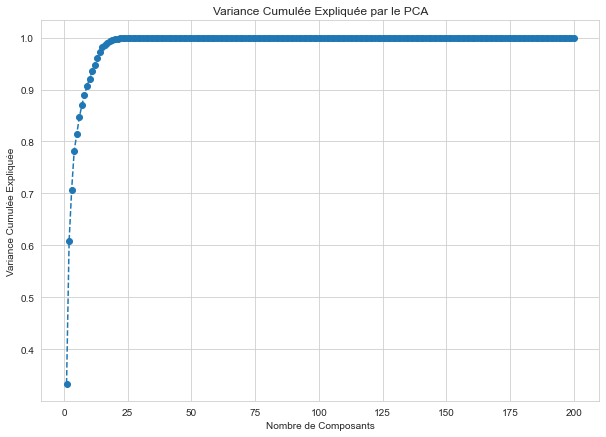

In [59]:
from sklearn.decomposition import PCA

# Effectuer le PCA sans réduction de composants initiale
pca = PCA()
pca.fit(dataf)

# Calculer la variance cumulée expliquée
variance_cumulee = pca.explained_variance_ratio_.cumsum()

# Tracer la variance cumulée
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(variance_cumulee) + 1), variance_cumulee, marker='o', linestyle='--')
plt.title("Variance Cumulée Expliquée par le PCA")
plt.xlabel("Nombre de Composants")
plt.ylabel("Variance Cumulée Expliquée")
plt.grid(True)
plt.show()

In [58]:
dataf

0         1         2         3         4         5    \
liquidity  0.358808 -0.169596 -0.411228 -0.024881 -0.570182 -0.596013   
token      0.173720 -0.403090 -0.754779  0.264612  0.410278  0.130930   
xexchange -0.246422  0.013444 -0.626282 -0.291693  0.224554  0.367097   
lp         0.207709 -0.309605  0.126815  0.609582 -0.200062  0.199608   
pool      -0.717353  0.261635  0.064990  1.117065  0.268185 -0.094858   
...             ...       ...       ...       ...       ...       ...   
building  -0.127159  0.012515 -0.008901 -0.161841 -0.028881 -0.116701   
grape     -0.144036  0.014824  0.066108 -0.131441 -0.021332 -0.074219   
ensure    -0.148007  0.020192  0.060385 -0.140275 -0.028313 -0.086831   
www       -0.146694  0.024942  0.067548 -0.149540 -0.019857 -0.089659   
take      -0.144876  0.010578 -0.007470 -0.177250 -0.028196 -0.122775   

                6         7         8         9         10        11   \
liquidity -0.348272 -0.027446  0.113272  0.270715 -0.408316 -0.063108   
token     -0.335595 -0.250824 -0.085263  0.571710 -0.560688  0.772410   
xexchange  0.128719  0.396920  0.076561  0.138428  0.023739  0.434737   
lp         0.367348  0.392261 -0.574056  0.332573 -0.211771 -0.334914   
pool       0.566542 -0.222475 -0.062721  0.649822 -0.266266  0.183888   
...             ...       ...       ...       ...       ...       ...   
building   0.070231 -0.045668 -0.168097  0.041153  0.095174 -0.049948   
grape      0.061924 -0.060853 -0.157525  0.037533  0.101477 -0.071717   
ensure     0.059546 -0.067099 -0.152514  0.062071  0.097053 -0.080512   
www        0.068856 -0.067296 -0.165129  0.057538  0.116930 -0.092558   
take       0.058367 -0.044469 -0.178488  0.059726  0.095122 -0.047668   

                12        13        14        15        16        17   \
liquidity -0.212159 -0.050088 -0.174974  0.063446 -0.296976 -0.015476   
token      0.426659 -0.188575  0.643206  0.129705 -0.169093 -0.162266   
xexchange -0.355363  0.219478 -0.615660 -0.384308 -0.023751  0.210003   
lp         0.668333  0.775291 -0.338972 -0.180102  0.247950  0.489921   
pool       0.253331 -0.334517  0.625201 -0.231439 -0.951974 -0.449930   
...             ...       ...       ...       ...       ...       ...   
building  -0.078645  0.013889 -0.041256 -0.006280  0.140668  0.071029   
grape     -0.085345  0.022517 -0.020447 -0.029585  0.101076  0.079501   
ensure    -0.084740  0.022608 -0.027885 -0.032970  0.104715  0.077543   
www       -0.095697  0.030071 -0.031065 -0.030691  0.124878  0.079101   
take      -0.084372  0.009565 -0.031562 -0.014880  0.145109  0.069119   

                18        19        20        21        22        23   \
liquidity -0.325163  0.217439 -0.165577 -0.436152 -0.522618  0.009553   
token     -0.149939  0.806970 -0.064816  0.141298 -0.694847 -0.645737   
xexchange  0.314497 -0.729429  0.168248 -0.413231  0.503016  0.539364   
lp        -0.001068 -0.696356 -0.027733 -0.193934  0.346171  0.467254   
pool      -0.389224  0.545426  0.488630  0.400010  0.486894 -0.314065   
...             ...       ...       ...       ...       ...       ...   
building  -0.190136 -0.393802 -0.132949 -0.033505  0.017039  0.040642   
grape     -0.199958 -0.329927 -0.130981  0.006716  0.055359  0.013027   
ensure    -0.212247 -0.336489 -0.142573 -0.011637  0.043806  0.002968   
www       -0.231227 -0.370677 -0.145432  0.001516  0.056198  0.010622   
take      -0.218026 -0.414330 -0.155143 -0.042982  0.005694  0.034273   

                24        25        26        27        28        29   \
liquidity  0.068157 -0.239303 -0.037899  0.383635  0.079233  0.361060   
token      0.812401 -0.394588  0.754372  0.264327  0.273066  0.479613   
xexchange  0.009699  0.031536 -0.144291  0.756090 -0.457147  0.388815   
lp         0.438839 -0.150863 -0.414093 -0.511800  0.317717  0.098410   
pool       0.221531 -0.115556 -0.137986 -0.591549 -0.170192 -0.518688   
...             ...       ...       ...       ...       ...       ... 

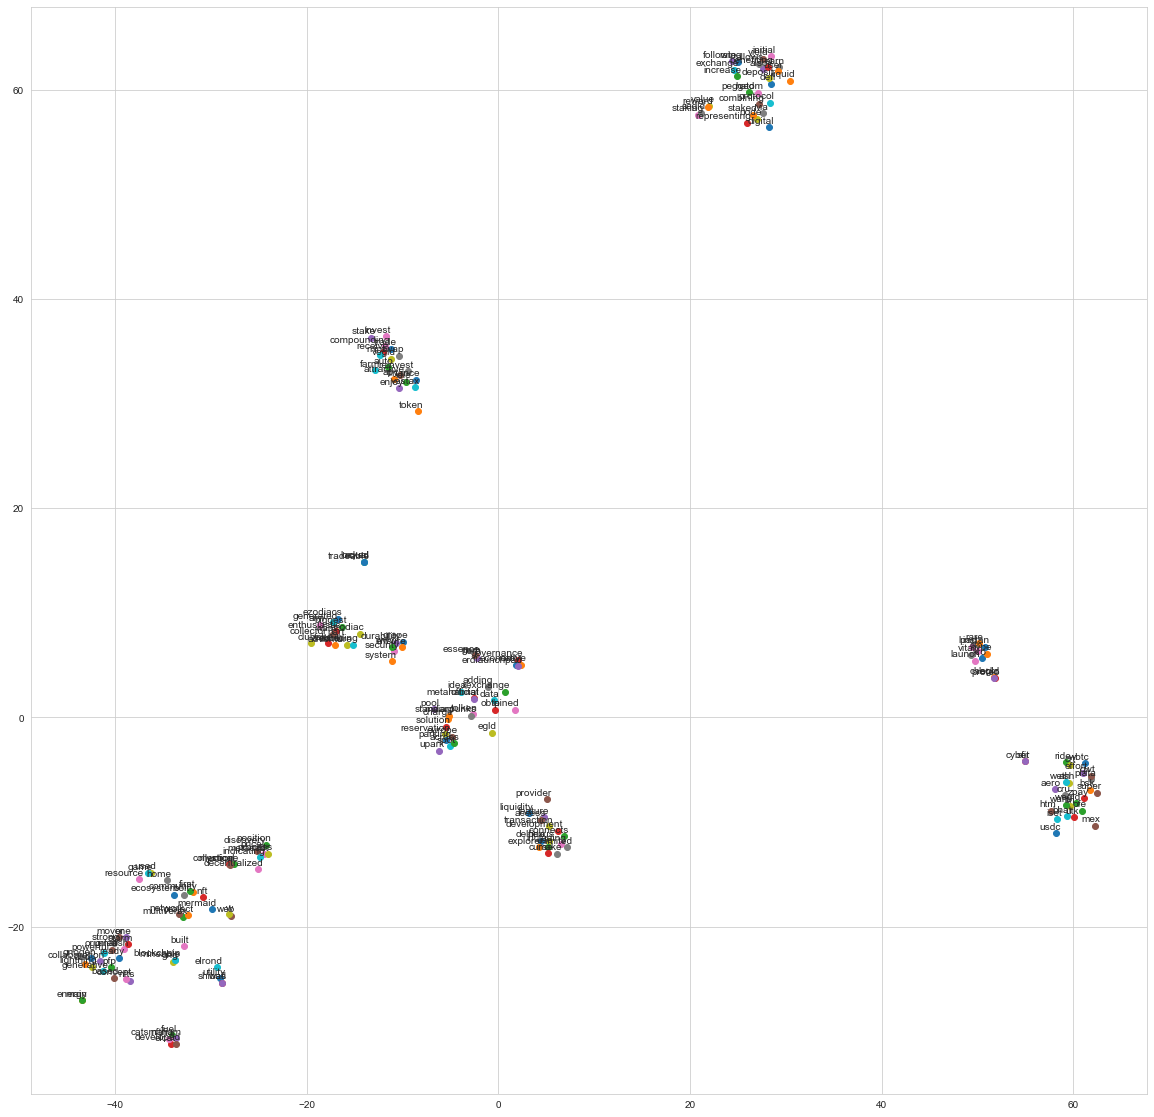

In [65]:
from sklearn.manifold import TSNE
def tsne_plot(trained):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in trained.key_to_index:
        tokens.append(trained[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=10, init='pca', n_iter=2500,random_state=40)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
tsne_plot(trained)

In [66]:
data_qualitative_cleaned_nonnull

_index _type  \
334     transactions-000001  _doc   
335     transactions-000001  _doc   
336     transactions-000001  _doc   
337     transactions-000001  _doc   
338     transactions-000001  _doc   
...                     ...   ...   
461912  transactions-000001  _doc   
462216  transactions-000001  _doc   
462314  transactions-000001  _doc   
462331  transactions-000001  _doc   
462639  transactions-000001  _doc   

                                                      _id  \
334     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
335     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
336     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
337     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
338     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
...                                                   ...   
461912  7adf3e0db8dc9dfe4c95ad1f24129f896c7a6e53acfec6...   
462216  215b86384c3ed5f4cfb7f2fbfedbeb860698269ce07183...   
462314  c99de1911583886b9ec000eac03de9dcc547598af35160...   
462331  1b6f00a1087bd3952d8d1b7e13c8344cc954b5bb61a79b...   
462639  4f24b28aa7bfa28aa74306f0cad995276d72e6fcf88c8b...   

                                    _source_miniBlockHash  \
334     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
335     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
336     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
337     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
338     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
...                                                   ...   
461912  c8e32473dce9a8622eb9df66ee56cde8c0e1bb63bd1272...   
462216  614a0eb1de957e8251986483480d060a0da846c75df3dc...   
462314  6f201dc794bf354ce8f698f60d26bc8ce2e8a02c590e42...   
462331  207387c54bfc3f92226dda4ca820ebbc3b07489f4662dc...   
462639  d2016d6feb879519aa120e2521d02e3504a6da0b949856...   

                                         _source_receiver  \
334     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
335     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
336     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
337     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
338     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
...                                                   ...   
461912  erd1ucs7m9pha5rnzdlu6ck36ywvq528lpmrzagc4u4q0x...   
462216  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462314  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462331  erd1qqqqqqqqqqqqqpgqjpt0qqgsrdhp2xqygpjtfrpwf7...   
462639  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   

                                           _source_sender  \
334     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
335     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
336     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
337     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
338     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
...                                                   ...   
461912  erd1ucs7m9pha5rnzdlu6ck36ywvq528lpmrzagc4u4q0x...   
462216  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462314  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462331  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42y7753heqs...   
462639  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   

                                             _source_data  \
334     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
335     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
336     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
337     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
338     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
...                                                   ...   
461912  RVNEVE5GVFRyYW5zZmVyQDVhNGY0NDQ5NDE0MzJkNjQzMD...   
462216  RVNEVE5GVFRyYW5zZmVyQDQxNDU1MjRkNDU1MzJkNjE2Mz...   
462314  RVNEVE5GVFRyYW5zZmVyQDQxNDU1MjRkNDU1MzJkNjE2Mz...   
462331  RVNEVFRyYW5zZmVyQDRkNDU1OD

In [68]:
corpus_Lem=[word_tokenize(doc) for doc in data_qualitative_cleaned_nonnull['lemmatized']]

In [70]:
import gensim
import gensim.downloader as api
from gensim.models import keyedvectors
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import CoherenceModel
from gensim import models
dictionary = gensim.corpora.Dictionary(corpus_Lem)   #Utiliser les corpus lemmatiser 
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=1000)   #Filtrer les mots qui apparaissent moins de 15 fois ou sont présents dans plus de 10% des documents.
bow_corpus = [dictionary.doc2bow(doc) for doc in corpus_Lem]

In [71]:
tfidf=models.TfidfModel(bow_corpus)
corpus_tfidf=tfidf[bow_corpus]
lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics = 3, id2word = dictionary, passes = 10) 
topics = []
for idx, topic in lda_model.print_topics(-1) :
    print("Topic: {} -> Words: {}".format(idx, topic))
    topics.append(topic)

Topic: 0 -> Words: 0.134*"proteo" + 0.067*"lpad" + 0.067*"kro" + 0.067*"wbtc" + 0.067*"super" + 0.067*"ash" + 0.067*"bhat" + 0.067*"ctp" + 0.067*"cru" + 0.067*"aero"
Topic: 1 -> Words: 0.149*"legld" + 0.076*"mex" + 0.075*"wam" + 0.075*"utk" + 0.075*"plata" + 0.075*"launch" + 0.075*"htm" + 0.075*"instan" + 0.075*"iset" + 0.075*"ith"
Topic: 2 -> Words: 0.150*"checkr" + 0.075*"vital" + 0.075*"rare" + 0.075*"ofe" + 0.075*"qwt" + 0.075*"zpay" + 0.075*"weth" + 0.075*"hype" + 0.075*"ride" + 0.075*"crt"


In [72]:
all_topic_model = []
for i in range(len(topics)):
  str = topics[i].split(' + ')
  topic_model = []
  for j in range(10):
    weight = str[j][0:5]
    word = str[j][7:len(str[j])-1]
    topic_model.append((weight, word))
  all_topic_model.append(topic_model)

In [73]:
df_topic_model = pd.DataFrame(all_topic_model)
df_topic_model

0               1              2              3  \
0  (0.134, proteo)   (0.067, lpad)   (0.067, kro)  (0.067, wbtc)   
1   (0.149, legld)    (0.076, mex)   (0.075, wam)   (0.075, utk)   
2  (0.150, checkr)  (0.075, vital)  (0.075, rare)   (0.075, ofe)   

                4                5              6                7  \
0  (0.067, super)     (0.067, ash)  (0.067, bhat)     (0.067, ctp)   
1  (0.075, plata)  (0.075, launch)   (0.075, htm)  (0.075, instan)   
2    (0.075, qwt)    (0.075, zpay)  (0.075, weth)    (0.075, hype)   

               8              9  
0   (0.067, cru)  (0.067, aero)  
1  (0.075, iset)   (0.075, ith)  
2  (0.075, ride)   (0.075, crt)

In [74]:
doc_topics=lda_model.get_document_topics(corpus_tfidf)
print(doc_topics)

In [75]:
from gensim.matutils import corpus2csc
mat_sparse = corpus2csc(doc_topics)
print(mat_sparse)

  (0, 0)	0.6666641235351562
  (1, 0)	0.1666678786277771
  (2, 0)	0.16666793823242188
  (0, 1)	0.6666641235351562
  (1, 1)	0.16666793823242188
  (2, 1)	0.16666795313358307
  (0, 2)	0.6666641235351562
  (1, 2)	0.1666679084300995
  (2, 2)	0.16666793823242188
  (0, 3)	0.166667640209198
  (1, 3)	0.6666645407676697
  (2, 3)	0.16666781902313232
  (0, 4)	0.166667178273201
  (1, 4)	0.16666723787784576
  (2, 4)	0.6666655540466309
  (0, 5)	0.16666719317436218
  (1, 5)	0.16666725277900696
  (2, 5)	0.6666655540466309
  (0, 6)	0.3333333432674408
  (1, 6)	0.3333333432674408
  (2, 6)	0.3333333432674408
  (0, 7)	0.1666676551103592
  (1, 7)	0.16666769981384277
  (2, 7)	0.6666646003723145
  (0, 8)	0.6666642427444458
  :	:
  (2, 76116)	0.6666645407676697
  (0, 76117)	0.3333333432674408
  (1, 76117)	0.3333333432674408
  (2, 76117)	0.3333333432674408
  (0, 76118)	0.3333333432674408
  (1, 76118)	0.3333333432674408
  (2, 76118)	0.3333333432674408
  (0, 76119)	0.09667564928531647
  (1, 76119)	0.806645154953002

In [77]:
mat_dt = mat_sparse.T.toarray()
print(mat_dt)

[[0.66666412 0.16666788 0.16666794]
 [0.66666412 0.16666794 0.16666795]
 [0.66666412 0.16666791 0.16666794]
 ...
 [0.0966526  0.80669326 0.09665411]
 [0.6413424  0.25544682 0.10321076]
 [0.09665261 0.80669326 0.09665412]]


In [78]:
all_topics_df = pd.DataFrame(mat_dt)
Data = data_qualitative_cleaned_nonnull.join(all_topics_df)

In [81]:
all_topics_df.rename(columns = {0:'groupe 1', 1:'groupe 2',2:'groupe 3'}, inplace = True)

In [83]:
cols_to_keep = all_topics_df.idxmax(axis=1)
max_cols_df = cols_to_keep.apply(lambda x: pd.Series([x]))
Data = data_qualitative_cleaned_nonnull.join(max_cols_df)
Data.rename(columns = {0:'Category'}, inplace = True)
Data['Category']=Data['Category'].shift(1)
Data=Data.drop(data_qualitative_cleaned_nonnull.index[[0]])

In [84]:
Data.head(20)

_index _type  \
335  transactions-000001  _doc   
336  transactions-000001  _doc   
337  transactions-000001  _doc   
338  transactions-000001  _doc   
339  transactions-000001  _doc   
340  transactions-000001  _doc   
341  transactions-000001  _doc   
342  transactions-000001  _doc   
343  transactions-000001  _doc   
344  transactions-000001  _doc   
345  transactions-000001  _doc   
346  transactions-000001  _doc   
347  transactions-000001  _doc   
348  transactions-000001  _doc   
349  transactions-000001  _doc   
350  transactions-000001  _doc   
351  transactions-000001  _doc   
352  transactions-000001  _doc   
353  transactions-000001  _doc   
354  transactions-000001  _doc   

                                                   _id  \
335  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
336  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
337  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
338  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
339  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
340  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
341  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
342  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
343  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
344  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
345  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
346  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
347  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
348  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
349  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
350  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
351  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
352  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
353  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
354  94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   

                                 _source_miniBlockHash  \
335  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
336  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
337  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
338  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
339  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
340  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
341  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
342  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
343  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
344  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
345  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
346  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
347  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
348  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
349  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
350  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
351  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
352  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
353  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
354  98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   

                                      _source_receiver  \
335  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
336  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
337  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
338  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
339  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
340  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
341  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
342  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
343  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
344  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
345  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
346  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
347  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
348  erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h..

<function matplotlib.pyplot.show(close=None, block=None)>

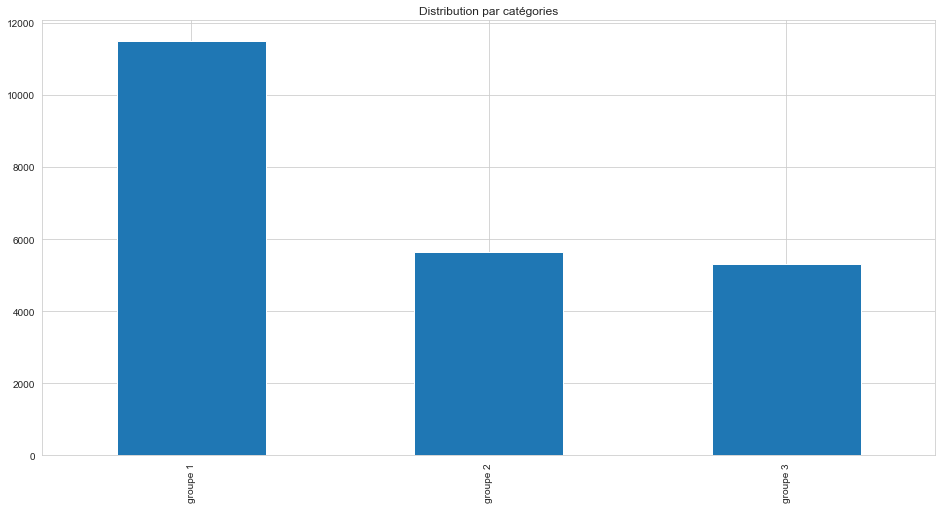

In [85]:
plt.figure()
Data['Category'].value_counts().plot(kind='bar',figsize=(16,8),title='Distribution par catégories')
plt.show

In [89]:
Data

_index _type  \
335     transactions-000001  _doc   
336     transactions-000001  _doc   
337     transactions-000001  _doc   
338     transactions-000001  _doc   
339     transactions-000001  _doc   
...                     ...   ...   
461912  transactions-000001  _doc   
462216  transactions-000001  _doc   
462314  transactions-000001  _doc   
462331  transactions-000001  _doc   
462639  transactions-000001  _doc   

                                                      _id  \
335     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
336     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
337     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
338     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
339     94b44f3c66ff07c9563b1bfe24fc287f3f320b62e03602...   
...                                                   ...   
461912  7adf3e0db8dc9dfe4c95ad1f24129f896c7a6e53acfec6...   
462216  215b86384c3ed5f4cfb7f2fbfedbeb860698269ce07183...   
462314  c99de1911583886b9ec000eac03de9dcc547598af35160...   
462331  1b6f00a1087bd3952d8d1b7e13c8344cc954b5bb61a79b...   
462639  4f24b28aa7bfa28aa74306f0cad995276d72e6fcf88c8b...   

                                    _source_miniBlockHash  \
335     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
336     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
337     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
338     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
339     98ab6ac8faa10fcf6b4304392d085057247fdcfd6becbf...   
...                                                   ...   
461912  c8e32473dce9a8622eb9df66ee56cde8c0e1bb63bd1272...   
462216  614a0eb1de957e8251986483480d060a0da846c75df3dc...   
462314  6f201dc794bf354ce8f698f60d26bc8ce2e8a02c590e42...   
462331  207387c54bfc3f92226dda4ca820ebbc3b07489f4662dc...   
462639  d2016d6feb879519aa120e2521d02e3504a6da0b949856...   

                                         _source_receiver  \
335     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
336     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
337     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
338     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
339     erd1qqqqqqqqqqqqqpgqq66xk9gfr4esuhem3jru86wg5h...   
...                                                   ...   
461912  erd1ucs7m9pha5rnzdlu6ck36ywvq528lpmrzagc4u4q0x...   
462216  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462314  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462331  erd1qqqqqqqqqqqqqpgqjpt0qqgsrdhp2xqygpjtfrpwf7...   
462639  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   

                                           _source_sender  \
335     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
336     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
337     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
338     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
339     erd1ux5kl9n3u09w3dwrqs8dalp07eeleh8zzwfcre0kz2...   
...                                                   ...   
461912  erd1ucs7m9pha5rnzdlu6ck36ywvq528lpmrzagc4u4q0x...   
462216  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462314  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   
462331  erd15wxfajqn4v3c36ct8t9wzmmxegml6wx42y7753heqs...   
462639  erd1p2mxpagnurymqqfsrykw2rh7qux0rq4n3zh95nafrf...   

                                             _source_data  \
335     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
336     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
337     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
338     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
339     RVNEVFRyYW5zZmVyQDU1NTM0NDQzMmQ2MzM3MzY2NjMxNj...   
...                                                   ...   
461912  RVNEVE5GVFRyYW5zZmVyQDVhNGY0NDQ5NDE0MzJkNjQzMD...   
462216  RVNEVE5GVFRyYW5zZmVyQDQxNDU1MjRkNDU1MzJkNjE2Mz...   
462314  RVNEVE5GVFRyYW5zZmVyQDQxNDU1MjRkNDU1MzJkNjE2Mz...   
462331  RVNEVFRyYW5zZmVyQDRkNDU1OD

/var/folders/43/p13r_kws67708f3v4c0fzfp80000gn/T/ipykernel_59304/2718946579.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UE['website']=[','.join(i) if isinstance(i,list) else i for i in df_UE['website']]


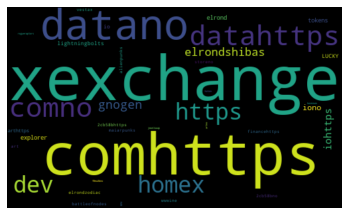

In [99]:
from wordcloud import WordCloud 
Data_clean = Data.dropna(subset=['Category'])
df_UE=Data_clean[Data_clean['Category'].str.contains('groupe 1')]
df_UE['website']=[','.join(i) if isinstance(i,list) else i for i in df_UE['website']]
allWords=''.join([twts for twts in df_UE['website']])
wordCloud = WordCloud(width=500, height=300, max_font_size = 199,collocations=False).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

/var/folders/43/p13r_kws67708f3v4c0fzfp80000gn/T/ipykernel_59304/3850849285.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UE['_source_functions']=[','.join(i) if isinstance(i,list) else i for i in df_UE['_source_function']]


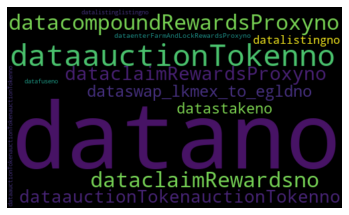

In [92]:
from wordcloud import WordCloud 
Data_clean = Data.dropna(subset=['Category'])
df_UE=Data_clean[Data_clean['Category'].str.contains('groupe 2')]
df_UE['_source_functions']=[','.join(i) if isinstance(i,list) else i for i in df_UE['_source_function']]
allWords=''.join([twts for twts in df_UE['_source_function']])
wordCloud = WordCloud(width=500, height=300, max_font_size = 199,collocations=False).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

/var/folders/43/p13r_kws67708f3v4c0fzfp80000gn/T/ipykernel_59304/1434747168.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UE['_source_functions']=[','.join(i) if isinstance(i,list) else i for i in df_UE['_source_function']]


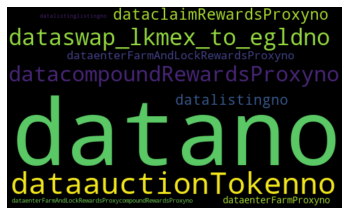

In [93]:
from wordcloud import WordCloud 
Data_clean = Data.dropna(subset=['Category'])
df_UE=Data_clean[Data_clean['Category'].str.contains('groupe 3')]
df_UE['_source_functions']=[','.join(i) if isinstance(i,list) else i for i in df_UE['_source_function']]
allWords=''.join([twts for twts in df_UE['_source_function']])
wordCloud = WordCloud(width=500, height=300, max_font_size = 199,collocations=False).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [108]:
pourcentage = 0.1
df_reduit_only = data_one_hot_new.sample(frac=pourcentage, random_state=42)
nom_fichier_csv3 = 'csv_TKYC_quali_DL.csv'

# Utilisez la méthode to_csv() pour sauvegarder le DataFrame au format CSV
df_reduit_only.to_csv(nom_fichier_csv3, index=False)

In [109]:
pourcentage = 0.1
df_reduit_only = data_transactions_nonnull_normalized.sample(frac=pourcentage, random_state=42)
nom_fichier_csv3 = 'csv_TKYC_quanti_DL.csv'

# Utilisez la méthode to_csv() pour sauvegarder le DataFrame au format CSV
df_reduit_only.to_csv(nom_fichier_csv3, index=False)

# DL

## Quanti

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split


# 1. Data Normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
x_train, x_test = train_test_split(data_transactions_nonnull_normalized, test_size=0.2, random_state=42)

# 2. Create the Autoencoder

# Define the encoder dimensions
input_dim = x_train.shape[1]  # Number of input features
encoding_dim = int(input_dim / 2)  # Reduce to half the original dimensions

# Create a Sequential model
autoencoder = Sequential()

# Encoder layers
autoencoder.add(Dense(4 * encoding_dim, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu'))

# Decoder layers
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=1
)

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training History')
plt.show()


In [ ]:
# Define the encoder model 
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)
# Get the latent representation of the data
latent_representation = encoder.predict(scaled_data)


In [ ]:
from sklearn.cluster import KMeans

# Decide the number of clusters (k) and create a KMeans instance
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the latent representations
kmeans.fit(latent_representation)

# Get the cluster assignments for each data point
clusters = kmeans.predict(latent_representation)


In [ ]:
from sklearn.manifold import TSNE

# Create a 2D embedding of the latent representation
tsne = TSNE(n_components=2, random_state=0)
tsne_representation = tsne.fit_transform(latent_representation)

# Plot the 2D embedding colored by cluster assignment
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=clusters, cmap='viridis')
plt.colorbar(label='Cluster')
plt.title('t-SNE of Latent Representations Colored by Cluster Assignment')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


## Quali

In [ ]:
# Split the data into training and testing sets
x_train, x_test = train_test_split(data_one_hot_new, test_size=0.2, random_state=42)

# Define the encoder dimensions
input_dim = x_train.shape[1]
encoding_dim = int(input_dim / 2)

# Create the Autoencoder model
autoencoder = Sequential()

# Encoder layers
autoencoder.add(Dense(4 * encoding_dim, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu'))

# Decoder layers
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


In [ ]:
autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Dense(2000, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(1000, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(50, activation='relu'))

# Latent View
autoencoder.add(Dense(25, activation='relu'))

# Decoder Layers
autoencoder.add(Dense(50, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(1000, activation='relu'))
autoencoder.add(Dense(2000, activation='relu'))

# Decoded Output
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
# Define the encoder model 
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)

# Get the latent representation of the data
latent_representation = encoder.predict(data_one_hot_new)


In [ ]:
from sklearn.cluster import KMeans

# Decide the number of clusters (k) and create a KMeans instance
k = 3  # Or another value depending on your specific use case
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the latent representations
kmeans.fit(latent_representation)

# Get the cluster assignments for each data point
clusters = kmeans.predict(latent_representation)
